In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import seaborn as sns
import matplotlib as mpl
import inspect
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, skew, kurtosis, ks_2samp, mannwhitneyu
import statsmodels.stats.weightstats as smws

%matplotlib inline

import os
import pandas as pd
import openpyxl as excel
import glob

plt.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

print(sns.__version__)

0.13.0.dev0


In [2]:
dir_ = "/home/reinhold/Daten/Paper_Datasets_Nov2022"
filenames = [r'OpenAPS complete_patient_statistics.xlsx',
    r'OPENonOH complete_patient_statistics.xlsx'] # Specify the file path

df = {}
df["OpenAPS"] = pd.read_excel(os.path.join(dir_, filenames[0]))  # all columns
df["OpenAPS"]["TOR"] = df["OpenAPS"]["TOR<70"].astype("float64") + df["OpenAPS"]["TOR>180"].astype("float64")
df["OPENonOH"] = pd.read_excel(os.path.join(dir_, filenames[1]))
print(len(df["OPENonOH"].columns), df["OPENonOH"].columns)
df["OPENonOH"]["TOR"] = df["OPENonOH"]["TOR<70"].astype("float64") + df["OPENonOH"]["TOR>180"].astype("float64")
print(sns.__version__)

29 Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'gender_int',    'is_child',  'interdaysd',  'interdaycv',
       'bg_roc_stds',      'TOR<70',         'TIR',     'TOR>180',
               'POR',     'J_index',        'LGBI',        'HBGI',
               'GMI',       'count',        'mean',         'std',
               'min',          0.25,           0.5,          0.75,
               'max'],
      dtype='object')
0.13.0.dev0


In [3]:
#print([p for p in plt.rcParams.keys() if "font" in p])
df1 = df["OPENonOH"]
df2 = df["OpenAPS"]
print("mean", "std", "median", "min", "max")
print(df1["TIR"].mean(), df1["TIR"].std(), df1["TIR"].median(), df1["TIR"].min(), df1["TIR"].max())
print(df1["TOR<70"].mean(), df1["TOR<70"].std(), df1["TOR<70"].median(), df1["TOR<70"].min(), df1["TOR<70"].max())
print(df1["TOR>180"].mean(), df1["TOR>180"].std(), df1["TOR>180"].median(), df1["TOR>180"].min(), df1["TOR>180"].max())
df1_drop = df1.dropna()
print(df1_drop["TIR"].mean(), df1_drop["TIR"].std(), df1_drop["TIR"].median(), df1_drop["TIR"].min(), df1_drop["TIR"].max())


mean std median min max
82.0768 10.41773593704765 85.93 42.07 96.9
3.658399999999999 2.517143404520076 2.96 0.05 14.67
14.265199999999998 11.104189051276391 10.27 0.83 57.88
82.14399999999999 10.738803997855062 86.09 42.07 96.9


# Statistical and Variability Metrics for Glucose Analysis from CGM Data

count - total CGM data points

mean - average of CGM data

std	- standard deviation of CGM data

min	- minimum CGM data value

25%	- Q1

50%	- Q2

75%	- Q3 

max - maximum CGM data value

interdaysd - computes interday standard deviation

interdaycv - computes interday coefficient of variation

TORless70 - computes time outside range --> (hypoglycemia | BG < 70 mg/dL) in percentage

TIR - computes time inside range --> (target range | 70 mg/dl < BG < 180 mg/dL) in percentage

TORmore180 - computes time outside range --> (hyperglycemia | BG > 180 mg/dL) in percentage

TOR - computes percent of time outside range (range in standard deviations from mean, default = 1). sr is the sampling rate inverse in minutes of the CGM 

J_index - computes the glycemic variability metric, J-index

LBGI - computes glycemic variability metric low blood glucose index

HBGI - computes glycemic variability metric high blood glucose index

GMI - computes glycemic management indicator

In [4]:
df1, df2 = df["OPENonOH"], df["OpenAPS"]
var = "interdaysd"
#print(plt.rcParams.keys())

df1.loc[df1['gender'] == 'Transgender Male',
                        'gender'] = 'Male'
df2.loc[df2['gender'] == 'Transgender Male',
                        'gender'] = 'Male'
df1["project"] = "OPEN"
df2["project"] = "OpenAPS\nData\nCommons"
print(df1.index, df2.index)
df1.reindex(["id"], axis=0)
print(df1.index, df2.index)

df3 = pd.concat([df1, df2], axis=0)
print(df3.loc[df3[["project", "id"]].duplicated(keep=False)])
#df3.reindex(["project", "id"], axis=0)

#h, bin_edges = np.histogram(df1.loc[df1['gender']=='Male',var])
#kernel = gaussian_kde(df1.loc[df1['gender']=='Male',var])
#x = np.linspace(bin_edges[0], bin_edges[-1], 100)
#sns.lineplot(x=x, y=kernel(x)*75*(bin_edges[1]-bin_edges[0]))

#sns.histplot(data=df2,
#            x=var, 
#            hue='gender',
#           palette=["#0672B0", "brown"],
#            linewidth=1, 
#            legend=None)
#plt.hist(df["OpenAPS"][var])


RangeIndex(start=0, stop=75, step=1) RangeIndex(start=0, stop=122, step=1)
RangeIndex(start=0, stop=75, step=1) RangeIndex(start=0, stop=122, step=1)
Empty DataFrame
Columns: [id, age, gender, height, weight, country, year, month, gender_int, is_child, interdaysd, interdaycv, bg_roc_stds, TOR<70, TIR, TOR>180, POR, J_index, LGBI, HBGI, GMI, count, mean, std, min, 0.25, 0.5, 0.75, max, TOR, project, Unnamed: 0, mean+std, mean-std, dailyInsulinUnits, dailyBasalInsulinUnits, DIYTech]
Index: []

[0 rows x 37 columns]


In [5]:
#print([p for p in plt.rcParams.keys() if "font" in p])
print("mean", "std", "median", "min", "max")
print(df1["TIR"].mean(), df1["TIR"].std(), df1["TIR"].median(), df1["TIR"].min(), df1["TIR"].max())
print(df1["TOR<70"].mean(), df1["TOR<70"].std(), df1["TOR<70"].median(), df1["TOR<70"].min(), df1["TOR<70"].max())
print(df1["TOR>180"].mean(), df1["TOR>180"].std(), df1["TOR>180"].median(), df1["TOR>180"].min(), df1["TOR>180"].max())
df1_drop = df1.dropna()
print(df1_drop["TIR"].mean(), df1_drop["TIR"].std(), df1_drop["TIR"].median(), df1_drop["TIR"].min(), df1_drop["TIR"].max())

print(df3.loc[df3["project"]=="OPEN"]["TIR"].mean())
print(df3.loc[(df3["project"]=="OPEN") & (df3["gender"]=="Female")]["TIR"].count())
print(df3.loc[(df3["project"]=="OPEN") & (df3["gender"]=="Male")]["TIR"].count())

mean std median min max
82.0768 10.41773593704765 85.93 42.07 96.9
3.658399999999999 2.517143404520076 2.96 0.05 14.67
14.265199999999998 11.104189051276391 10.27 0.83 57.88
82.14399999999999 10.738803997855062 86.09 42.07 96.9
82.0768
27
47


# Visualising demographics and calculated metrics
Figure 5 in the gv paper (https://www.mdpi.com/2072-6643/14/9/1906)

In [6]:

def plot_kde_two_distributions(df1, df2, var, xlabel):
    sns.set_theme(context="notebook", style="white")
    #sns.set_theme(rc={'palette': ["#0672B0", "brown"], 'alpha' : 0.5, 'linewidth' : 0.1, 'kde' : True, 'rug':True})

    df1[var] = df1[var].astype(float)
    df2[var] = df2[var].astype(float)

    plt.rcParams.update({'font.size': 24})
    nbins = 8  # number of bins
    fg= sns.displot(df1,
                x=df1[var],
                hue=df1['gender'],
                palette=["brown", "#0672B0"],
                alpha=0.5,
                linewidth=0.1,
                bins=nbins,
                kde=True, 
                rug=True)
    plt.xlabel(xlabel)

    print(len(fg.fig.axes))
    ax = fg.fig.axes[0]
    print(len(ax.get_lines()))
    ax.get_lines().remove(ax.get_lines()[1])
    min_,max_ = ax.get_xlim()
    bin_width = (max_-min_)/nbins
    #print(df2['gender'].unique())
    h,kernel,norm_ = {}, {}, {}
    kernel["Male"] = gaussian_kde(df2.loc[df2['gender']=='Male',var])
    x_ = np.linspace(min_, max_, 100)
    print(df2.loc[df2['gender']=='Female', 'gender'].count())
    norm_["Female"] = df2.loc[df2['gender']=='Female', 'gender'].count()*bin_width  
    norm_["Male"] = df2.loc[df2['gender']=='Male', 'gender'].count()*bin_width  

    kernel["Female"] = gaussian_kde(df2.loc[df2['gender']=='Female',var])
    sns.lineplot(x=x_, y=kernel["Female"](x_)*norm_["Female"], ax=ax, color="brown", linestyle='--', label="F (OpenAPS)")
    sns.lineplot(x=x_, y=kernel["Male"](x_)*norm_["Male"], ax=ax, color="#0672B0", linestyle='--', label="M (OpenAPS)")

    fg.fig.savefig("kde_"+var+".png", bbox_inches='tight')
    #h["Male"], bin_edges["Male"] = np.histogram(df1.loc[df1['gender']=='Male',var])
    #kernel["Male"] = gaussian_kde(df1.loc[df1['gender']=='Male',var])
    #x["Male"] = np.linspace(bin_edges["Male"][0], bin_edges["Male"][-1], 100)
    #norm_ = 75*(bin_edges["Male"][1]-bin_edges["Male"][0])
    #sns.lineplot(x=x["Male"], y=kernel["Male"](x["Male"])*norm_, ax=ax, color="brown")


In [7]:
def plot_kde2(df, var, xlabel, subfig_index, move_legend=False):
    """
    subfig_index is for the paper: a, b, ..., i
    """
    sns.set_theme(context="notebook", style="white")
    #sns.set_theme(rc={'alpha' : 0.5, 'linewidth' : 0.1, 'kde' : True, 'rug':True})
    
    df[var] = df[var].astype(float)

    plt.rcParams.update({'font.size': 30, 'legend.fontsize': 16, 'legend.title_fontsize': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})
    #plt.rcParams.update({'font.size': 30, 'legend.fontsize': 18, 'legend.title_fontsize': 20, 'legend.title_fontcolor': 'white'})
    nbins = 8  # number of bins
    fg = sns.displot(df,
                x=df[var],
                hue=df['project'],
                palette=["brown", "#0672B0"],
                alpha=0.5,
                linewidth=0.1,
                bins=nbins,
                kde=True, 
                rug=True)
    plt.xlabel(xlabel)
    plt.tight_layout()
    if move_legend: 
        sns.move_legend(fg, title="", loc='upper left', bbox_to_anchor=(0.15, 0.92), ncol=1)
    else:
        fg.legend.set_title(title="")
    # plt.savefig("kde_"+var+"_2.png")
    plt.savefig(f"Figure-11{subfig_index}.png")

    # calculate stats:
    x = df.loc[df['project']=='OpenAPS\nData\nCommons', var].tolist()
    IQR_x = np.percentile(x, 75) - np.percentile(x, 25)
    y = df.loc[df['project']=='OPEN', var].tolist()
    IQR_y = np.percentile(x, 75) - np.percentile(x, 25)
    
    z_statistic, p_value = smws.ztest(x, y)
    ks_statistic, p_value_ks = ks_2samp(x, y)
    mw_statistic, p_value_mw = mannwhitneyu(x, y)

    out = [np.mean(x), np.std(x), np.min(x), np.max(x), np.median(x), np.percentile(x, 25), np.percentile(x, 75), IQR_x, len(x), skew(x), kurtosis(x)]
    out.extend([np.mean(y), np.std(y), np.min(y), np.max(y), np.median(y), np.percentile(y, 25), np.percentile(y, 75), IQR_y, len(y), skew(y), kurtosis(y)])
    out.extend([z_statistic, p_value, ks_statistic, p_value_ks, mw_statistic, p_value_mw])
    return out

Index([                    'id',                    'age',
                       'gender',                 'height',
                       'weight',                'country',
                         'year',                  'month',
                   'gender_int',               'is_child',
                   'interdaysd',             'interdaycv',
                  'bg_roc_stds',                 'TOR<70',
                          'TIR',                'TOR>180',
                          'POR',                'J_index',
                         'LGBI',                   'HBGI',
                          'GMI',                  'count',
                         'mean',                    'std',
                          'min',                     0.25,
                            0.5,                     0.75,
                          'max',                    'TOR',
                      'project',             'Unnamed: 0',
                     'mean+std',               'mean-std

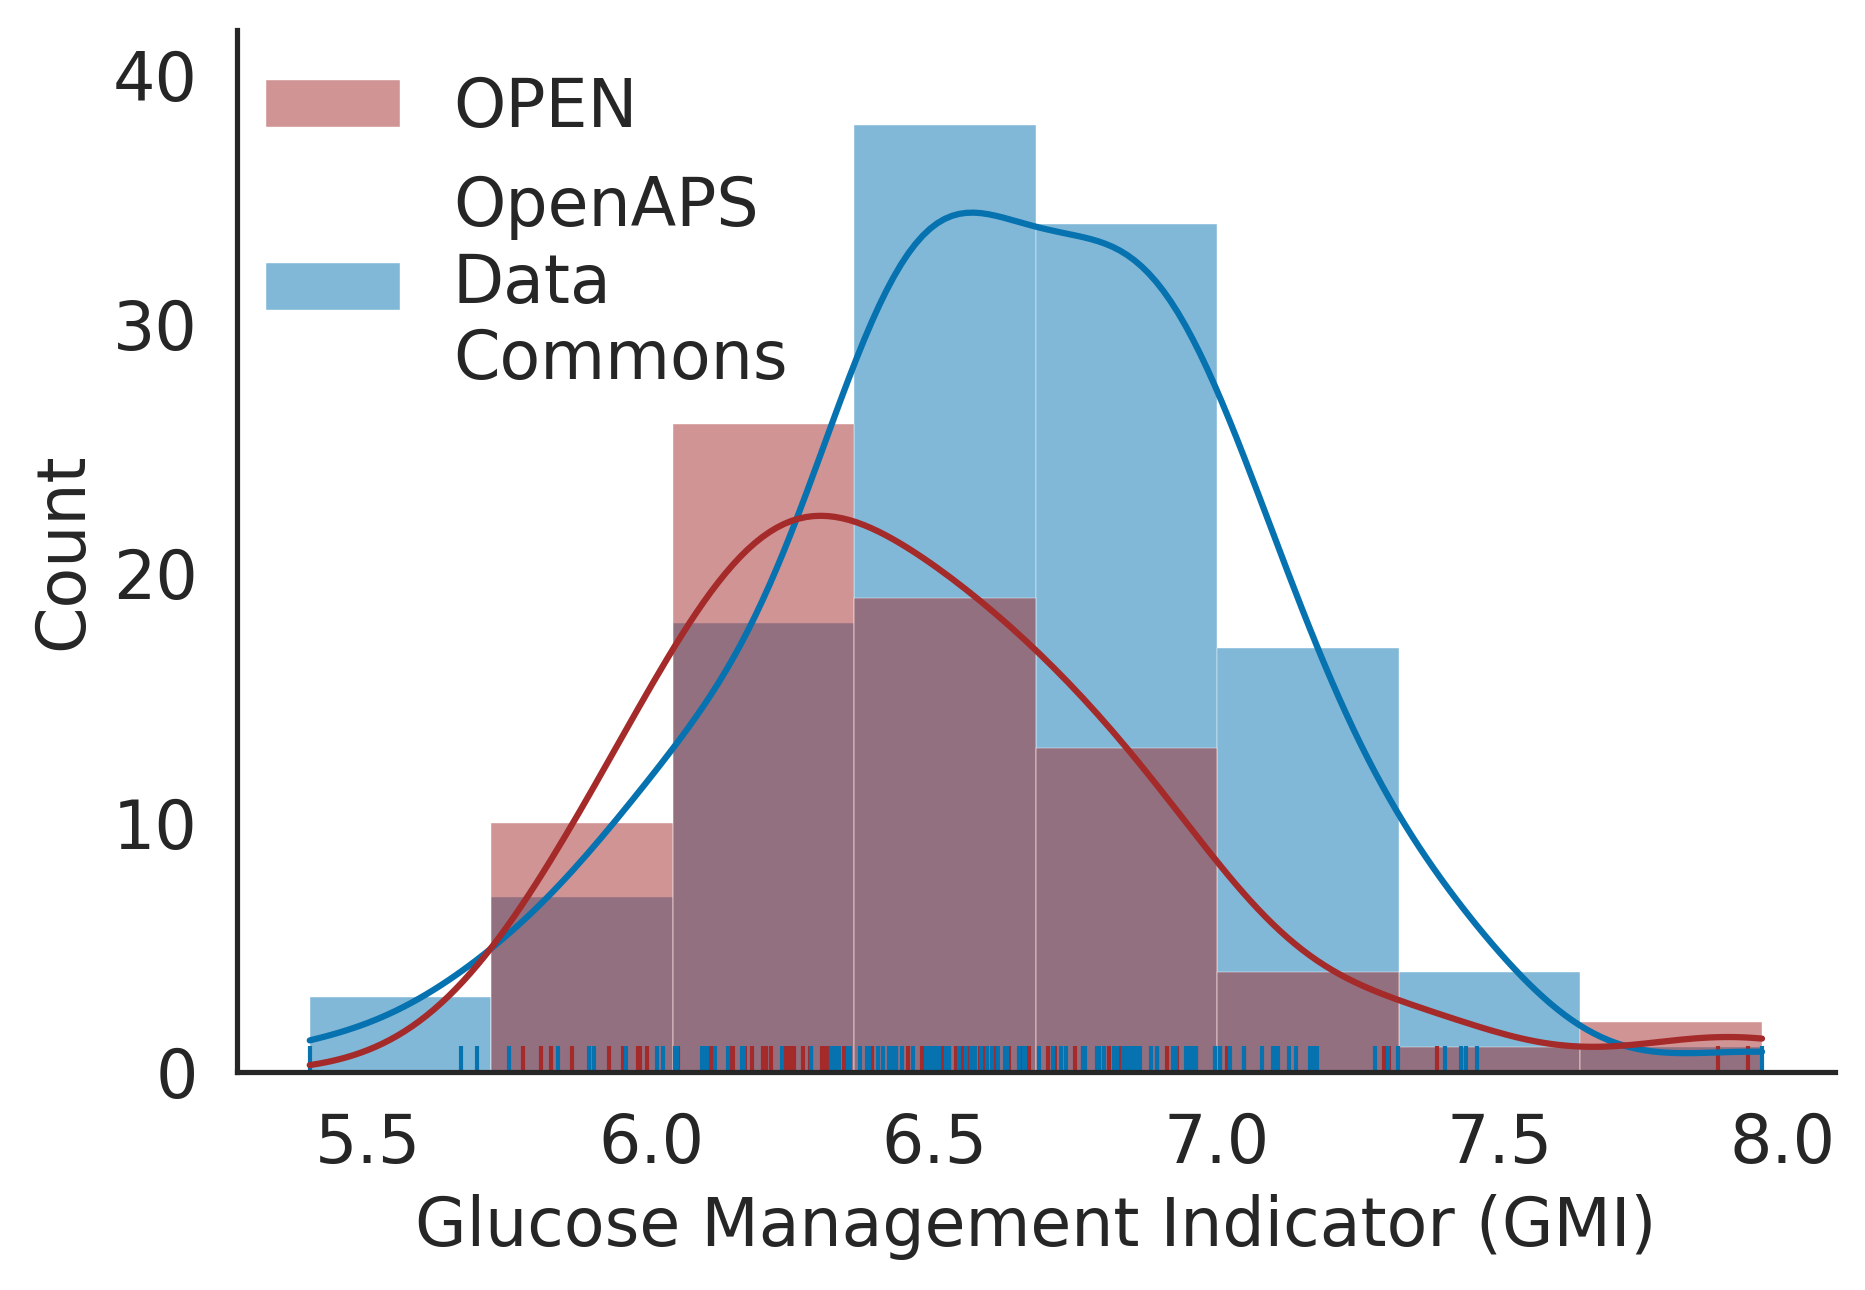

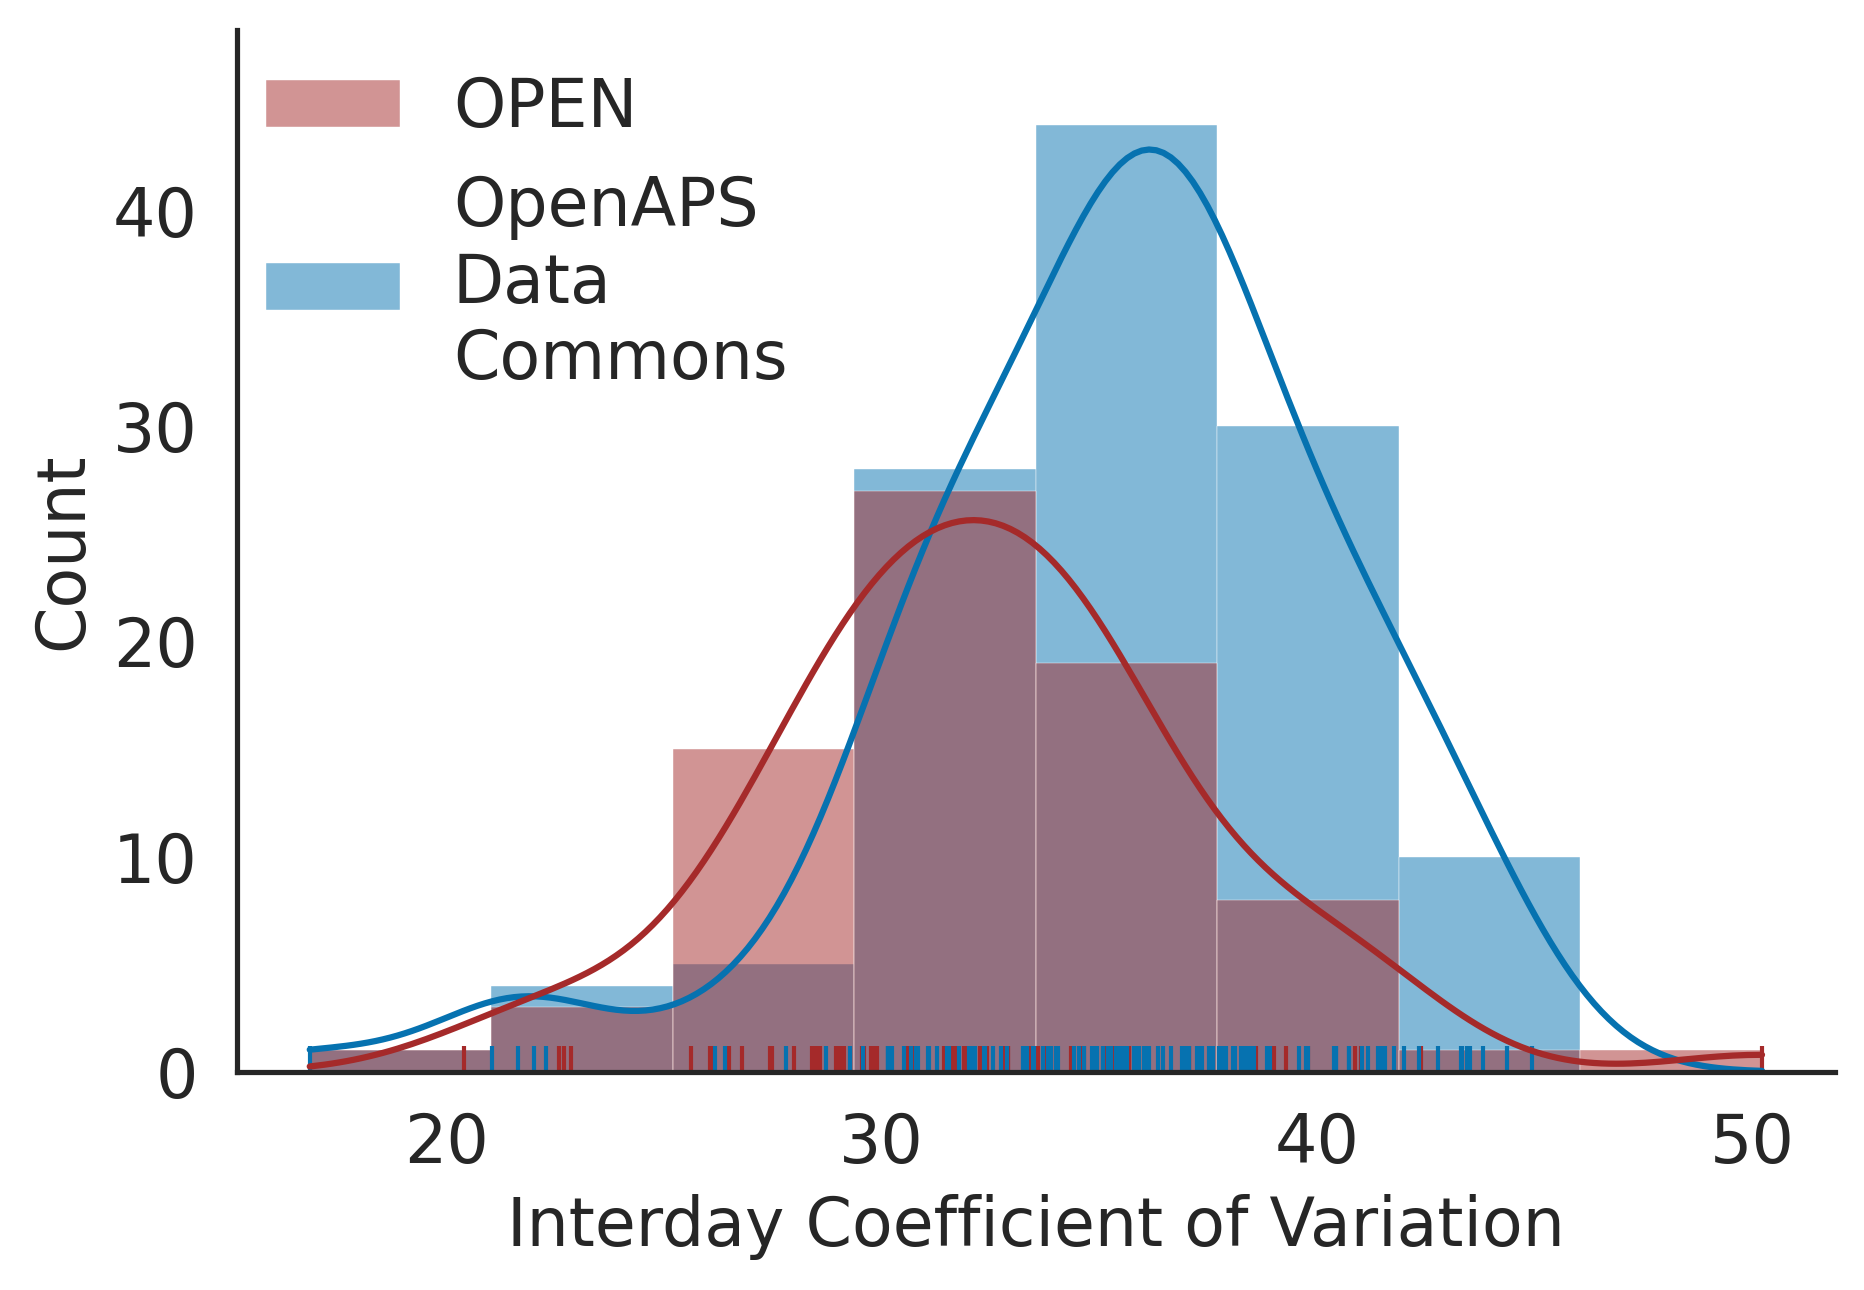

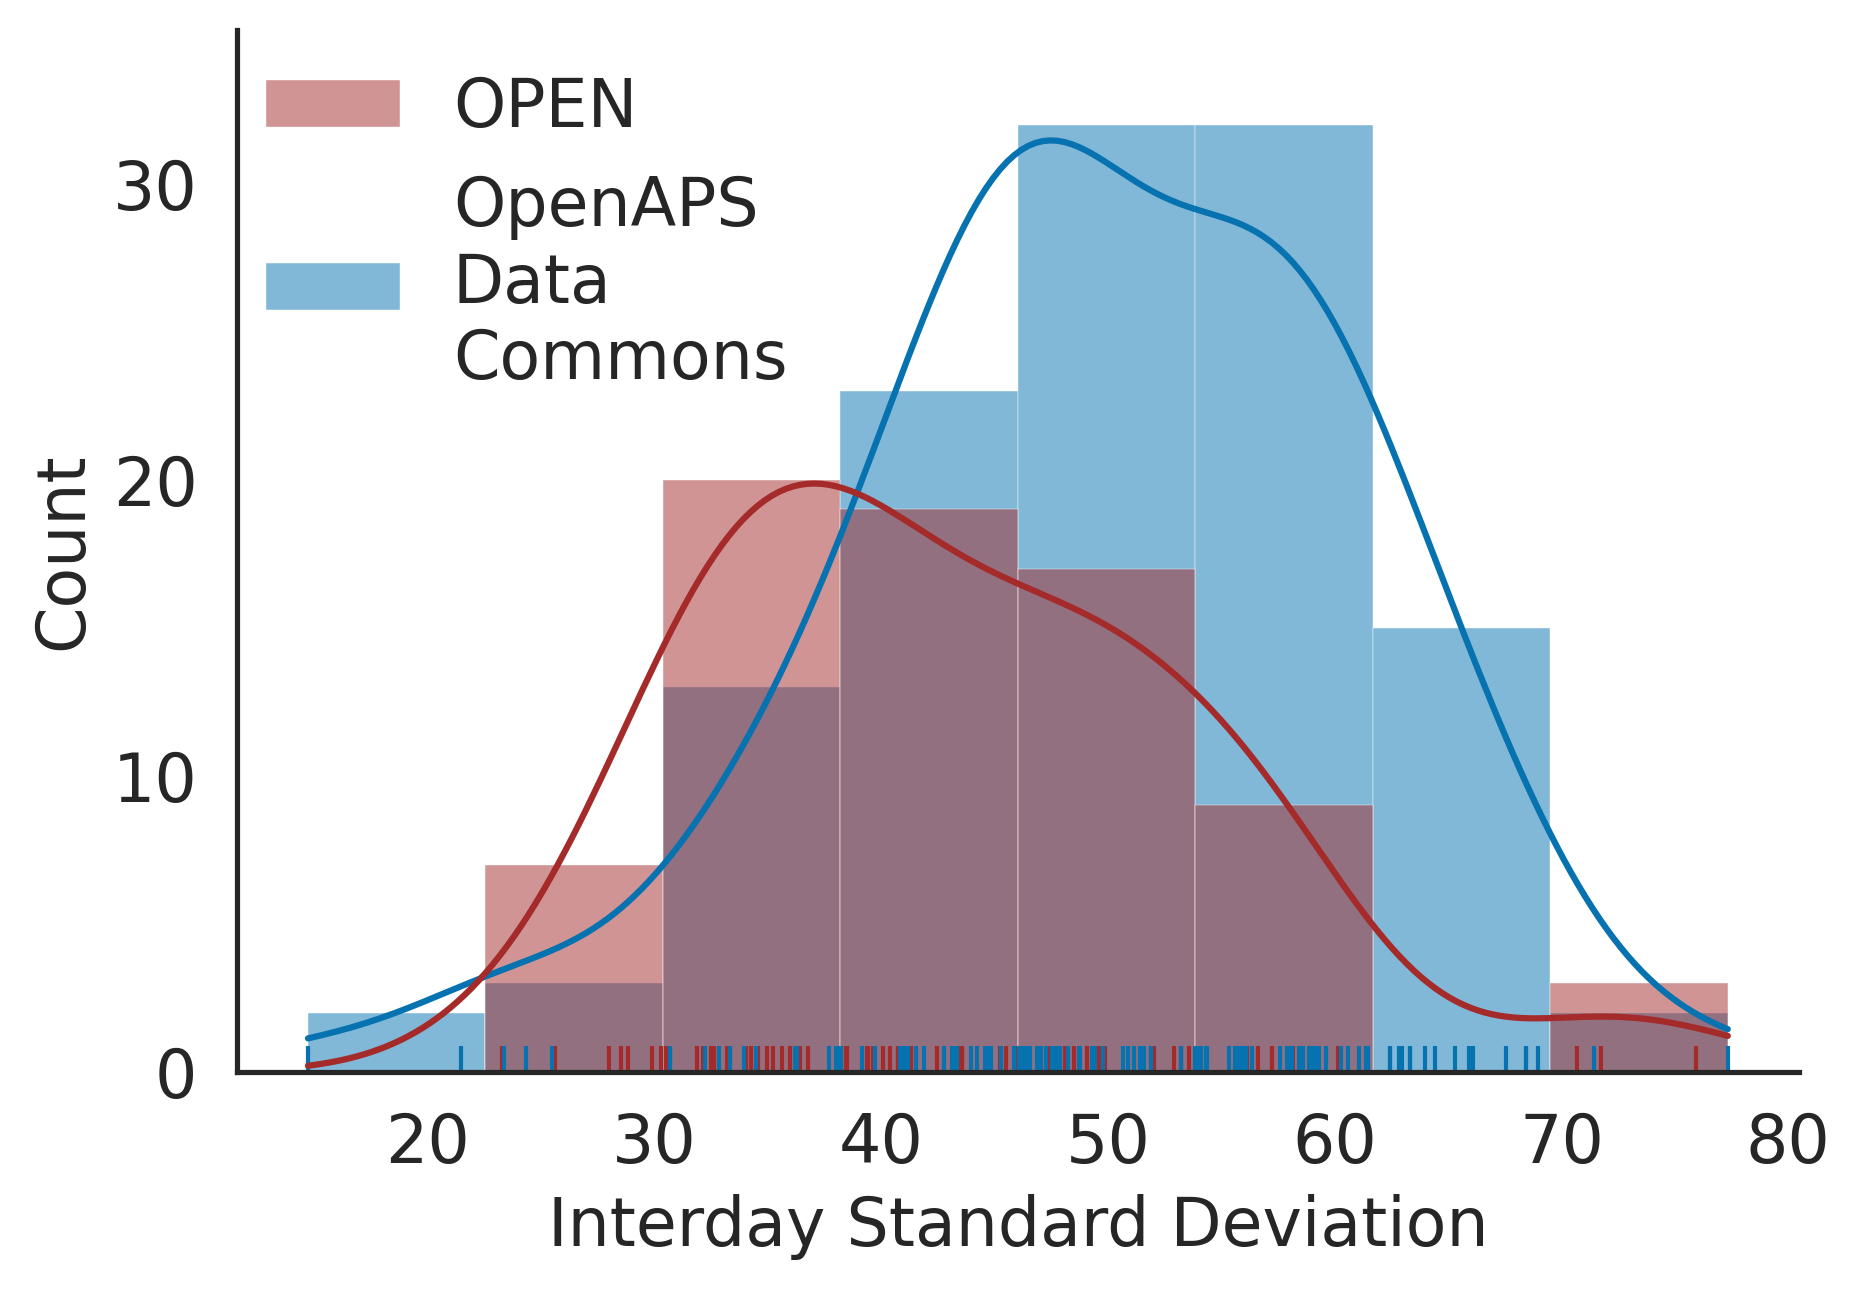

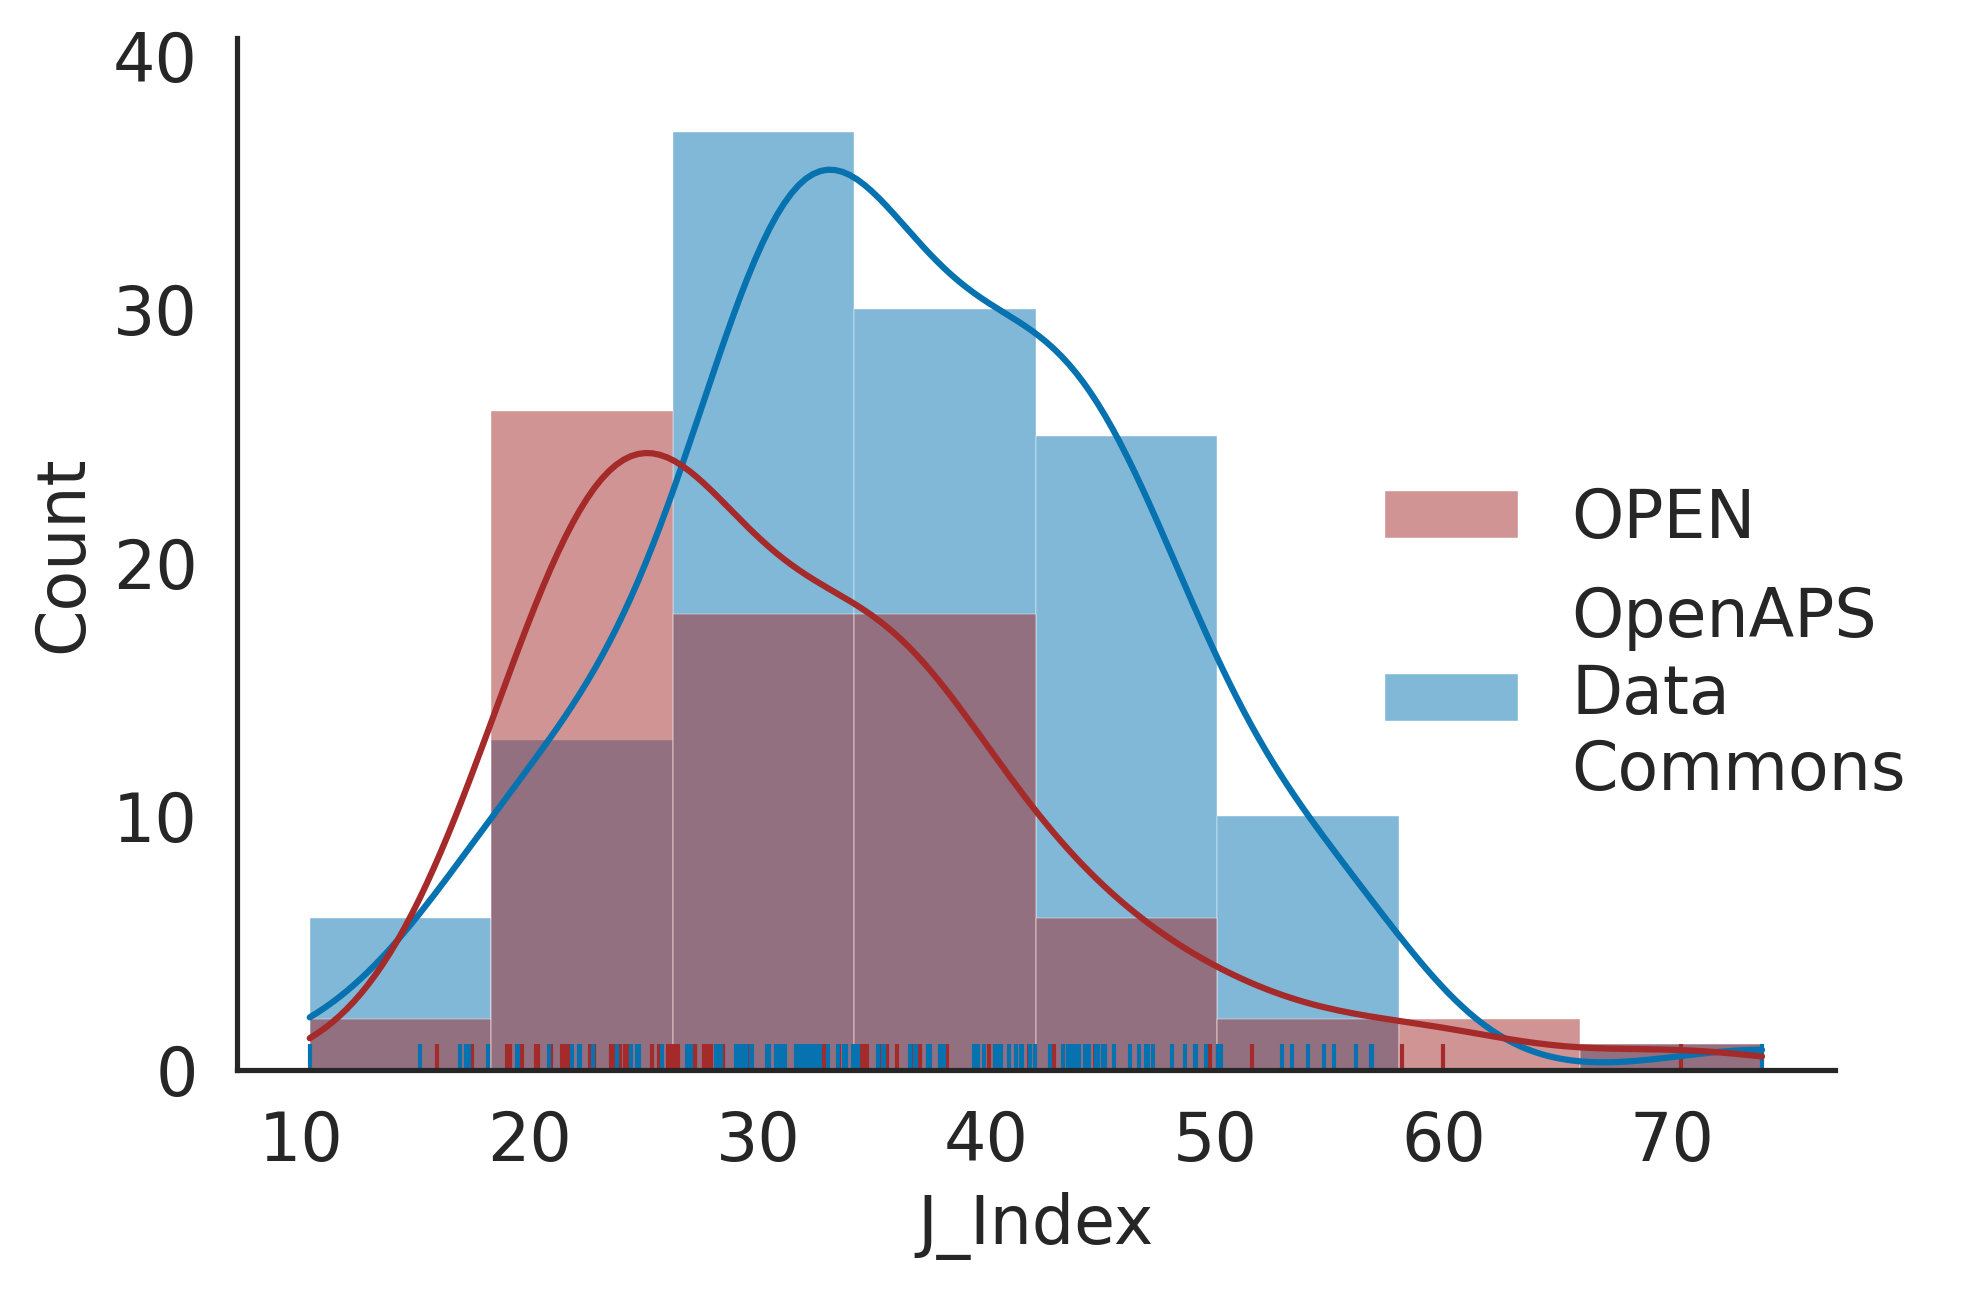

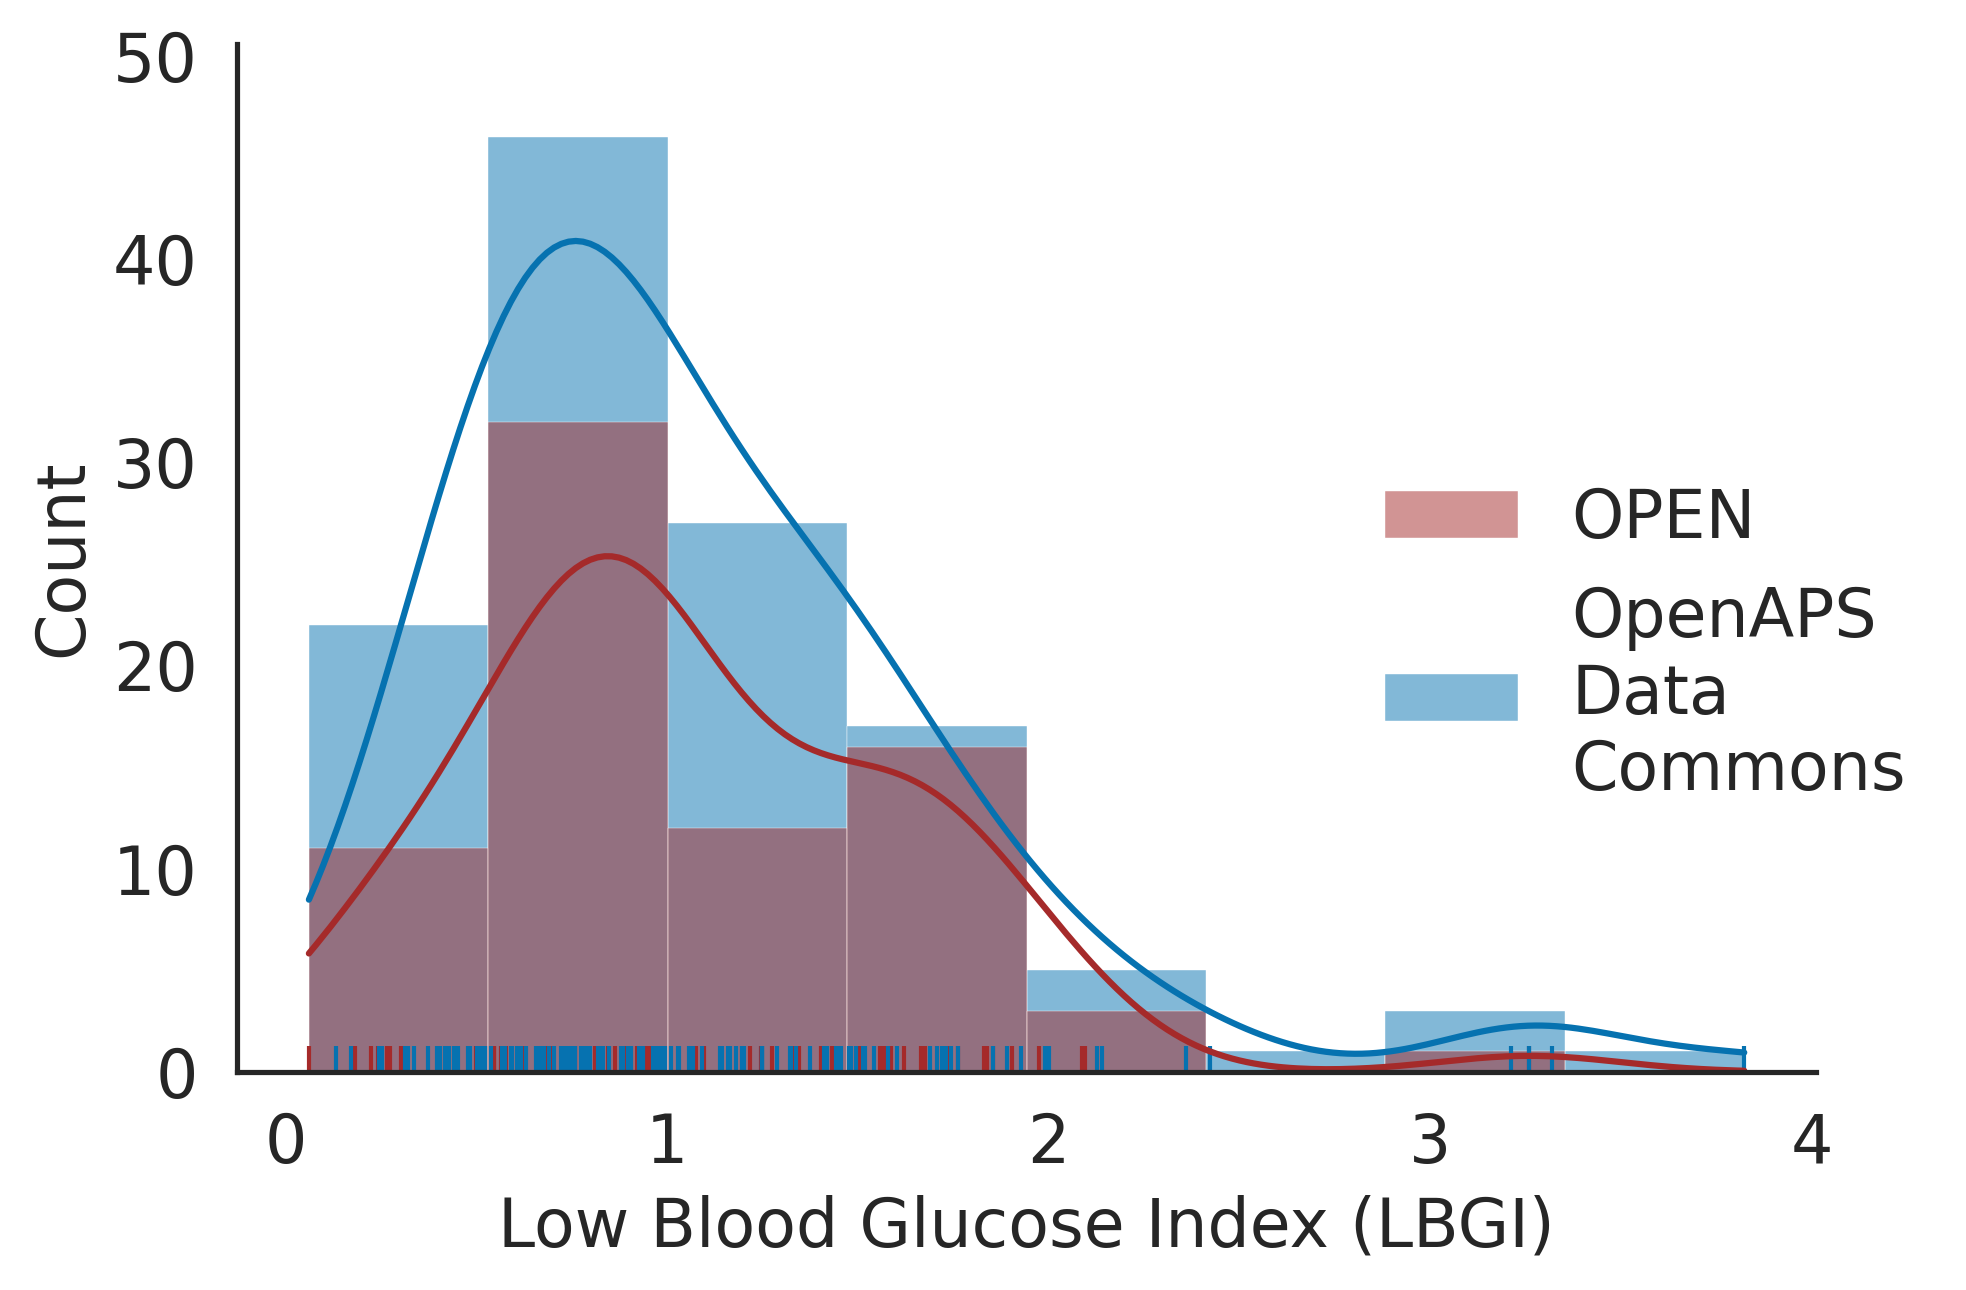

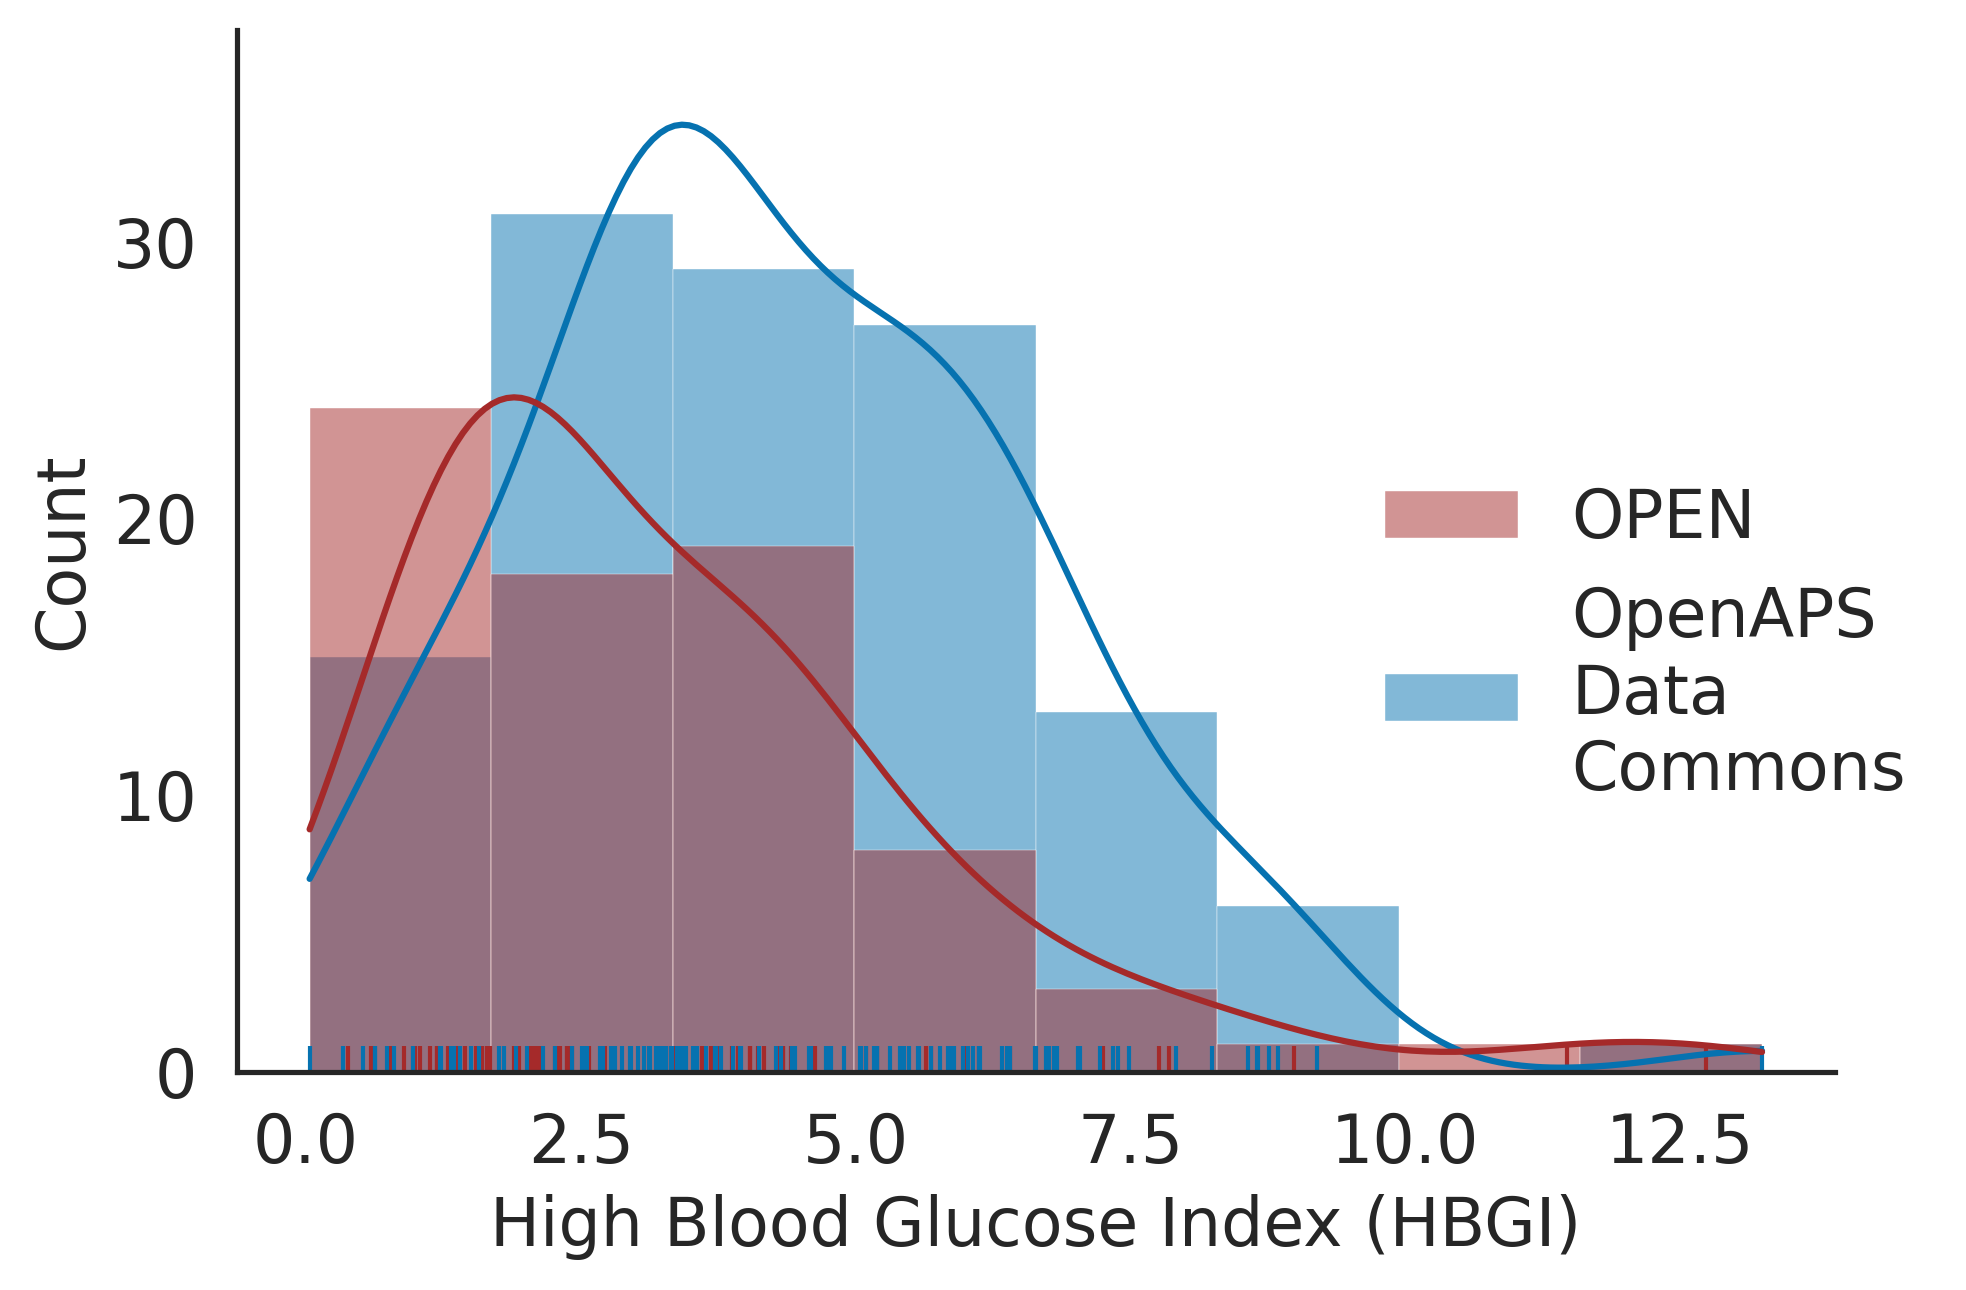

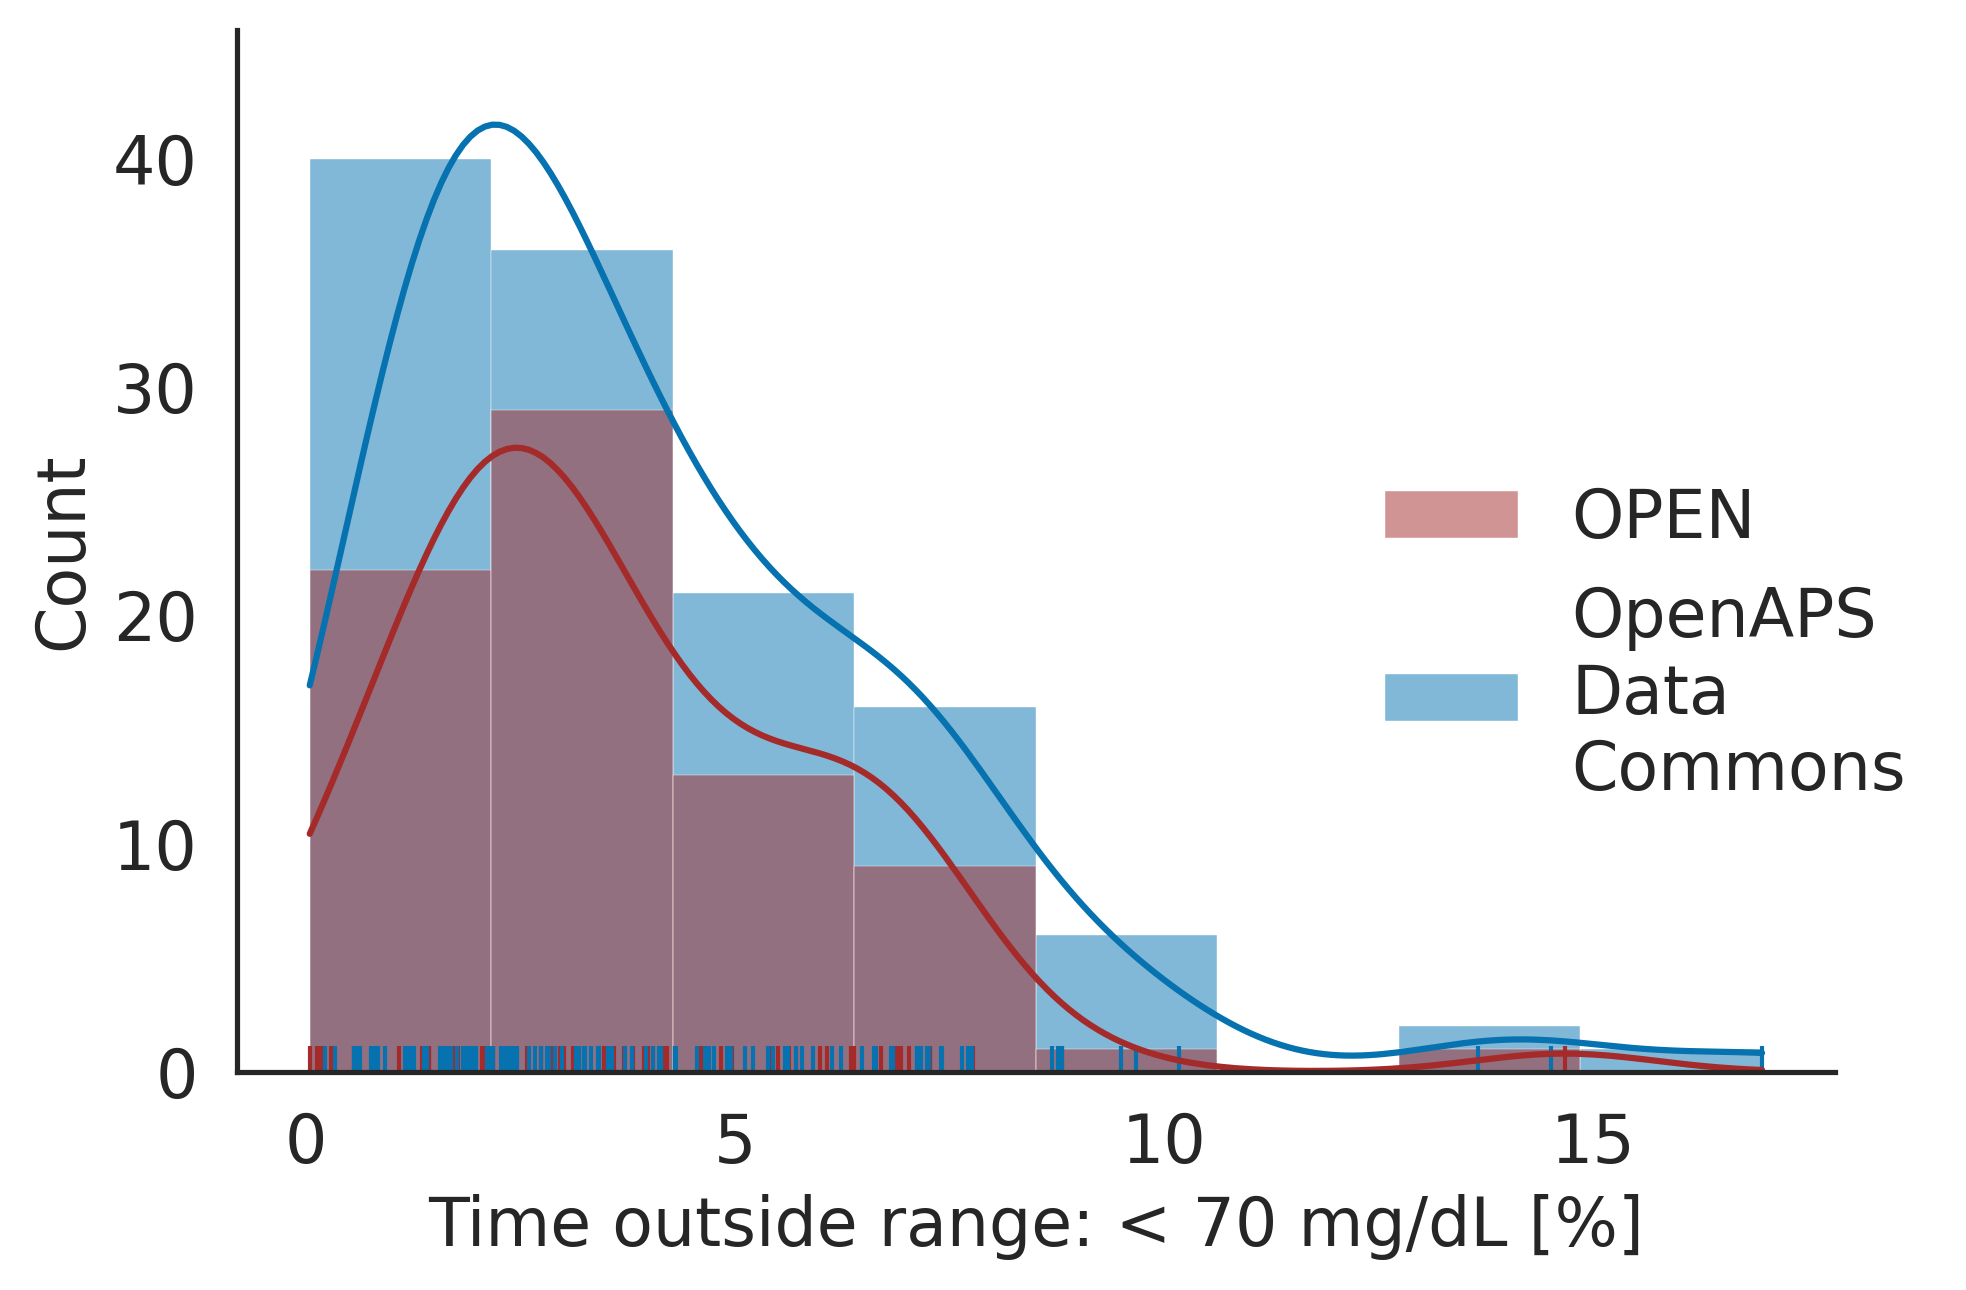

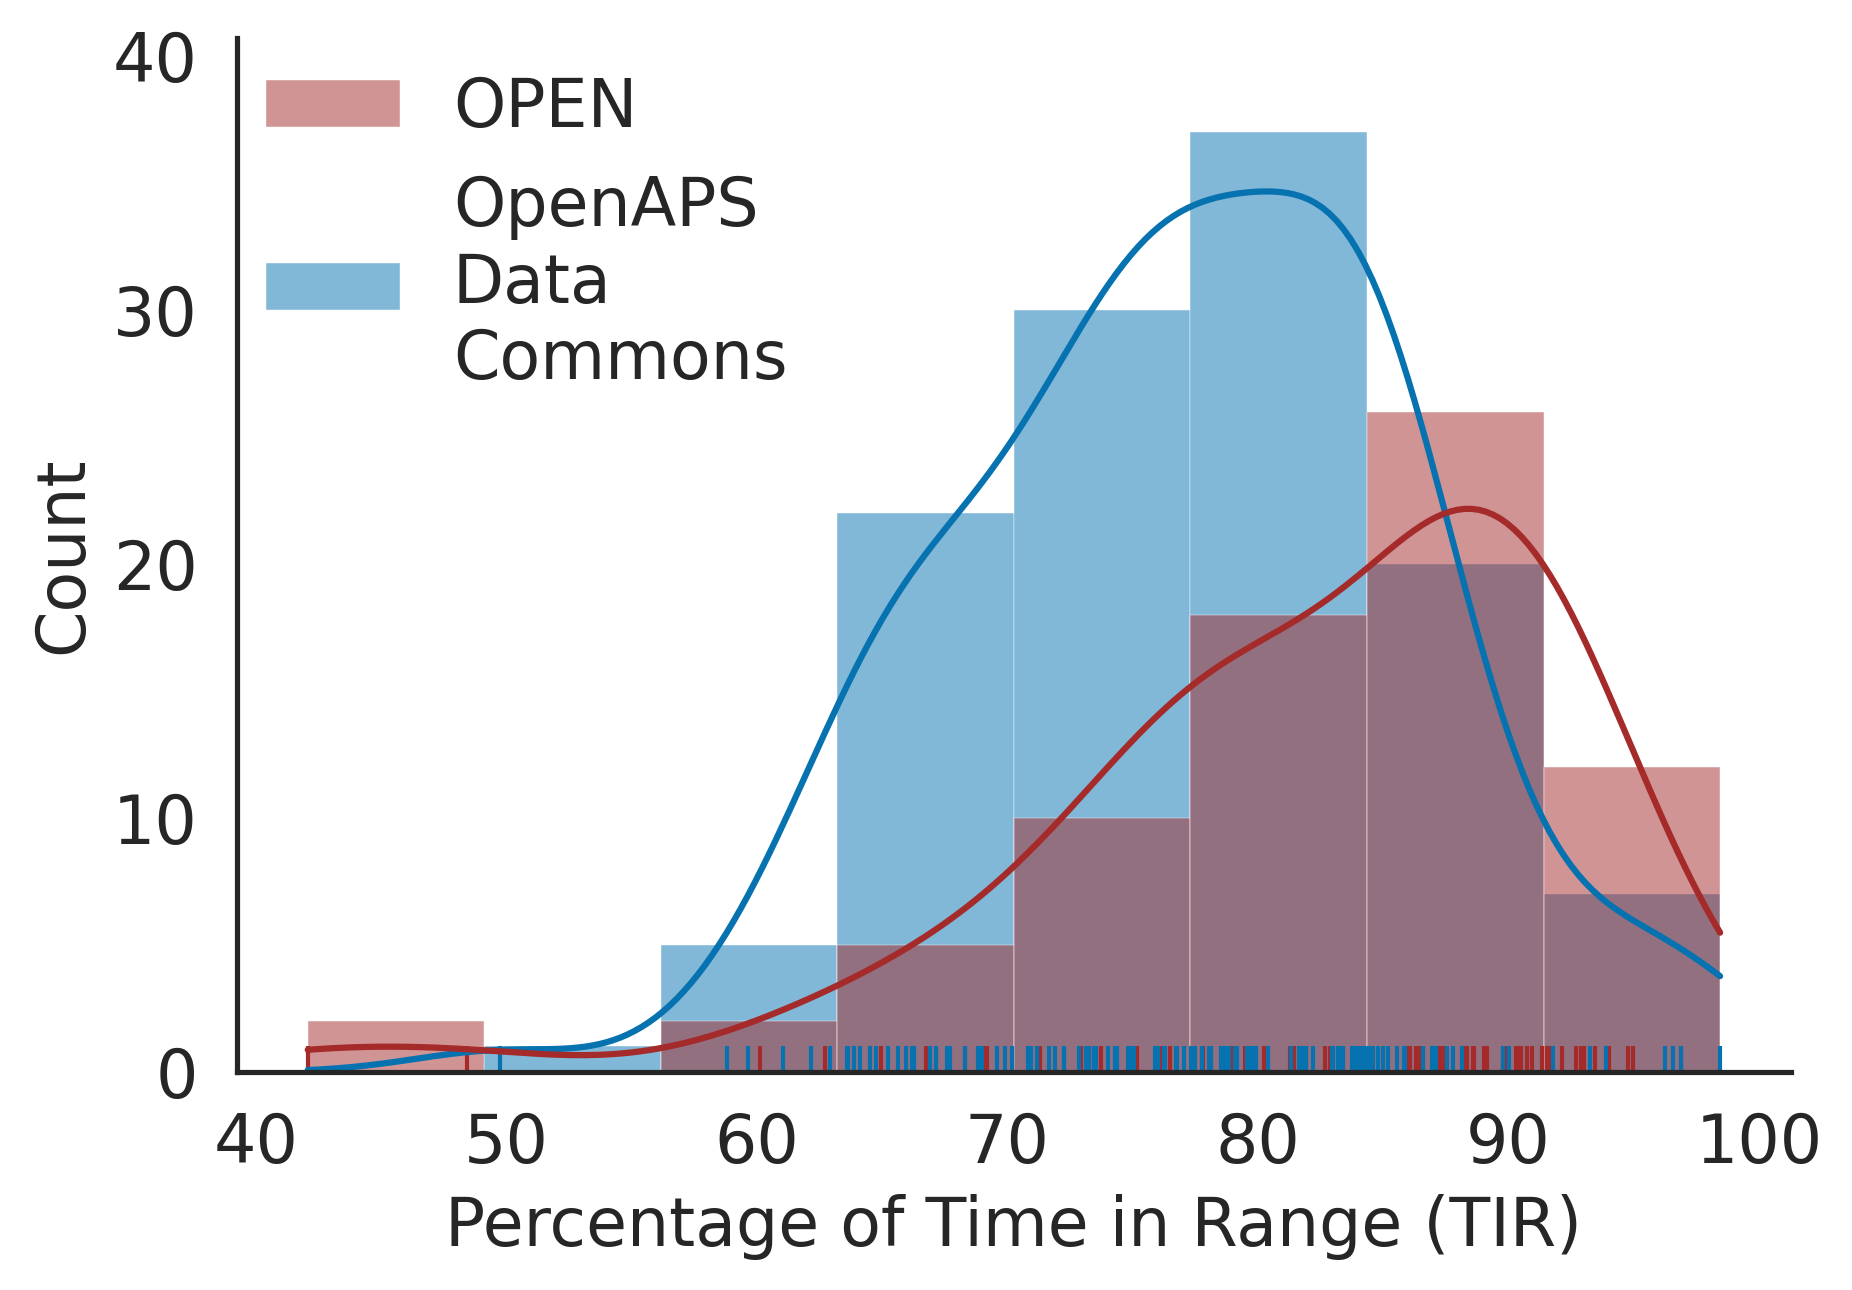

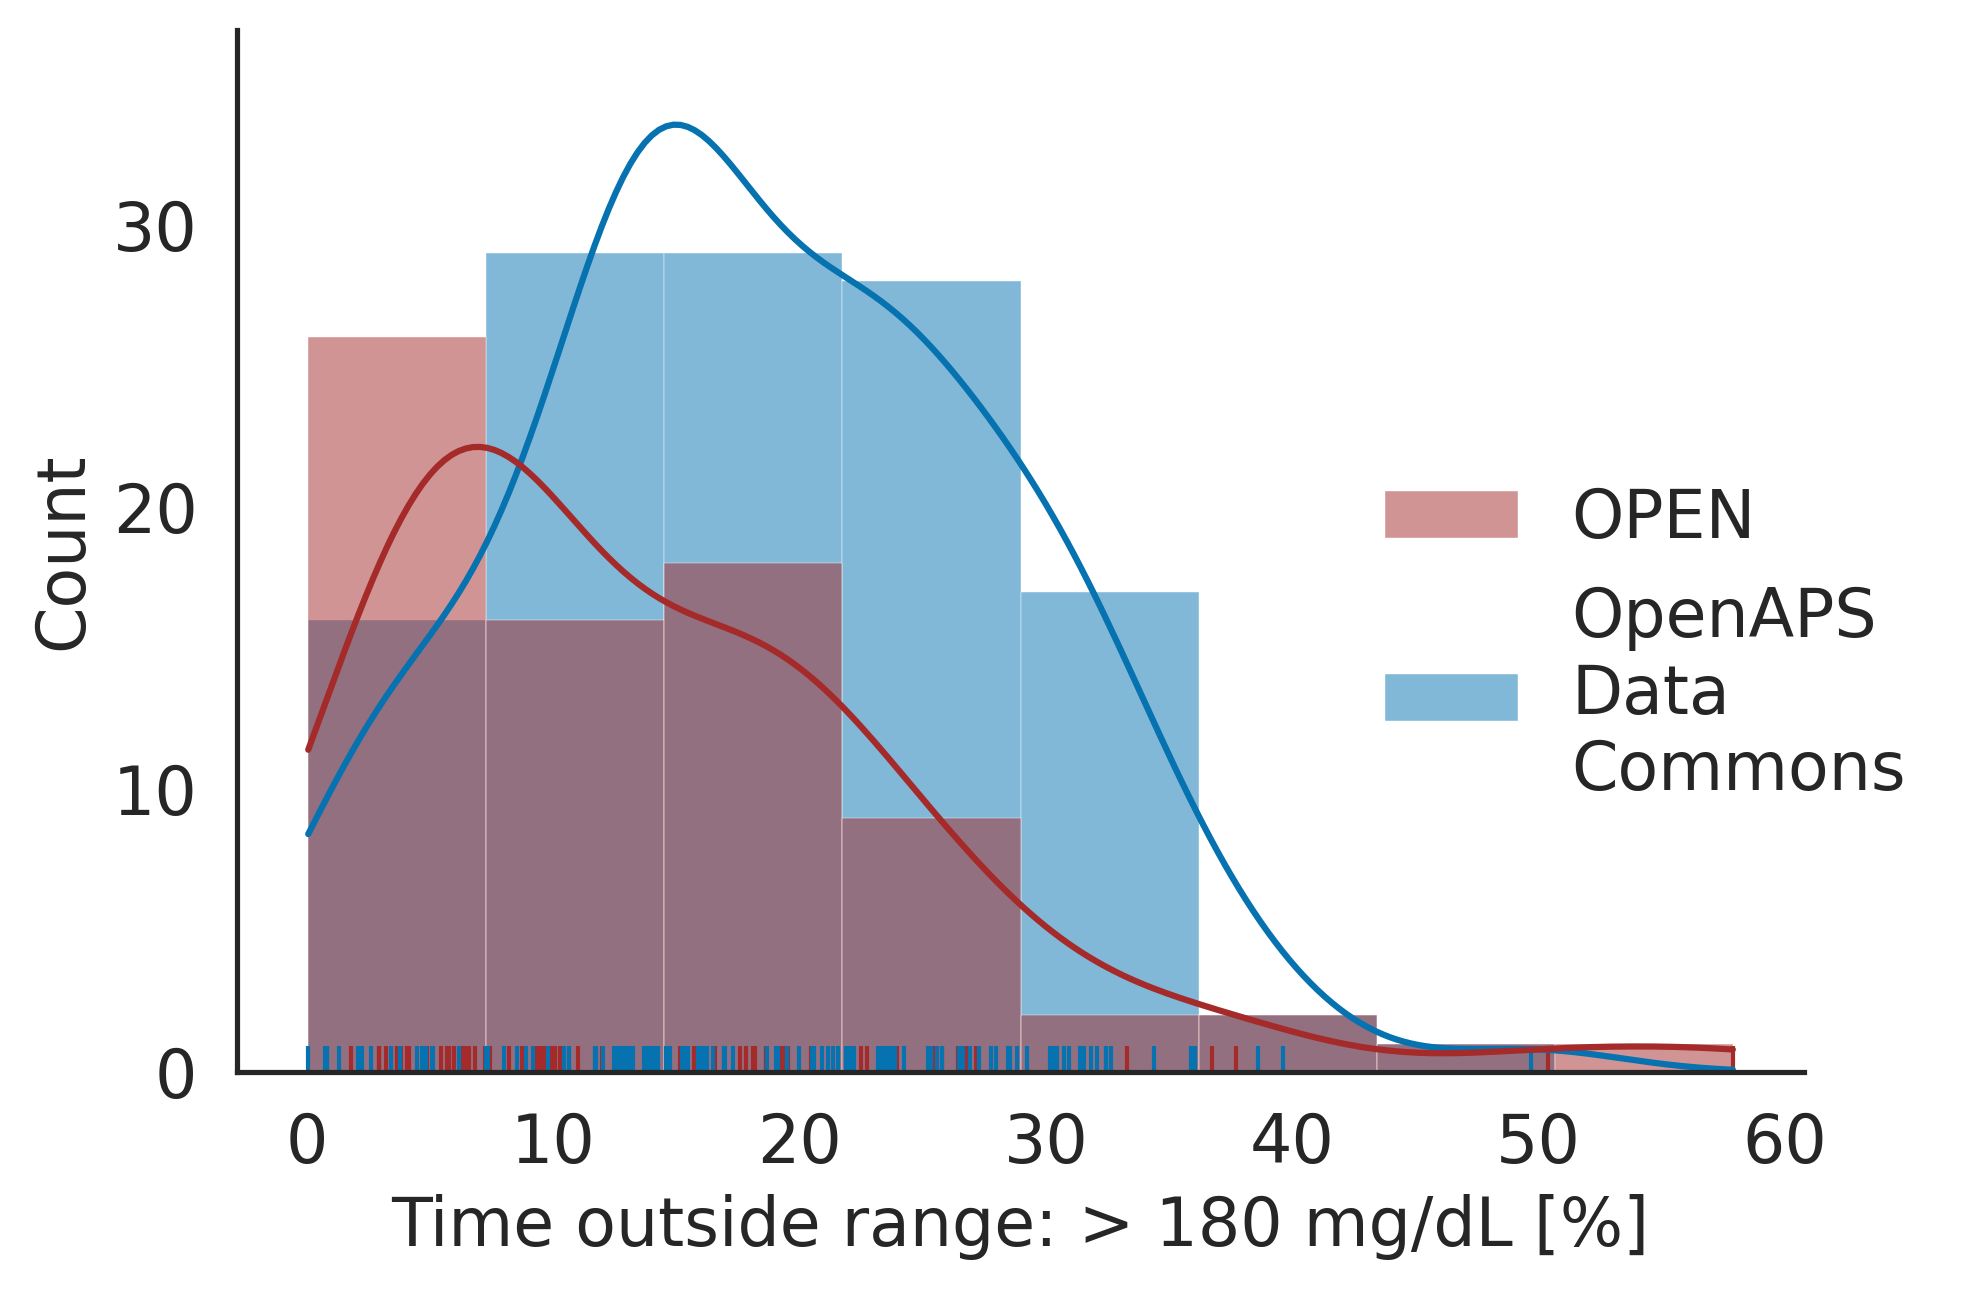

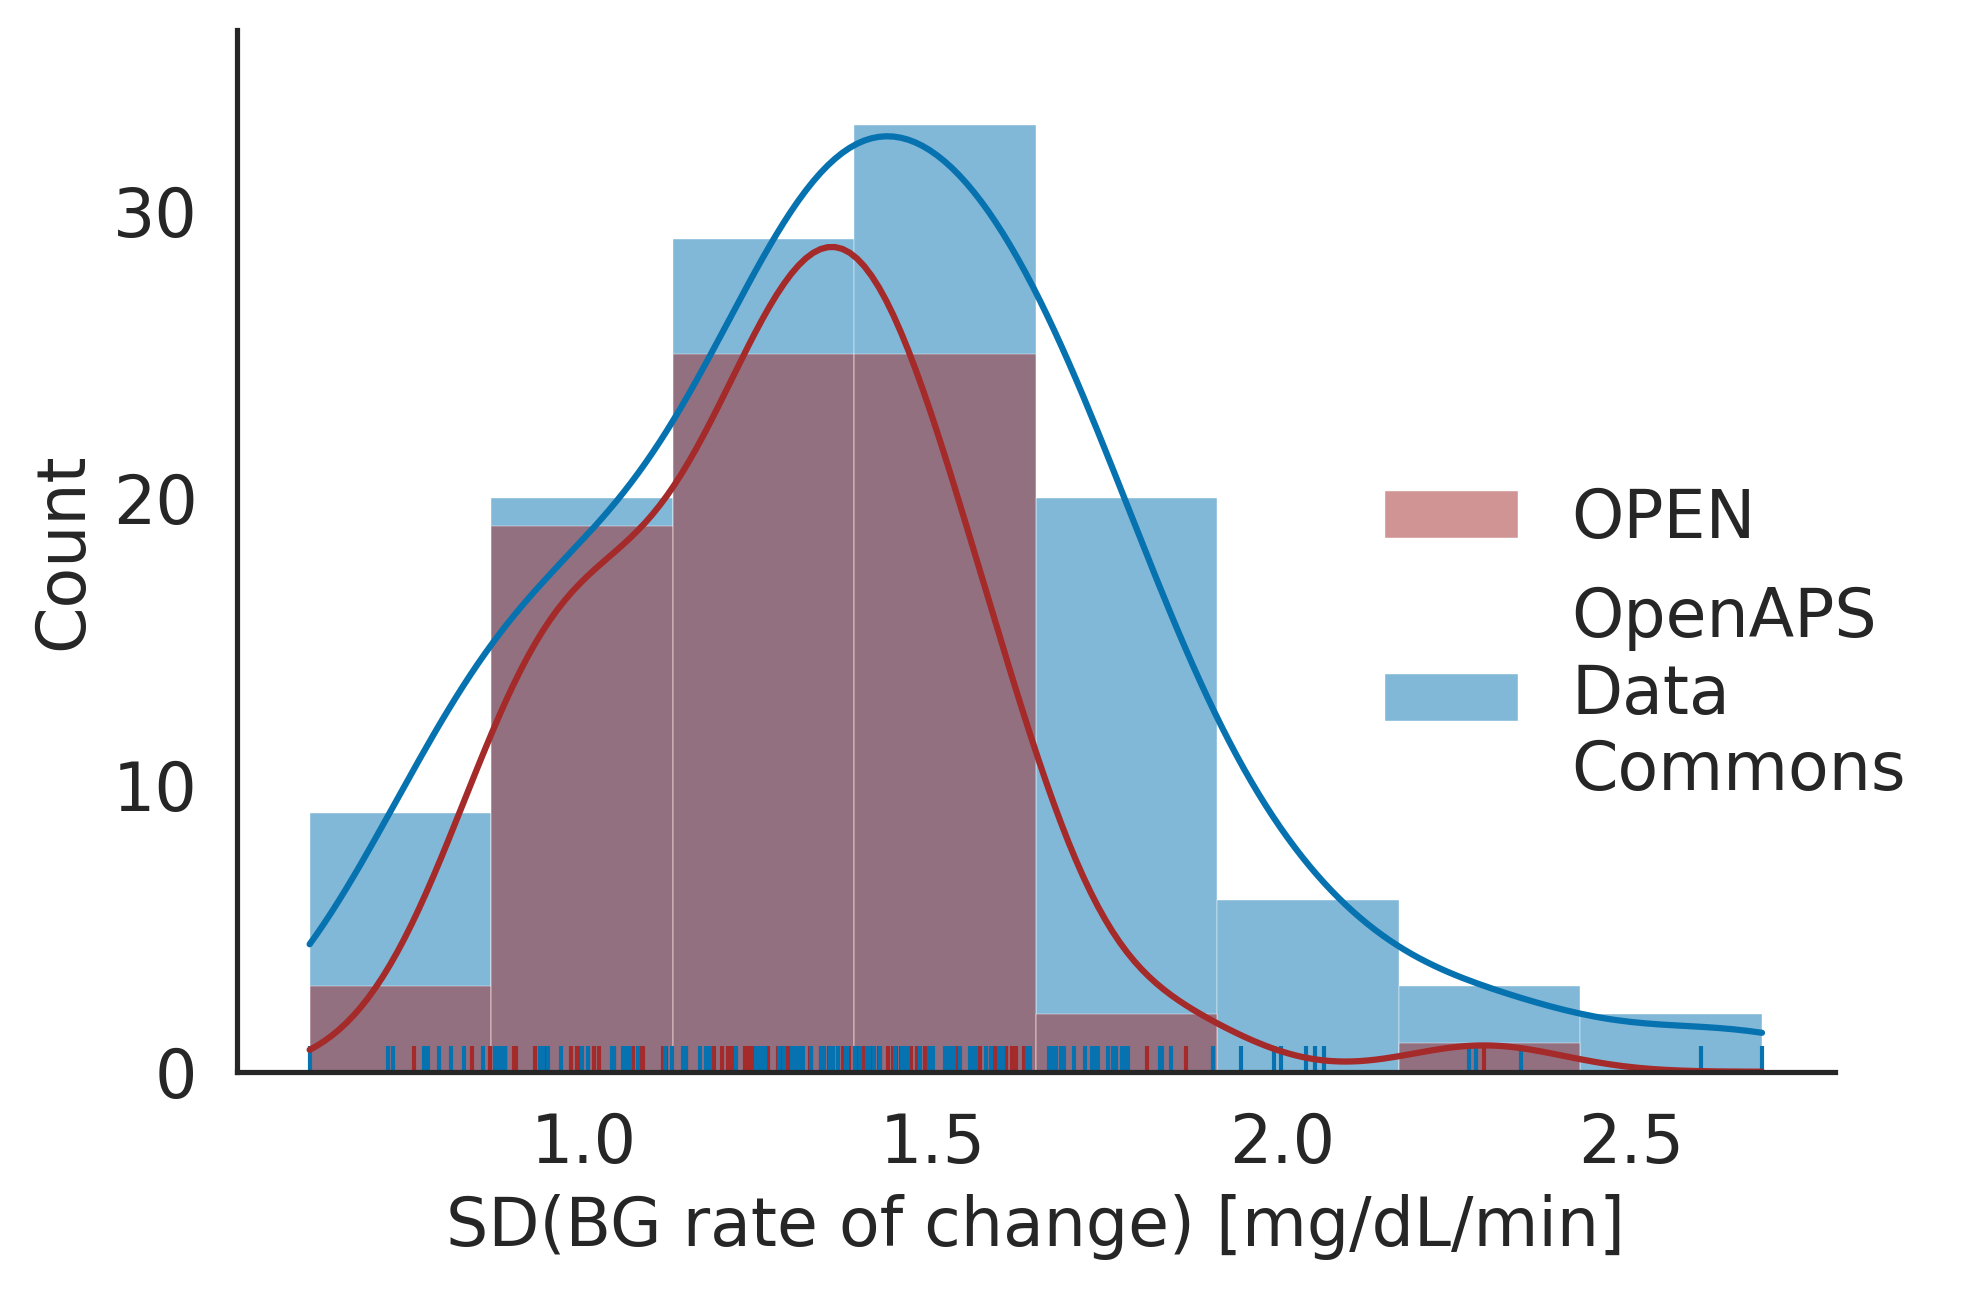

In [8]:
print(df3.columns)
print(df3["project"].unique())
momenta = []
# plot_kde2 does dataset comparison only, no male/female
x = plot_kde2(df3, 'GMI', 'Glucose Management Indicator (GMI)', "a", True)
momenta.append(x)
x = plot_kde2(df3, 'interdaycv', 'Interday Coefficient of Variation', "b", True)
momenta.append(x)
x = plot_kde2(df3, 'interdaysd', 'Interday Standard Deviation', "c", True)
momenta.append(x)
x = plot_kde2(df3, 'J_index', 'J_Index', "d")
momenta.append(x)
x = plot_kde2(df3, 'LGBI', 'Low Blood Glucose Index (LBGI)', "e")
momenta.append(x)
x = plot_kde2(df3, 'HBGI', 'High Blood Glucose Index (HBGI)', "f") 
momenta.append(x)
x = plot_kde2(df3, 'TOR<70', 'Time outside range: < 70 mg/dL [%]', "g")
momenta.append(x)
x = plot_kde2(df3, 'TIR', 'Percentage of Time in Range (TIR)', "h", True)
momenta.append(x)
#x = plot_kde2(df3, 'TOR', 'Percentage of Time Outside Range (TOR)')
#momenta.append(x)
x = plot_kde2(df3, 'TOR>180', 'Time outside range: > 180 mg/dL [%]', "i")
momenta.append(x)
x = plot_kde2(df3, 'bg_roc_stds', 'SD(BG rate of change) [mg/dL/min]', "j")
momenta.append(x)
#x = plot_kde2(df3, 'age', 'age [years]')
#momenta.append(x)
#x = plot_kde2(df3, 'height', 'height [cm]')
#momenta.append(x)
#x = plot_kde2(df3, 'weight', 'weight [kg]')
#momenta.append(x)

df_out = pd.DataFrame(momenta, columns=['mean_x', 'std_x', 'min_x', 'max_x', 'median_x', 'q1_x', 'q3_x', 'IQR_x', 'n_x', 'skew_x', 'kurtosis_x', 'mean_y', 
    'std_y', 'min_y', 'max_y', 'median_y', 'q1_y', 'q3_y', 'IQR_y', 'n_y', 'skew_y', 'kurtosis_y', 'z_statistic', 'p_value', 
    'ks_statistic', 'p_value_ks', 'mw_statistic', 'p_value_mw'])
df_out.index = ['HBGI', 'LBGI', 'GMI', 'J_index', 'interdaysd', 'interdaycv', 'TIR', 'TOR<70', 'TOR>180', 'bg_roc_stds']
#df_gender_out2 = pd.DataFrame(momenta_gender2, columns=['mean_x', 'std_x', 'min_x', 'max_x', 'median_x', 'q1_x', 'q3_x', 'IQR_x', 'n_x', 'skew_x', 'kurtosis_x', 'mean_y', 
#    'std_y', 'min_y', 'max_y', 'median_y', 'q1_y', 'q3_y', 'IQR_y', 'n_y', 'skew_y', 'kurtosis_y', 'z_statistic', 'p_value', 
#    'ks_statistic', 'p_value_ks', 'mw_statistic', 'p_value_mw'])


In [10]:
# sort df_out by index
df_out = df_out.reindex(["interdaysd","interdaycv","bg_roc_stds","TOR<70","TIR","TOR>180", "J_index","LBGI","HBGI","GMI"])
print(df_out)
df_out.to_csv("momenta.csv")

                mean_x      std_x      min_x      max_x   median_x       q1_x  \
interdaysd   49.750394  11.215002  14.707814  77.331936  49.338118  43.130734   
interdaycv   35.433650   5.038295  16.862385  44.937481  35.869040  32.422746   
bg_roc_stds   1.417367   0.389725   0.606594   2.687791   1.406631   1.150276   
TOR<70        4.006967   2.963419   0.230000  16.970000   3.220000   1.787500   
TIR          77.256885   8.952792  49.750000  98.450000  77.910000  71.177500   
TOR>180      18.736148   9.768577   0.050000  49.670000  17.140000  12.717500   
J_index      36.416946  10.483748  10.389813  73.929880  35.487742  29.708257   
LBGI          1.086480   0.654695   0.133531   3.822956   0.950067   0.636706   
HBGI          4.356961   2.278247   0.032707  13.249534   3.954945   2.829733   
GMI           6.634876   0.425091   5.396365   7.964080   6.627455   6.384457   

                  q3_x      IQR_x  n_x    skew_x  ...      IQR_y  n_y  \
interdaysd   58.102482  14.971748  

In [9]:
def plot_kde(df, var, xlabel, subfig_index, move_legend=False):
    sns.set_theme(context="notebook", style="white")
    #sns.set_theme(rc={'alpha' : 0.5, 'linewidth' : 0.1, 'kde' : True, 'rug':True})
    
    df[var] = df[var].astype(float)

    #plt.rcParams.update({'font.size': 30, 'legend.fontsize': 18, 'legend.title_fontsize': 20, 'legend.title_fontcolor': "yellow"})
    plt.rcParams.update({'font.size': 30, 'legend.fontsize': 16, 'legend.title_fontsize': 16, 'axes.labelsize': 18, 'axes.titlesize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18})
    nbins = 8  # number of bins
    fg= sns.displot(df,
                x=df[var],
                hue=df['gender'],
                palette=["brown", "#0672B0"],
                alpha=0.5,
                linewidth=0.1,
                bins=nbins,
                kde=True, 
                rug=True)
    plt.xlabel(xlabel)
    plt.tight_layout()
    if move_legend: 
        sns.move_legend(fg, title="", loc='upper left', bbox_to_anchor=(0.25, 0.85), ncol=1)
    else: 
        fg.legend.set_title(title="")
        #sns.set_legend_title(fg, title="xxx", prop={"size": 20})        
        #sns.move_legend(fg, title="", loc='center right', ncol=1)
    #plt.savefig("OPENonOH_gender_kde_"+var+".png")
    plt.savefig(f"Figure-7{subfig_index}.png")

    # calculate stats:
    x = df.loc[df['gender']=='Female', var].tolist()
    IQR_x = np.percentile(x, 75) - np.percentile(x, 25)
    y = df.loc[df['gender']=='Male', var].tolist()
    IQR_y = np.percentile(x, 75) - np.percentile(x, 25)
    
    z_statistic, p_value = smws.ztest(x, y)
    ks_statistic, p_value_ks = ks_2samp(x, y)
    mw_statistic, p_value_mw = mannwhitneyu(x, y)

    out = [np.mean(x), np.std(x), np.min(x), np.max(x), np.median(x), np.percentile(x, 25), np.percentile(x, 75), IQR_x, len(x), skew(x), kurtosis(x)]
    out.extend([np.mean(y), np.std(y), np.min(y), np.max(y), np.median(y), np.percentile(y, 25), np.percentile(y, 75), IQR_y, len(y), skew(y), kurtosis(y)])
    out.extend([z_statistic, p_value, ks_statistic, p_value_ks, mw_statistic, p_value_mw])
    return out

In [14]:
selection = (df1["bg_roc_stds"]<2) & (df1["TOR>180"]<50) & (df1["TOR<70"]<10) & (df1["TIR"]>50) & (df1["interdaysd"]<65) & (df1["interdaycv"]<45) & (df1["GMI"]<7.5)
df1_inlier = df1[selection].copy()
df1_outlier = df1[~(selection)].copy()
print(df1_outlier[["id", "age", "gender", "height", "weight","bg_roc_stds", "TOR>180", "TOR<70", "TIR", "interdaysd", "interdaycv", "GMI"]])
#print(df1["country"])

          id   age  gender  height  weight  bg_roc_stds  TOR>180  TOR<70  \
1   37159654  28.0  Female  157.48    75.0     1.613297    25.45    7.78   
27  72501221  24.0  Female  163.00    65.0     1.589365     3.42   14.67   
28  70981757  38.0    Male  181.00   119.0     1.537342    33.27    1.78   
30  21218454   8.0  Female  114.00    22.0     1.324202    50.38    1.18   
40  38625719  40.0  Female  162.00    72.0     2.289725    22.74    2.15   
48   2773391  39.0    Male  190.00    74.0     1.262779    57.88    0.05   

      TIR  interdaysd  interdaycv       GMI  
1   66.77   75.950309   50.233776  6.926553  
27  81.91   35.211295   33.507349  5.823640  
28  64.96   70.663854   41.427000  7.390140  
30  48.43   71.750486   37.076642  7.938984  
40  75.10   45.251319   30.724301  6.832982  
48  42.07   53.554461   27.993499  7.886144  


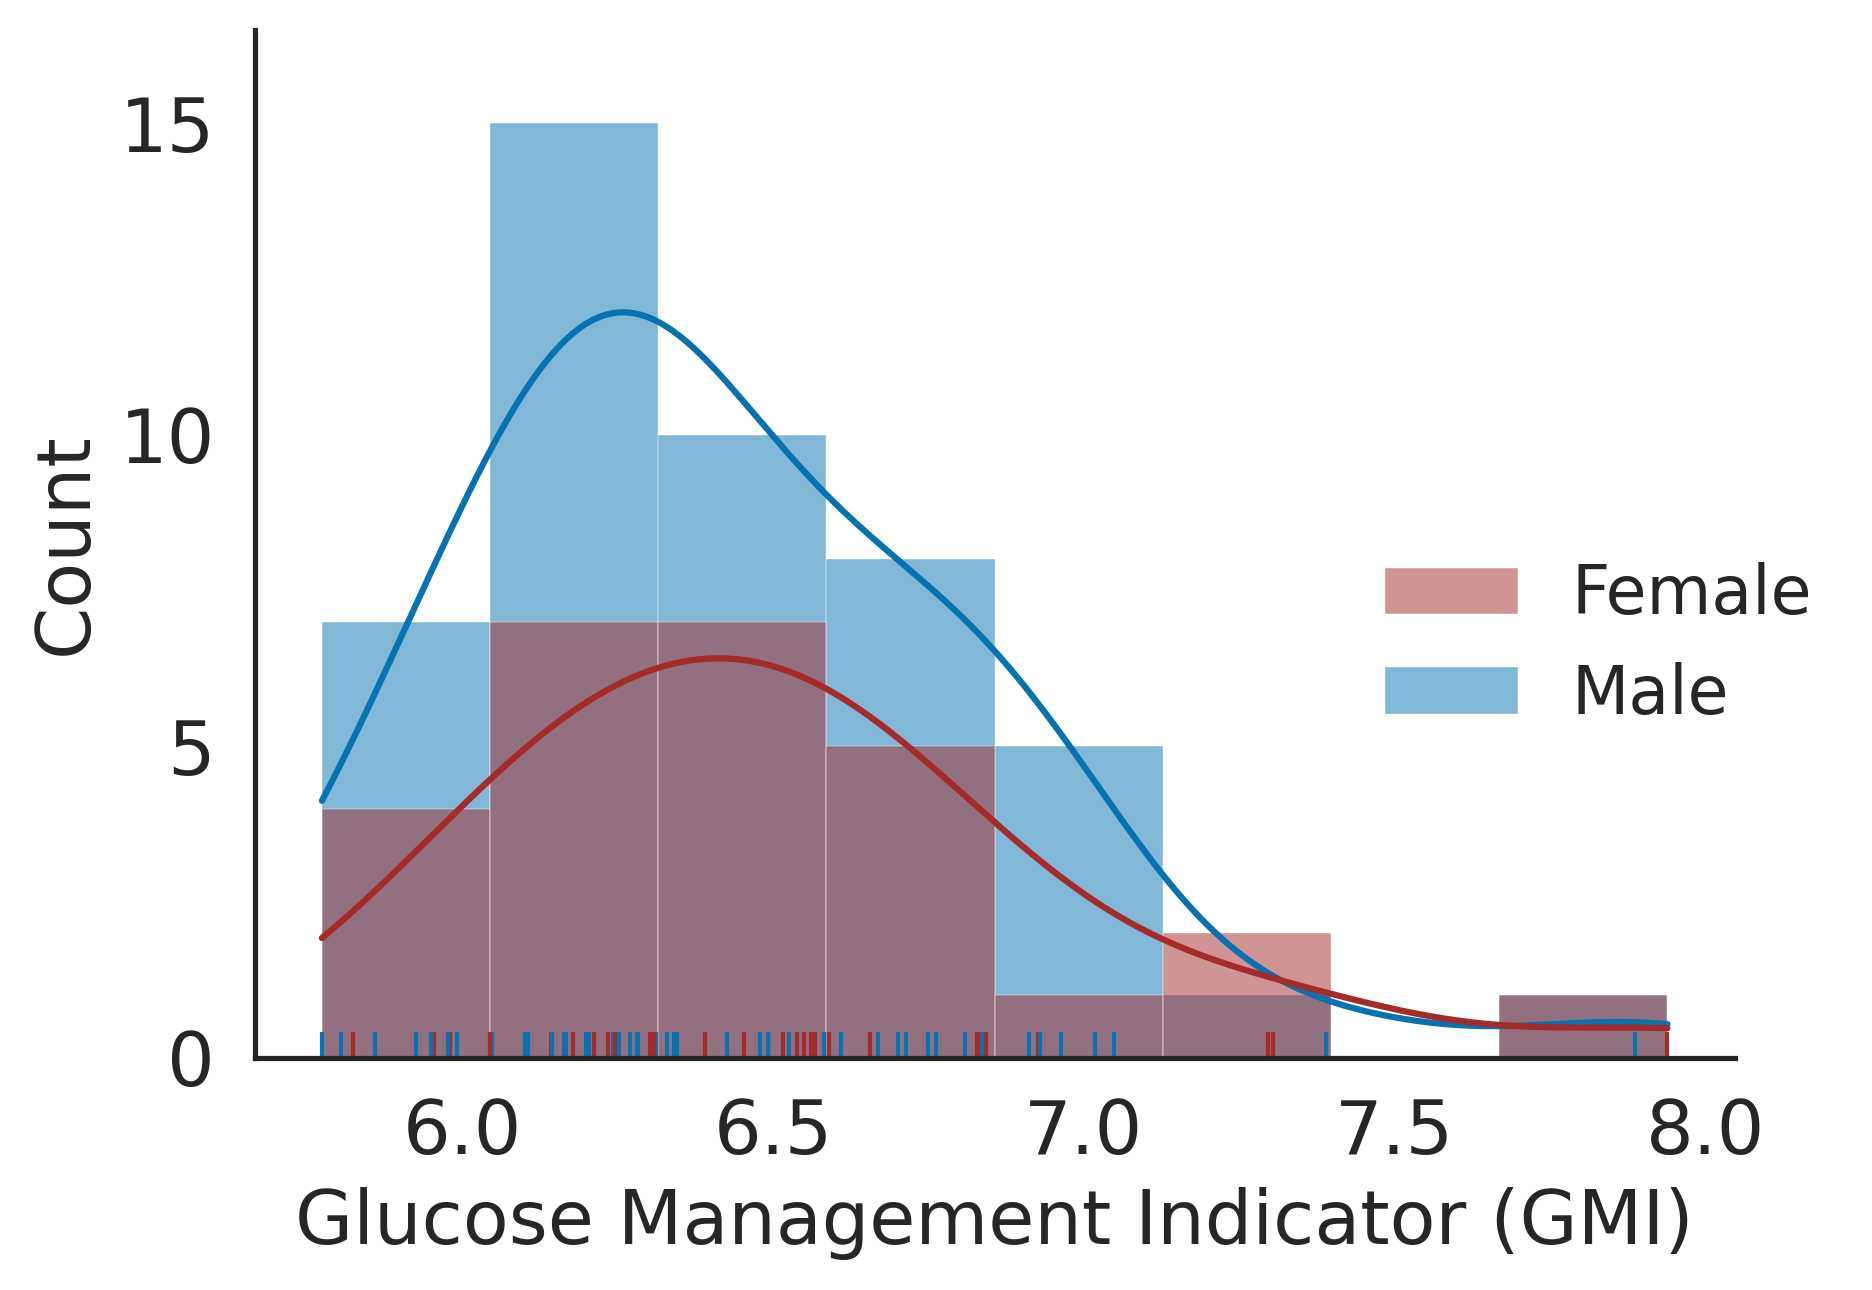

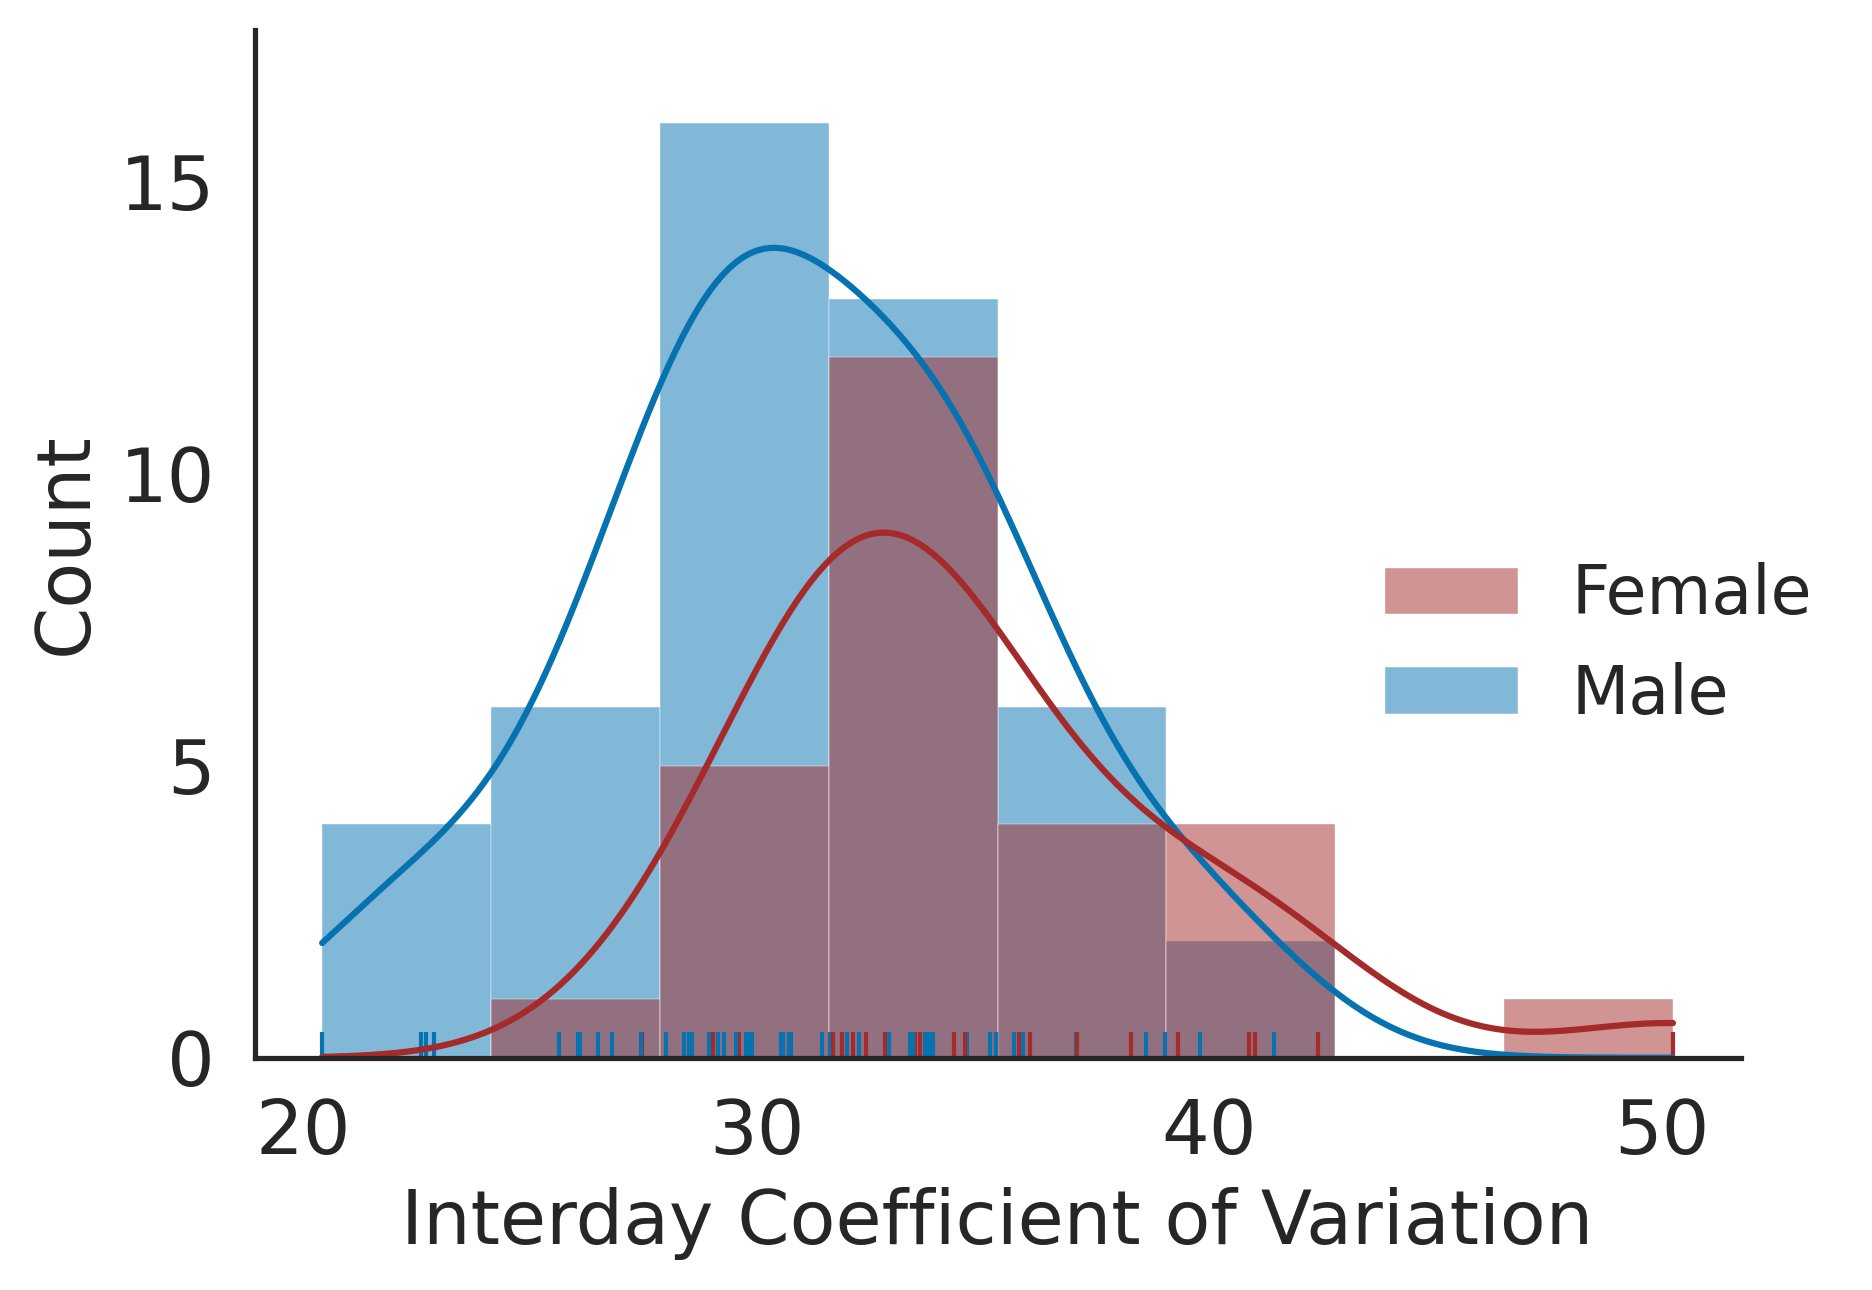

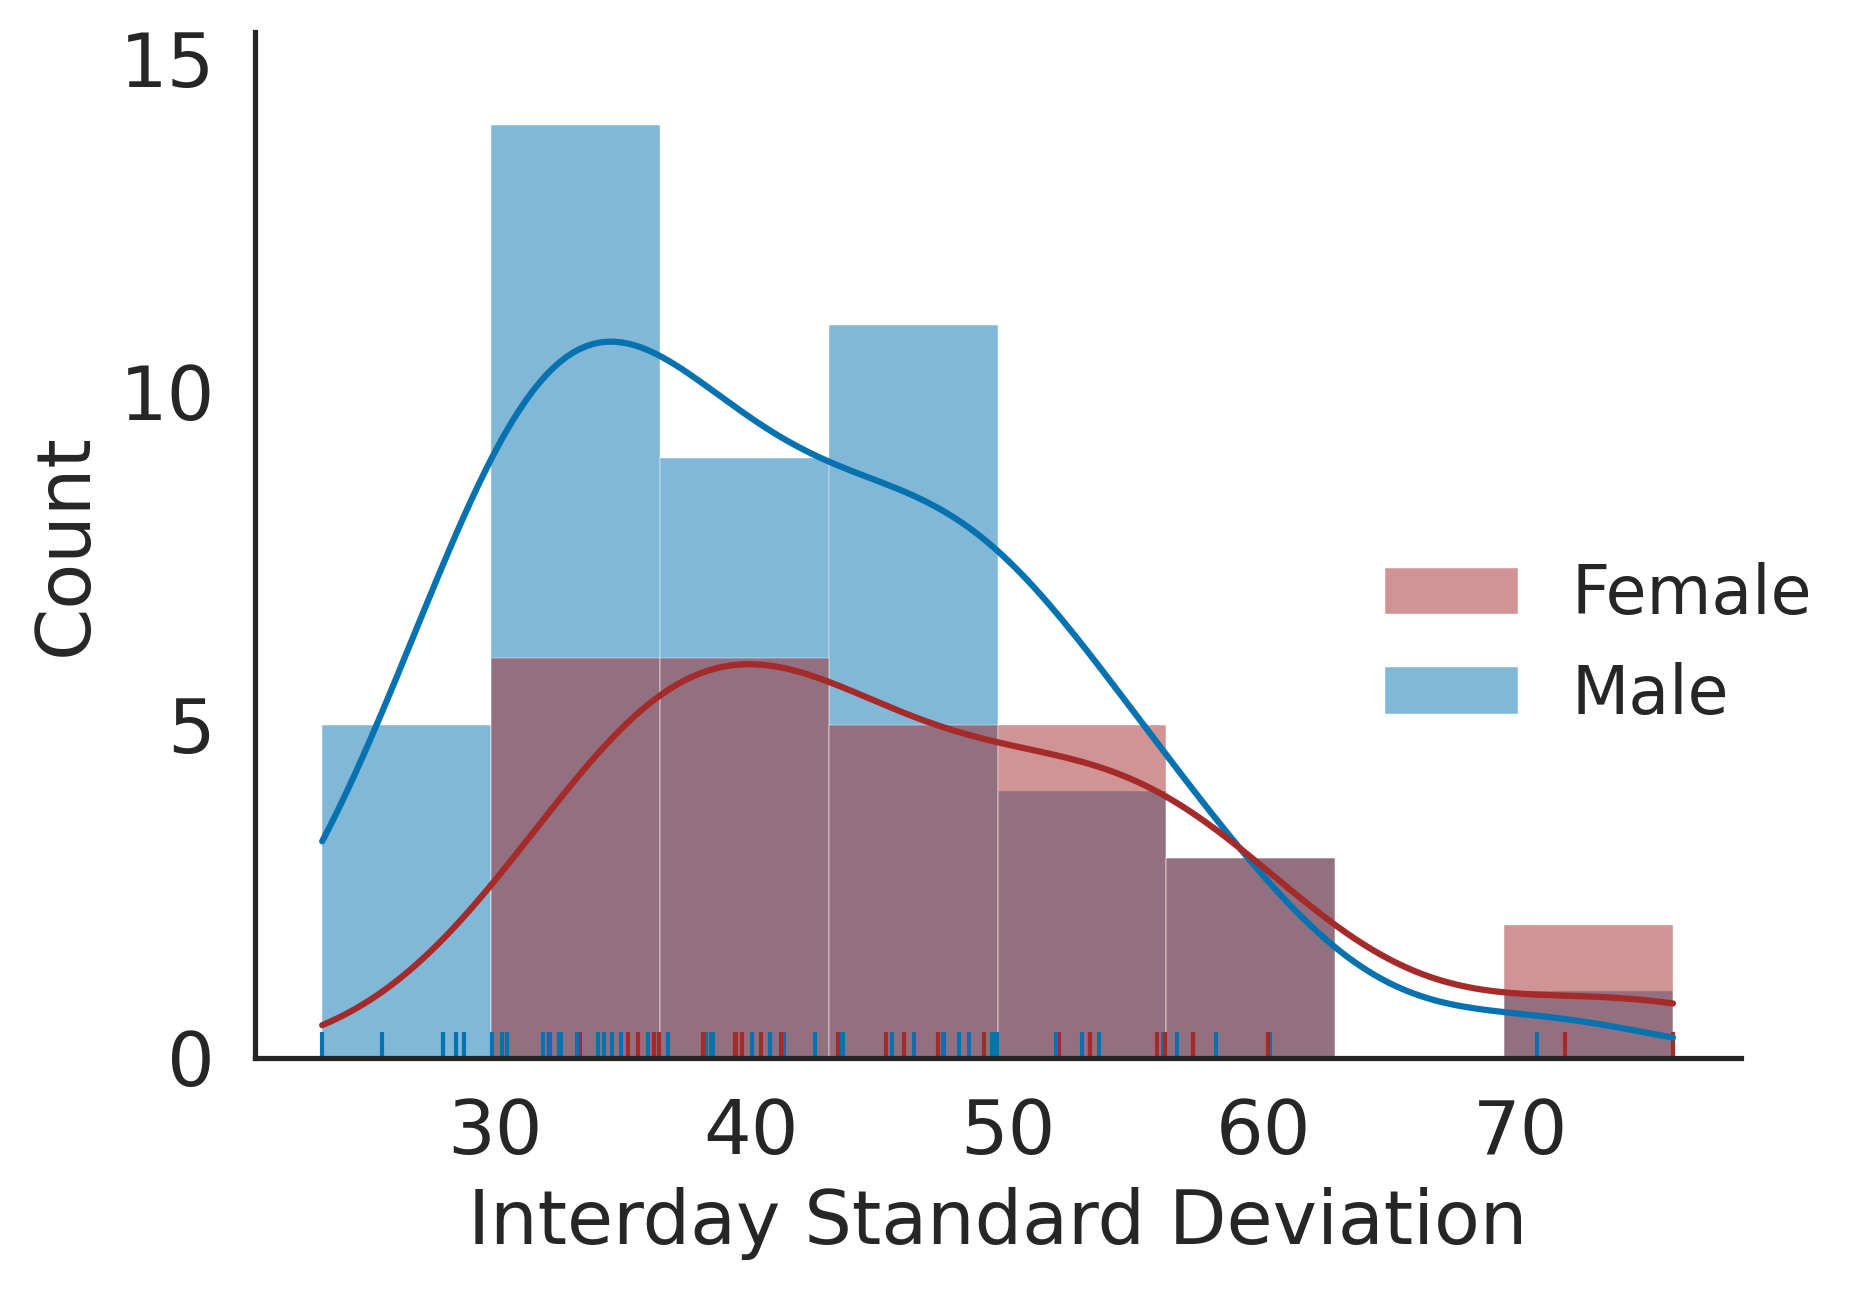

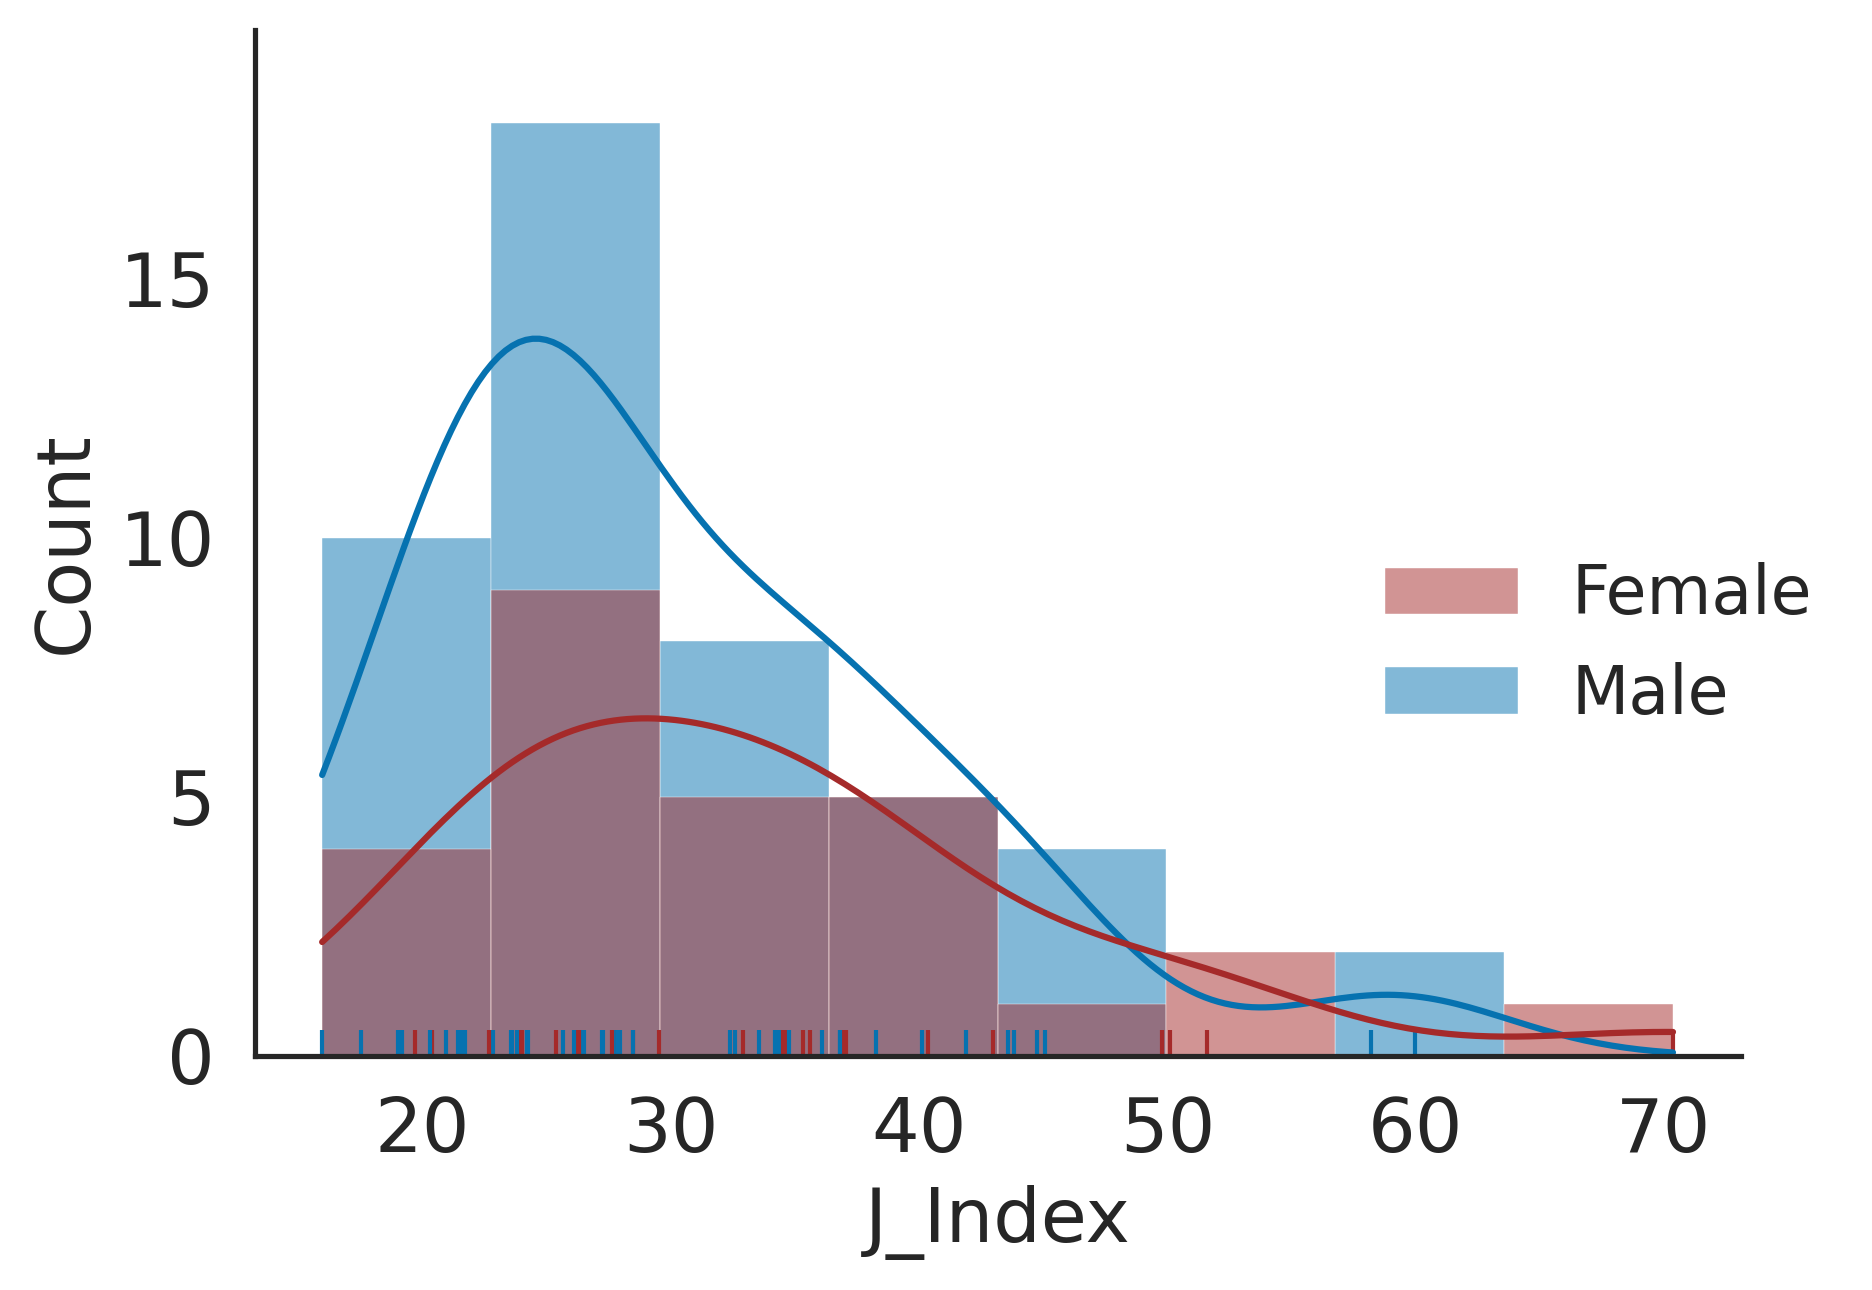

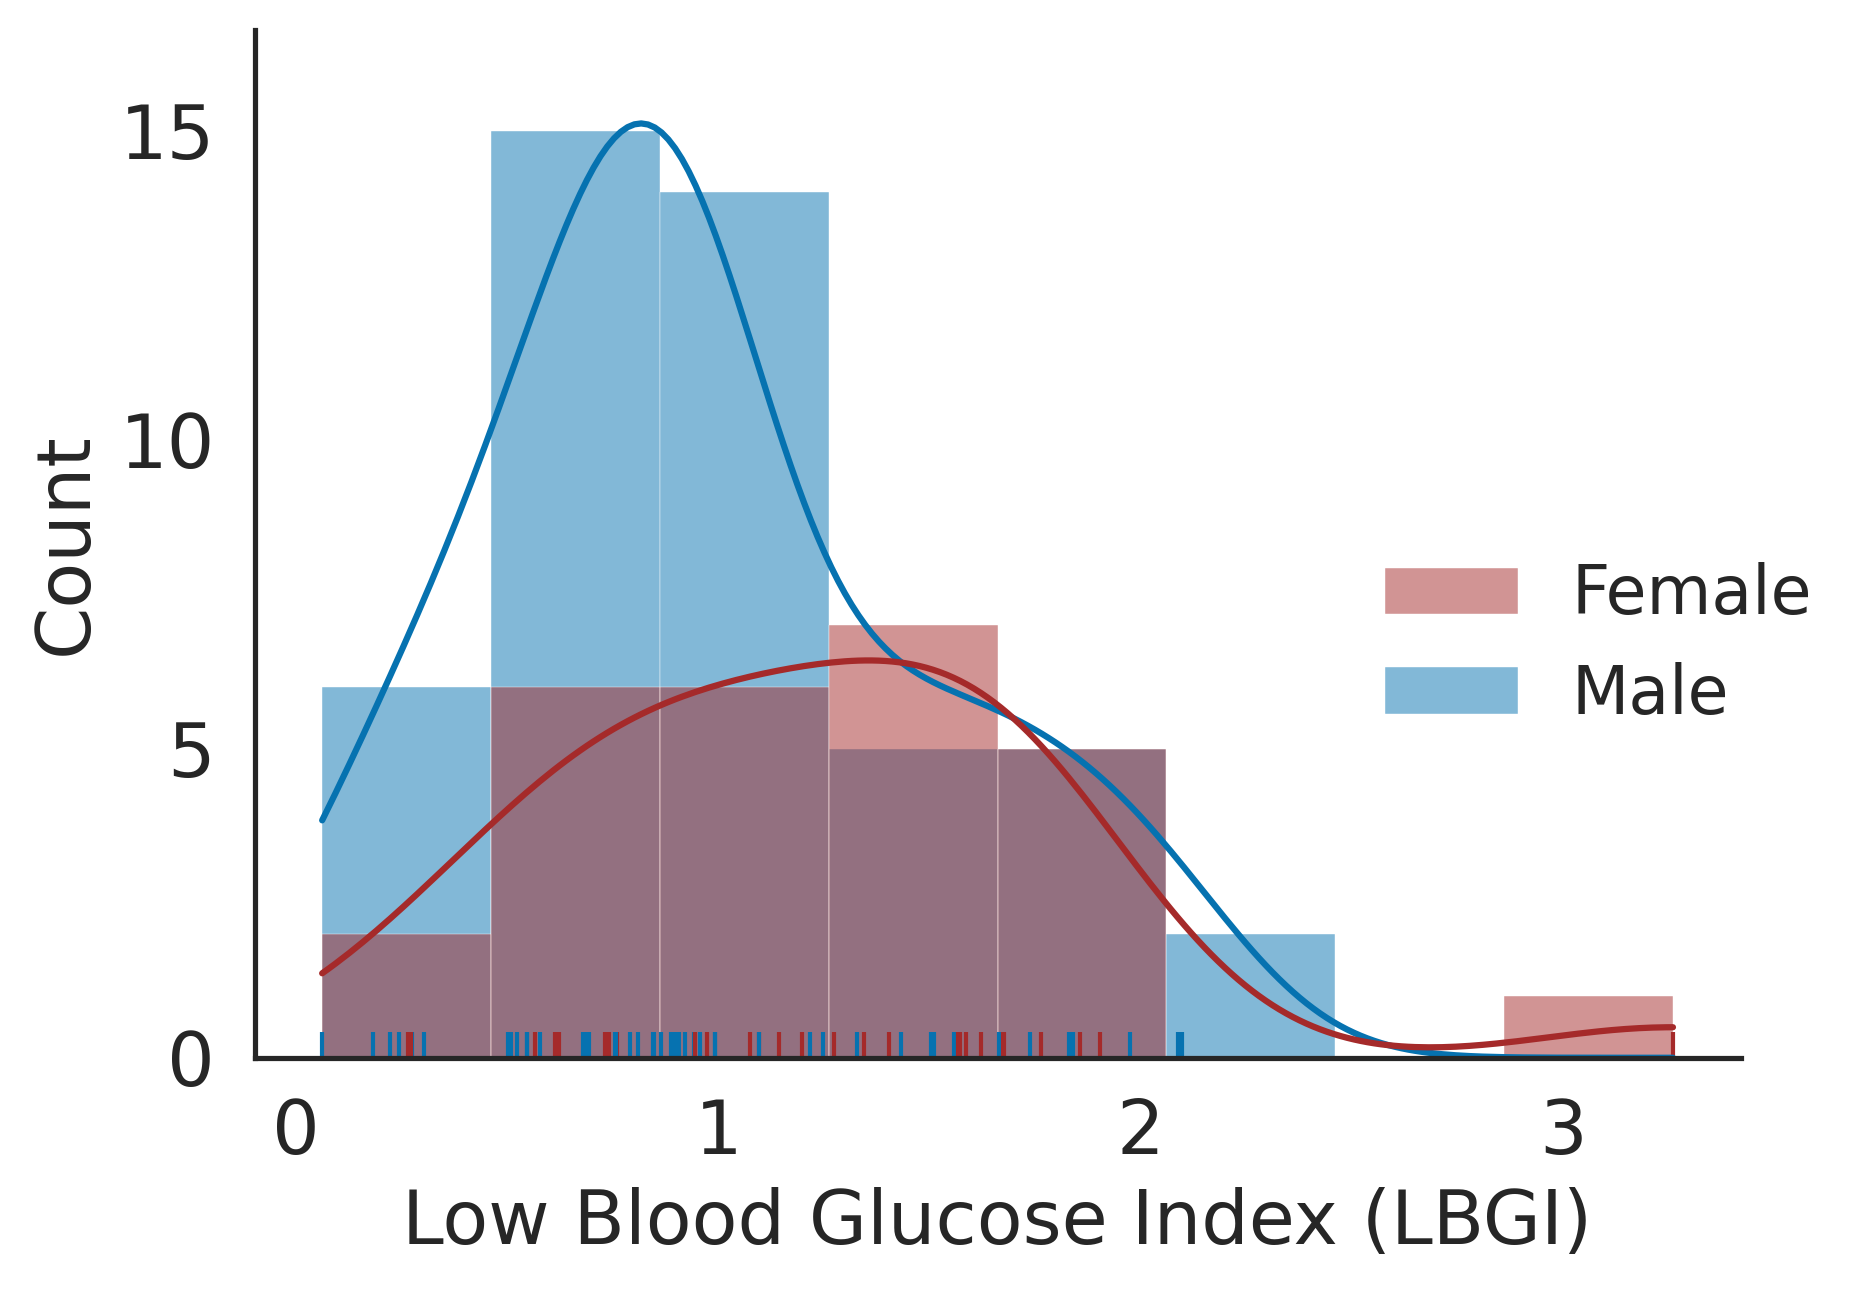

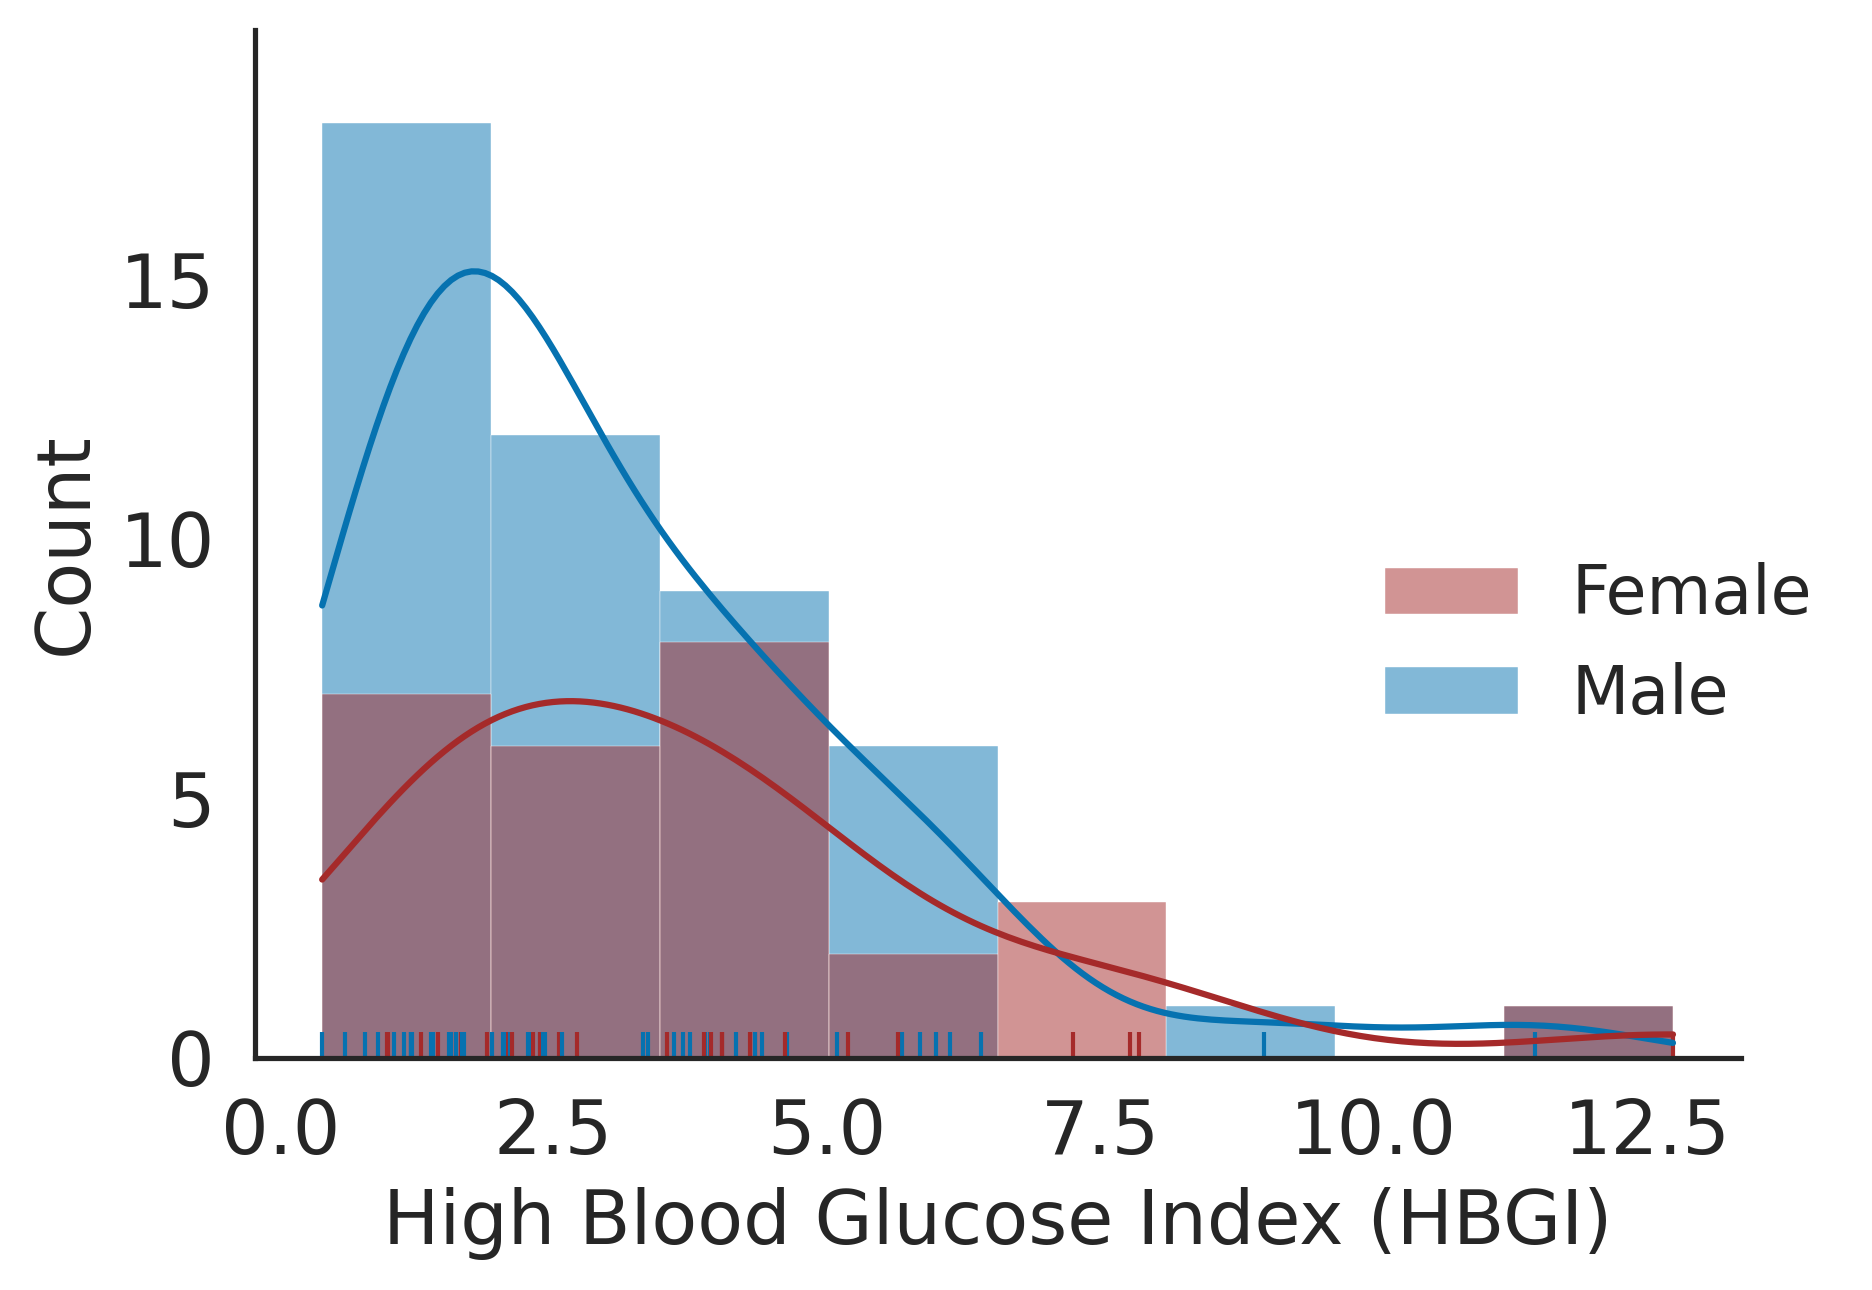

In [10]:
momenta_gender = []
x = plot_kde(df1, 'GMI', 'Glucose Management Indicator (GMI)', "a")
momenta_gender.append(x)
x = plot_kde(df1, 'interdaycv', 'Interday Coefficient of Variation', "b")
momenta_gender.append(x)
x = plot_kde(df1, 'interdaysd', 'Interday Standard Deviation', "c")
momenta_gender.append(x)
x = plot_kde(df1, 'J_index', 'J_Index', "d")
momenta_gender.append(x)
x = plot_kde(df1, 'LGBI', 'Low Blood Glucose Index (LBGI)', "e")
momenta_gender.append(x)
x = plot_kde(df1, 'HBGI', 'High Blood Glucose Index (HBGI)', "f")
momenta_gender.append(x)

#x = plot_kde(df1, 'TIR', 'Percentage of Time in Range (TIR)', True)
#momenta_gender.append(x)
#x= plot_kde(df1, 'TOR', 'Percentage of Time Outside Range (TOR)')
#momenta_gender.append(x)

df_gender_out = pd.DataFrame(momenta_gender, columns=['mean_x', 'std_x', 'min_x', 'max_x', 'median_x', 'q1_x', 'q3_x', 'IQR_x', 'n_x', 'skew_x', 'kurtosis_x', 'mean_y', 
    'std_y', 'min_y', 'max_y', 'median_y', 'q1_y', 'q3_y', 'IQR_y', 'n_y', 'skew_y', 'kurtosis_y', 'z_statistic', 'p_value', 
    'ks_statistic', 'p_value_ks', 'mw_statistic', 'p_value_mw'], index = ["HBGI", "LBGI", "GMI", "J_index", "interdaysd", "interdaycv"])


In [25]:
# df_gender_out.index = ['HBGI', 'LBGI', 'GMI', 'J_index', 'interdaysd', 'interdaycv', 'TIR', 'TOR']
# df_gender_out.to_csv("moment_gender.csv")

age:  [36.88, 15.190312702508795, 7.0, 69.0, 39.0, 32.0, 46.0, 14.0, 25, -0.2061939190793477, -0.06123640935575203, 46.84444444444444, 13.712857803383017, 15.0, 80.0, 47.0, 38.0, 55.0, 14.0, 45, 0.2094682267340363, 0.06667817593706271, -2.761365712553407, 0.005756018215536454, 0.3111111111111111, 0.07081443969771284, 356.0, 0.00575308826514322]
height:  [160.5224, 15.987258246491171, 114.0, 178.0, 165.0, 161.0, 169.0, 8.0, 25, -2.032728157639852, 3.1928252257075354, 180.33711111111114, 7.786707940022529, 150.0, 198.0, 181.0, 176.0, 184.0, 8.0, 45, -1.1018113828196647, 3.7376791703039665, -6.859821260294536, 6.894675946064021e-12, 0.8133333333333334, 2.503997009739578e-11, 59.0, 3.427733156920434e-10]
weight:  [64.87655904, 18.682757183922757, 22.0, 99.336648, 67.0, 58.96696, 75.0, 16.03304, 25, -0.7052351834583483, 0.5405915896529585, 85.64452533333333, 17.937199330579972, 51.0, 137.0, 80.739376, 74.0, 94.0, 16.03304, 45, 0.8583576301703353, 0.4819938976526834, -4.507013419050903, 6.57

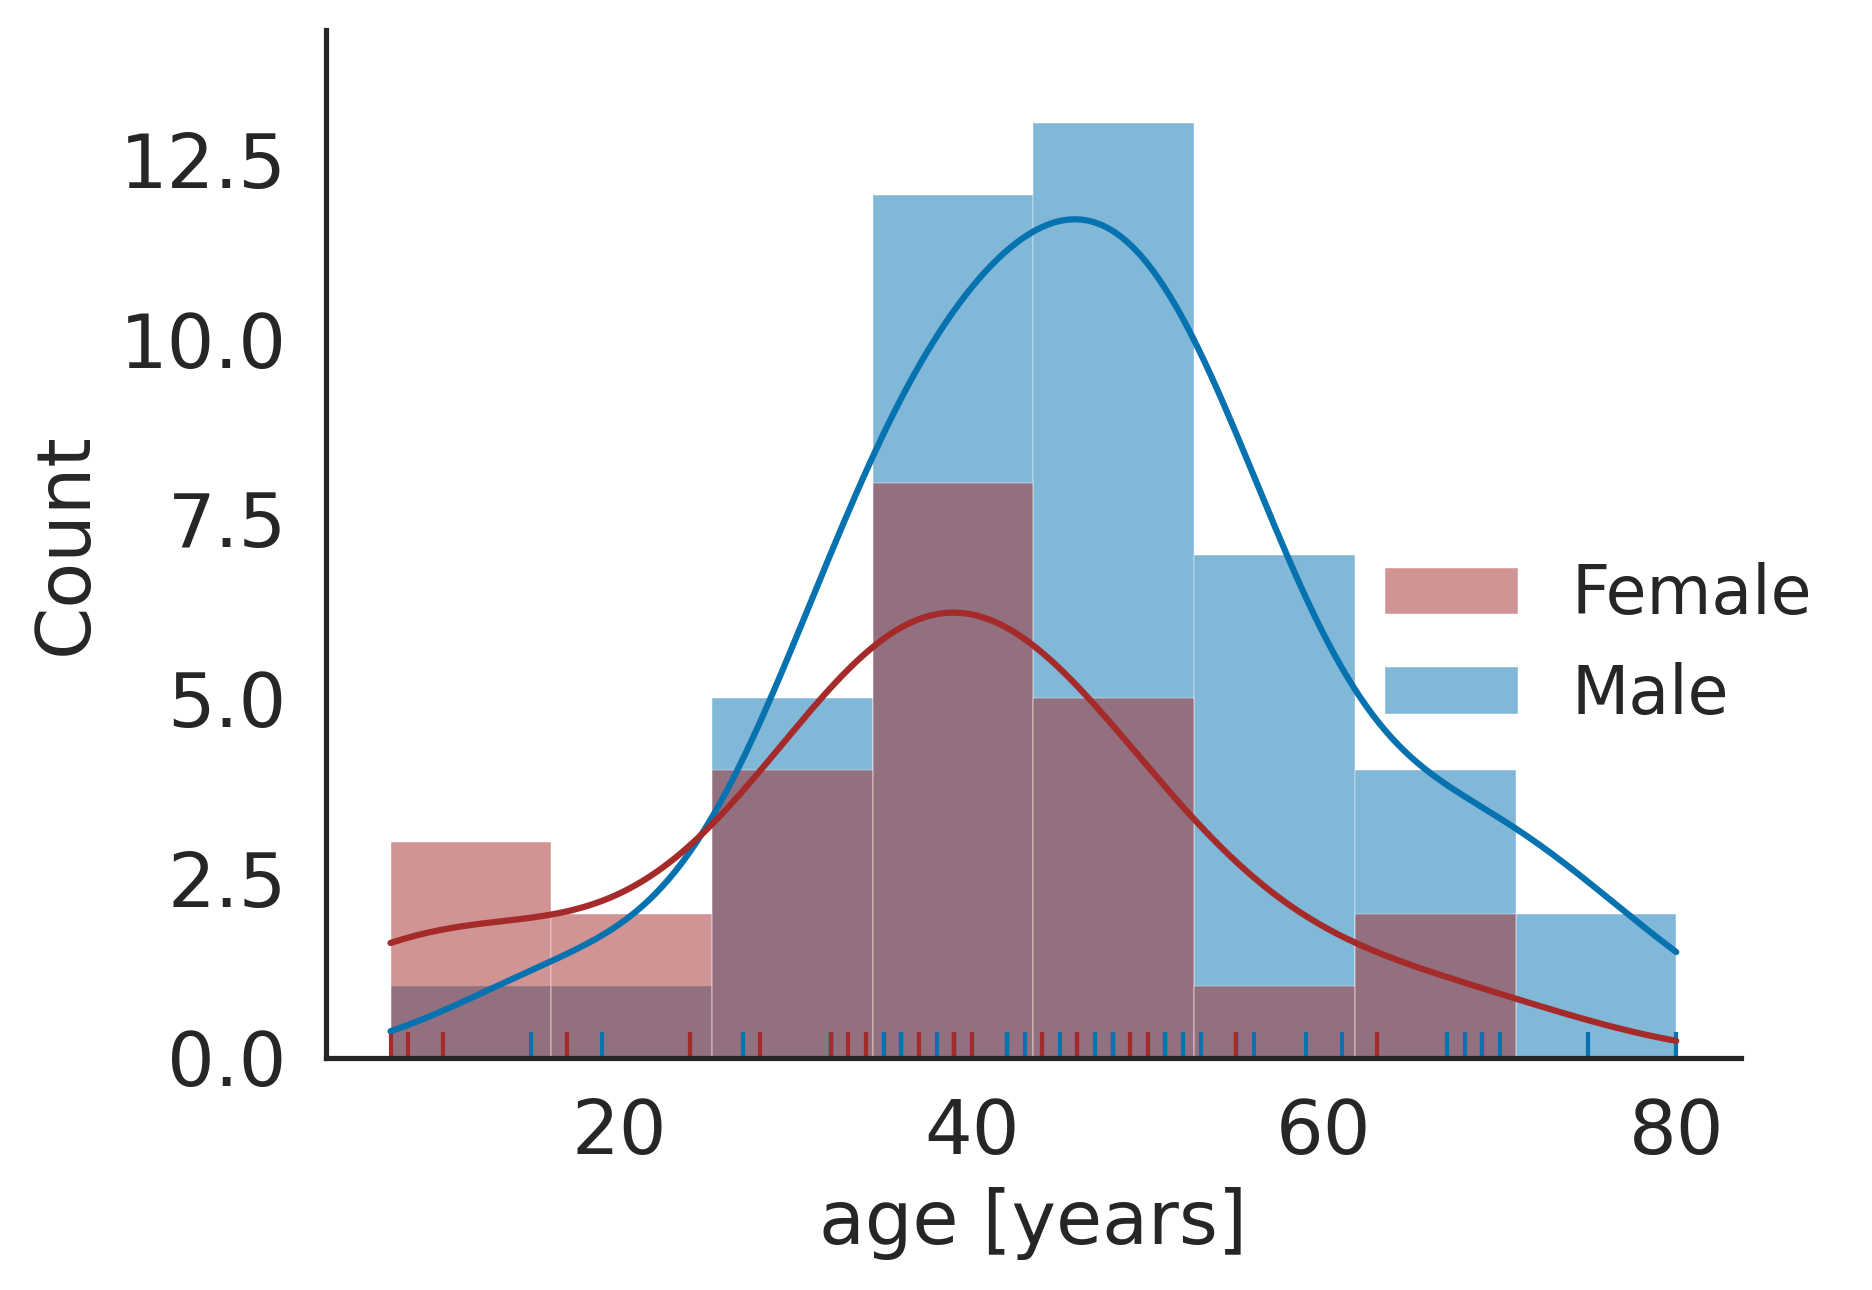

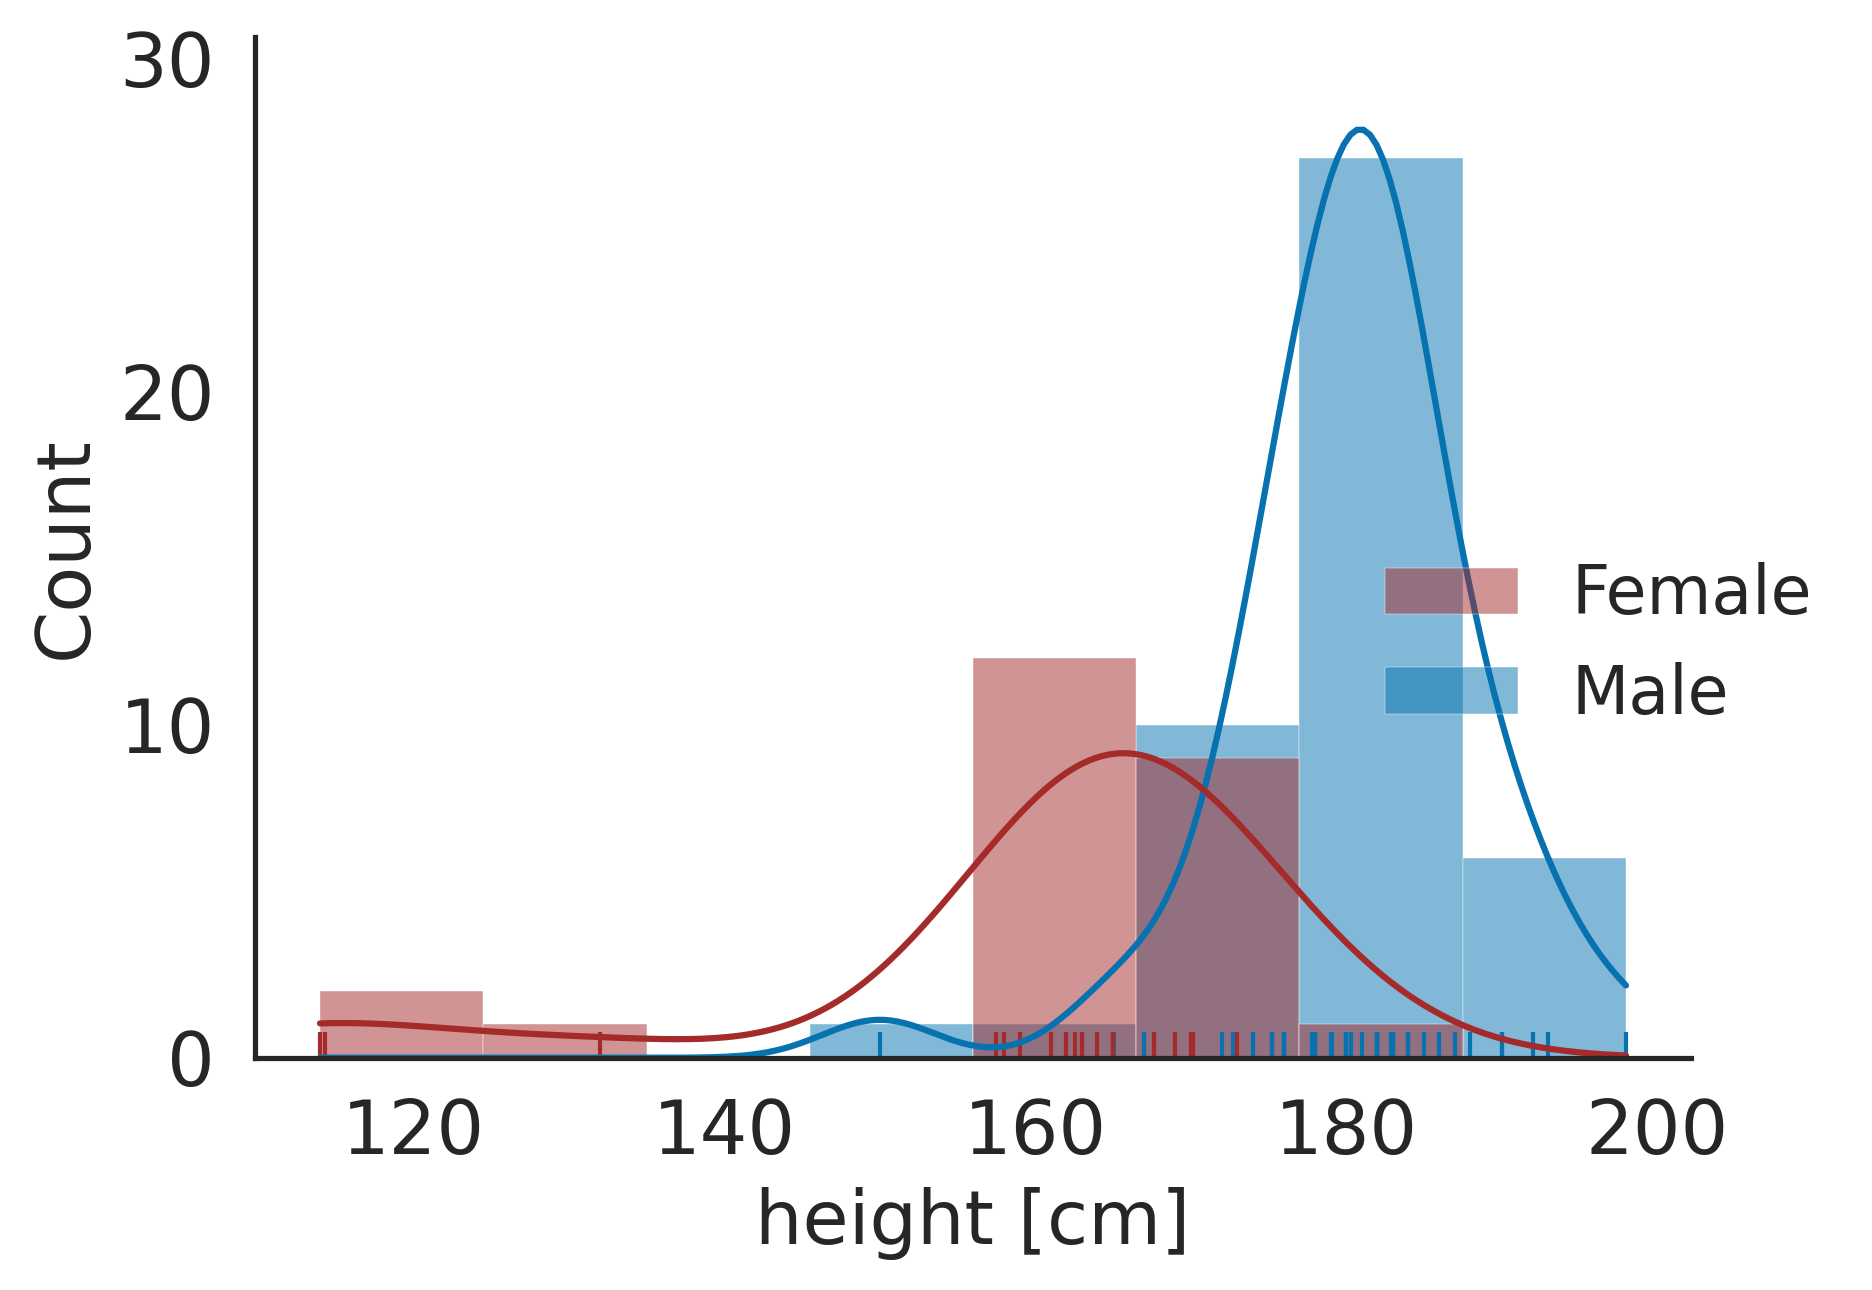

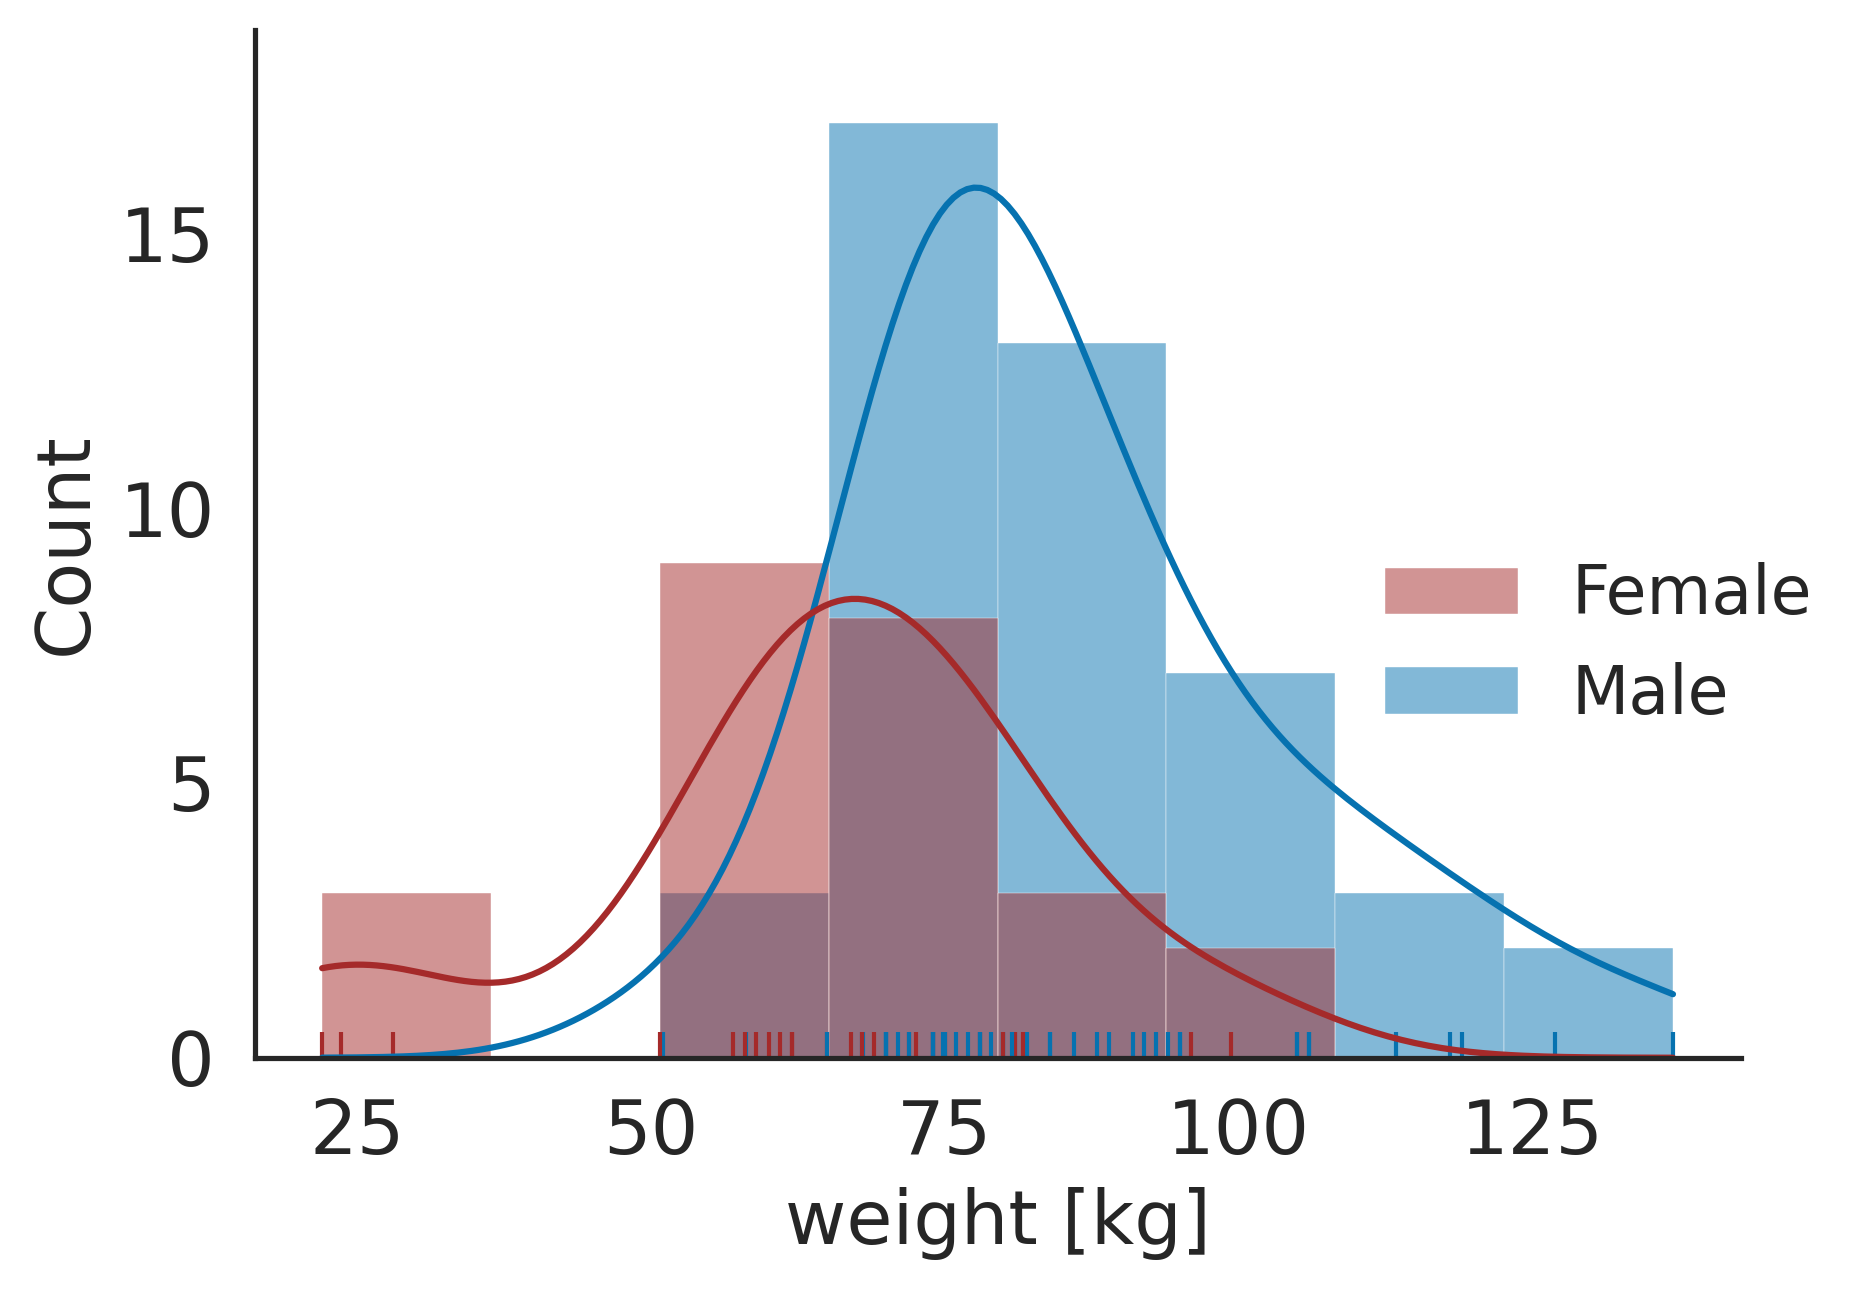

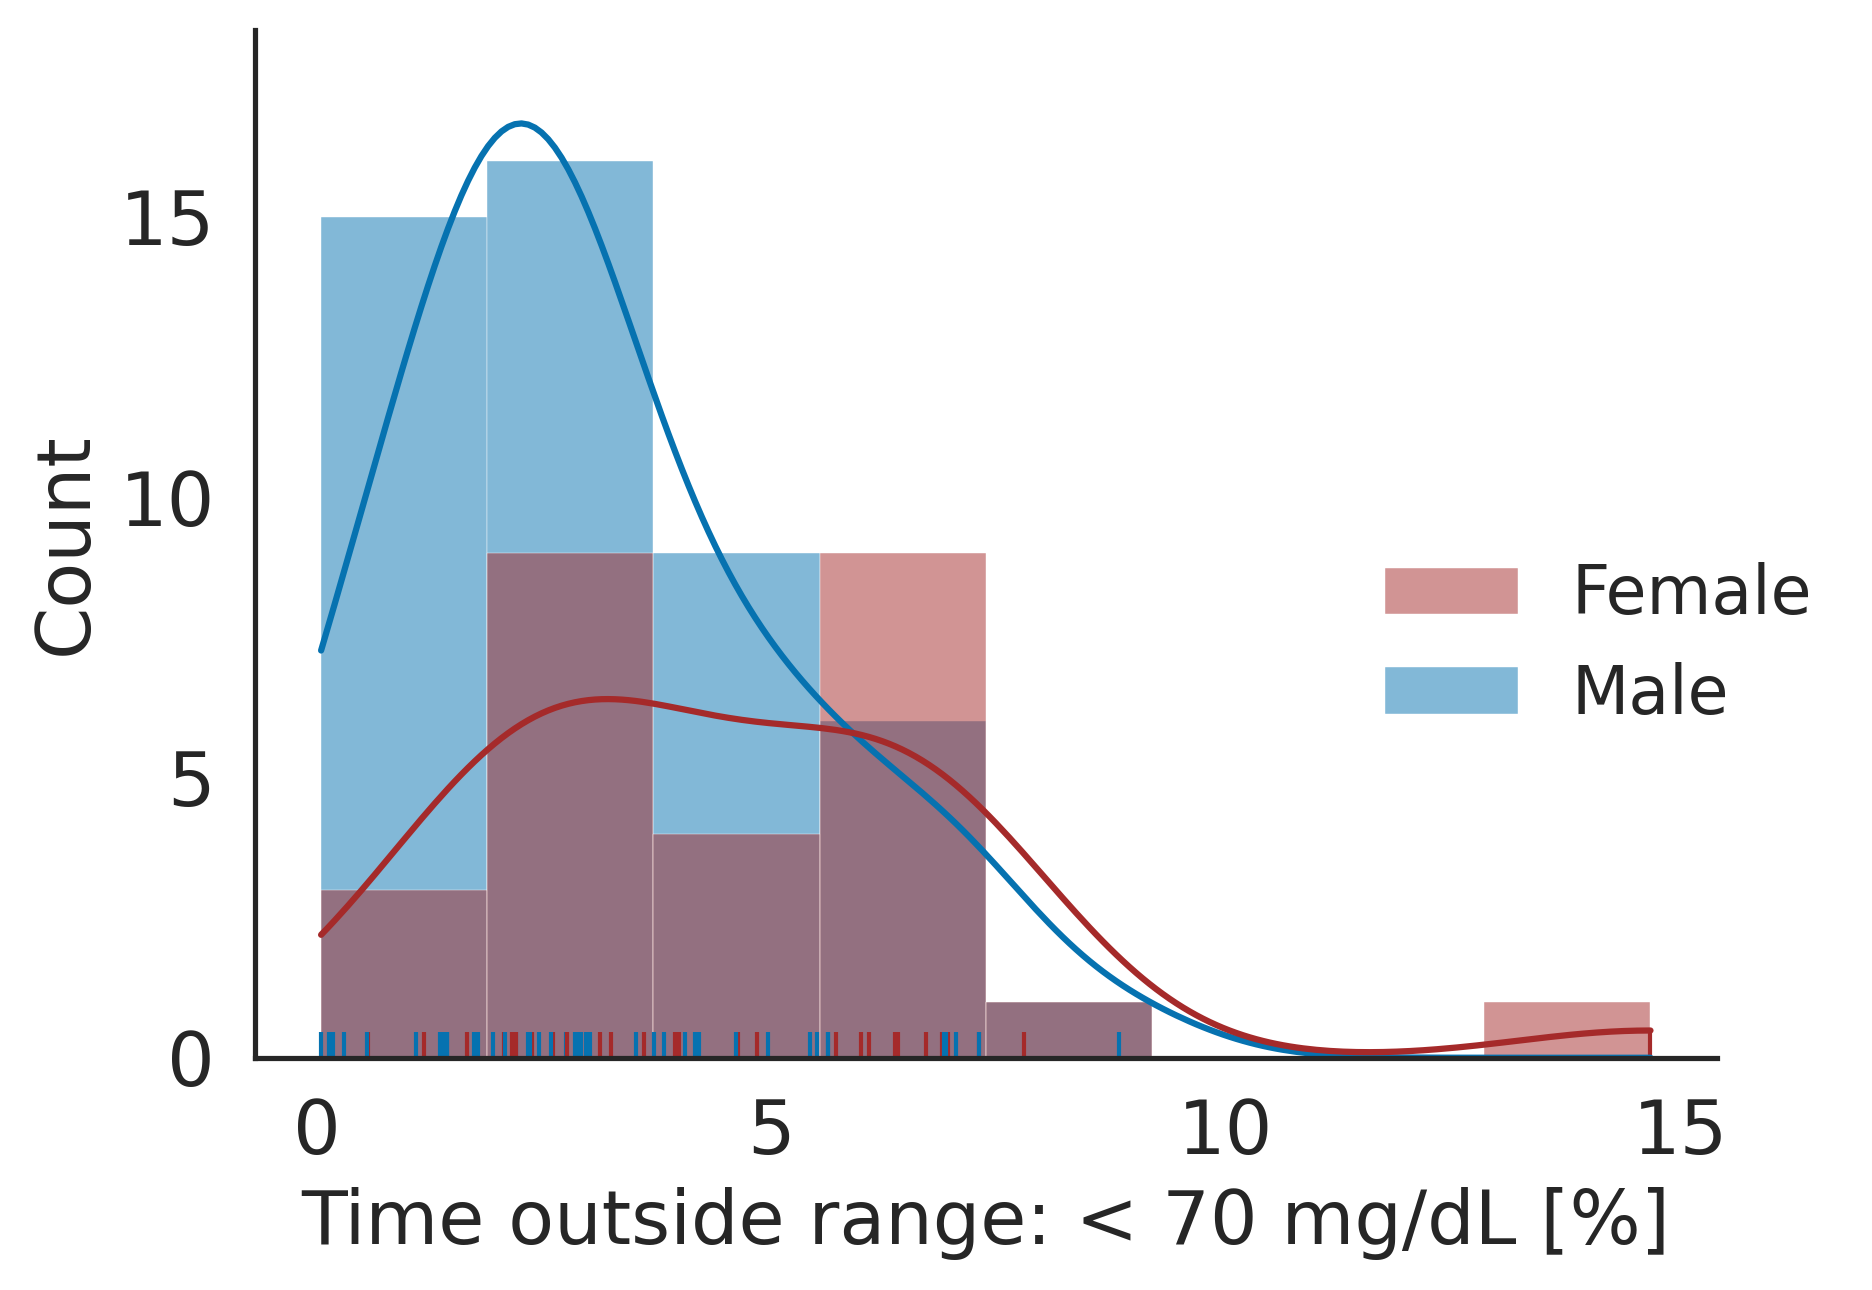

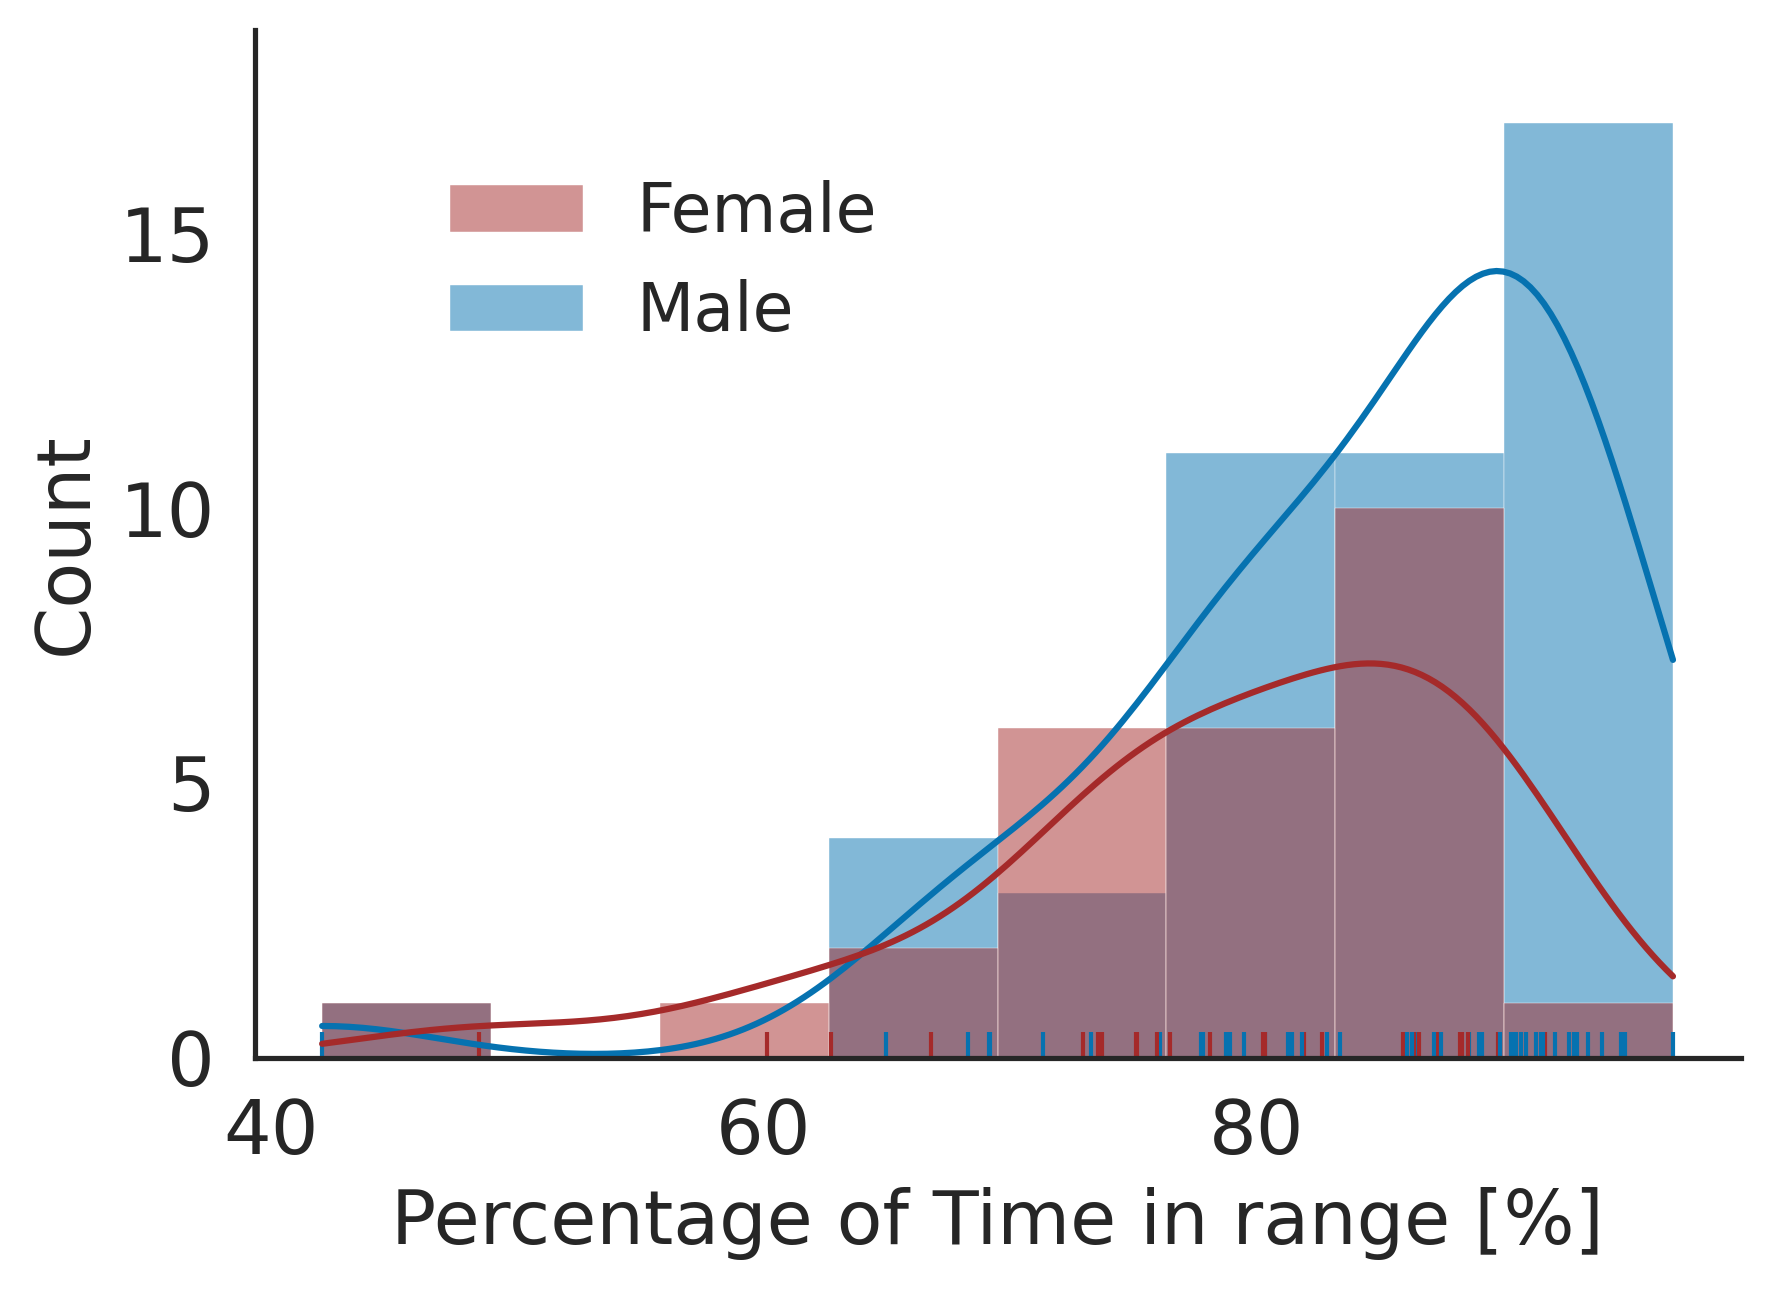

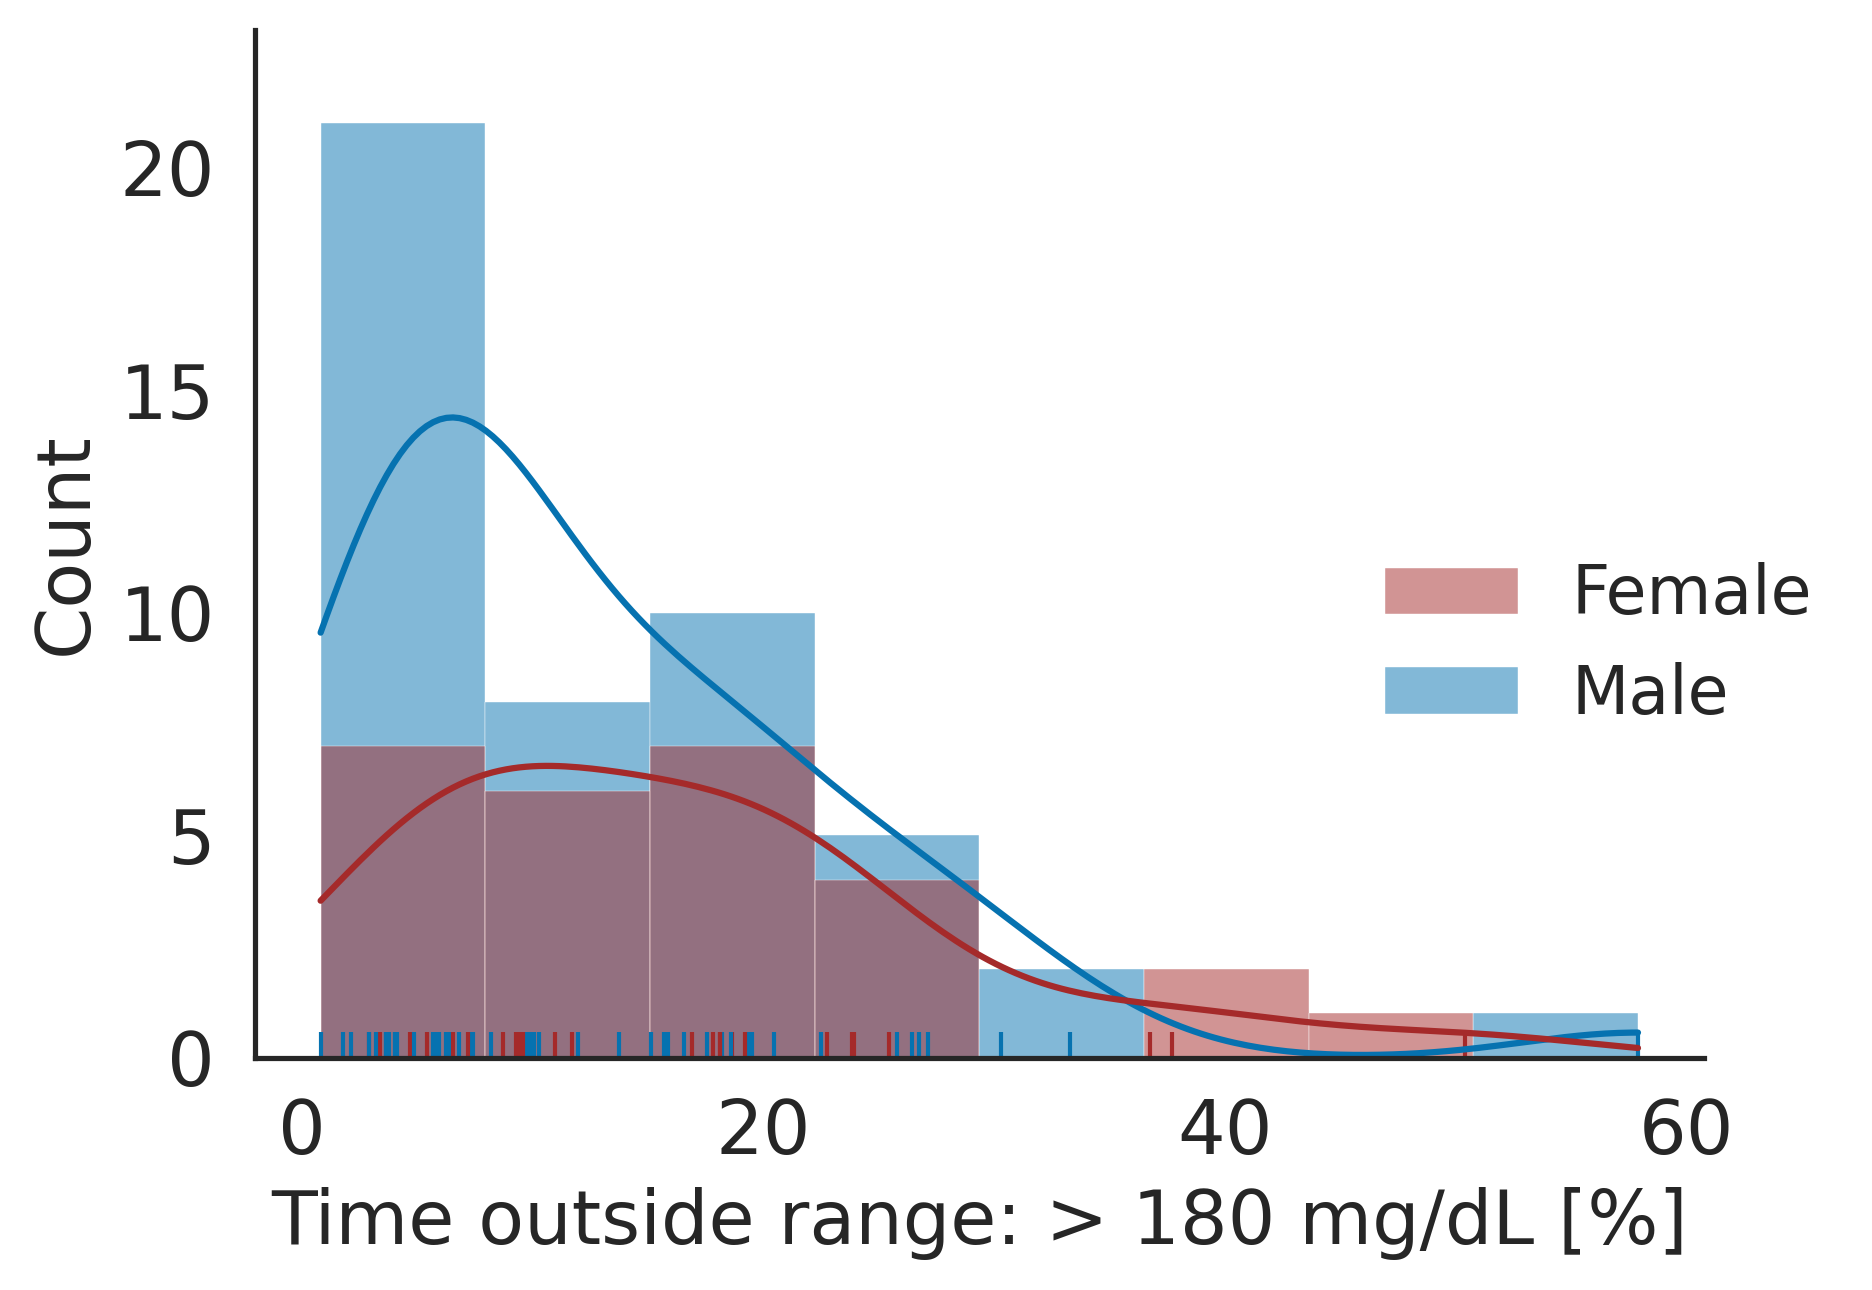

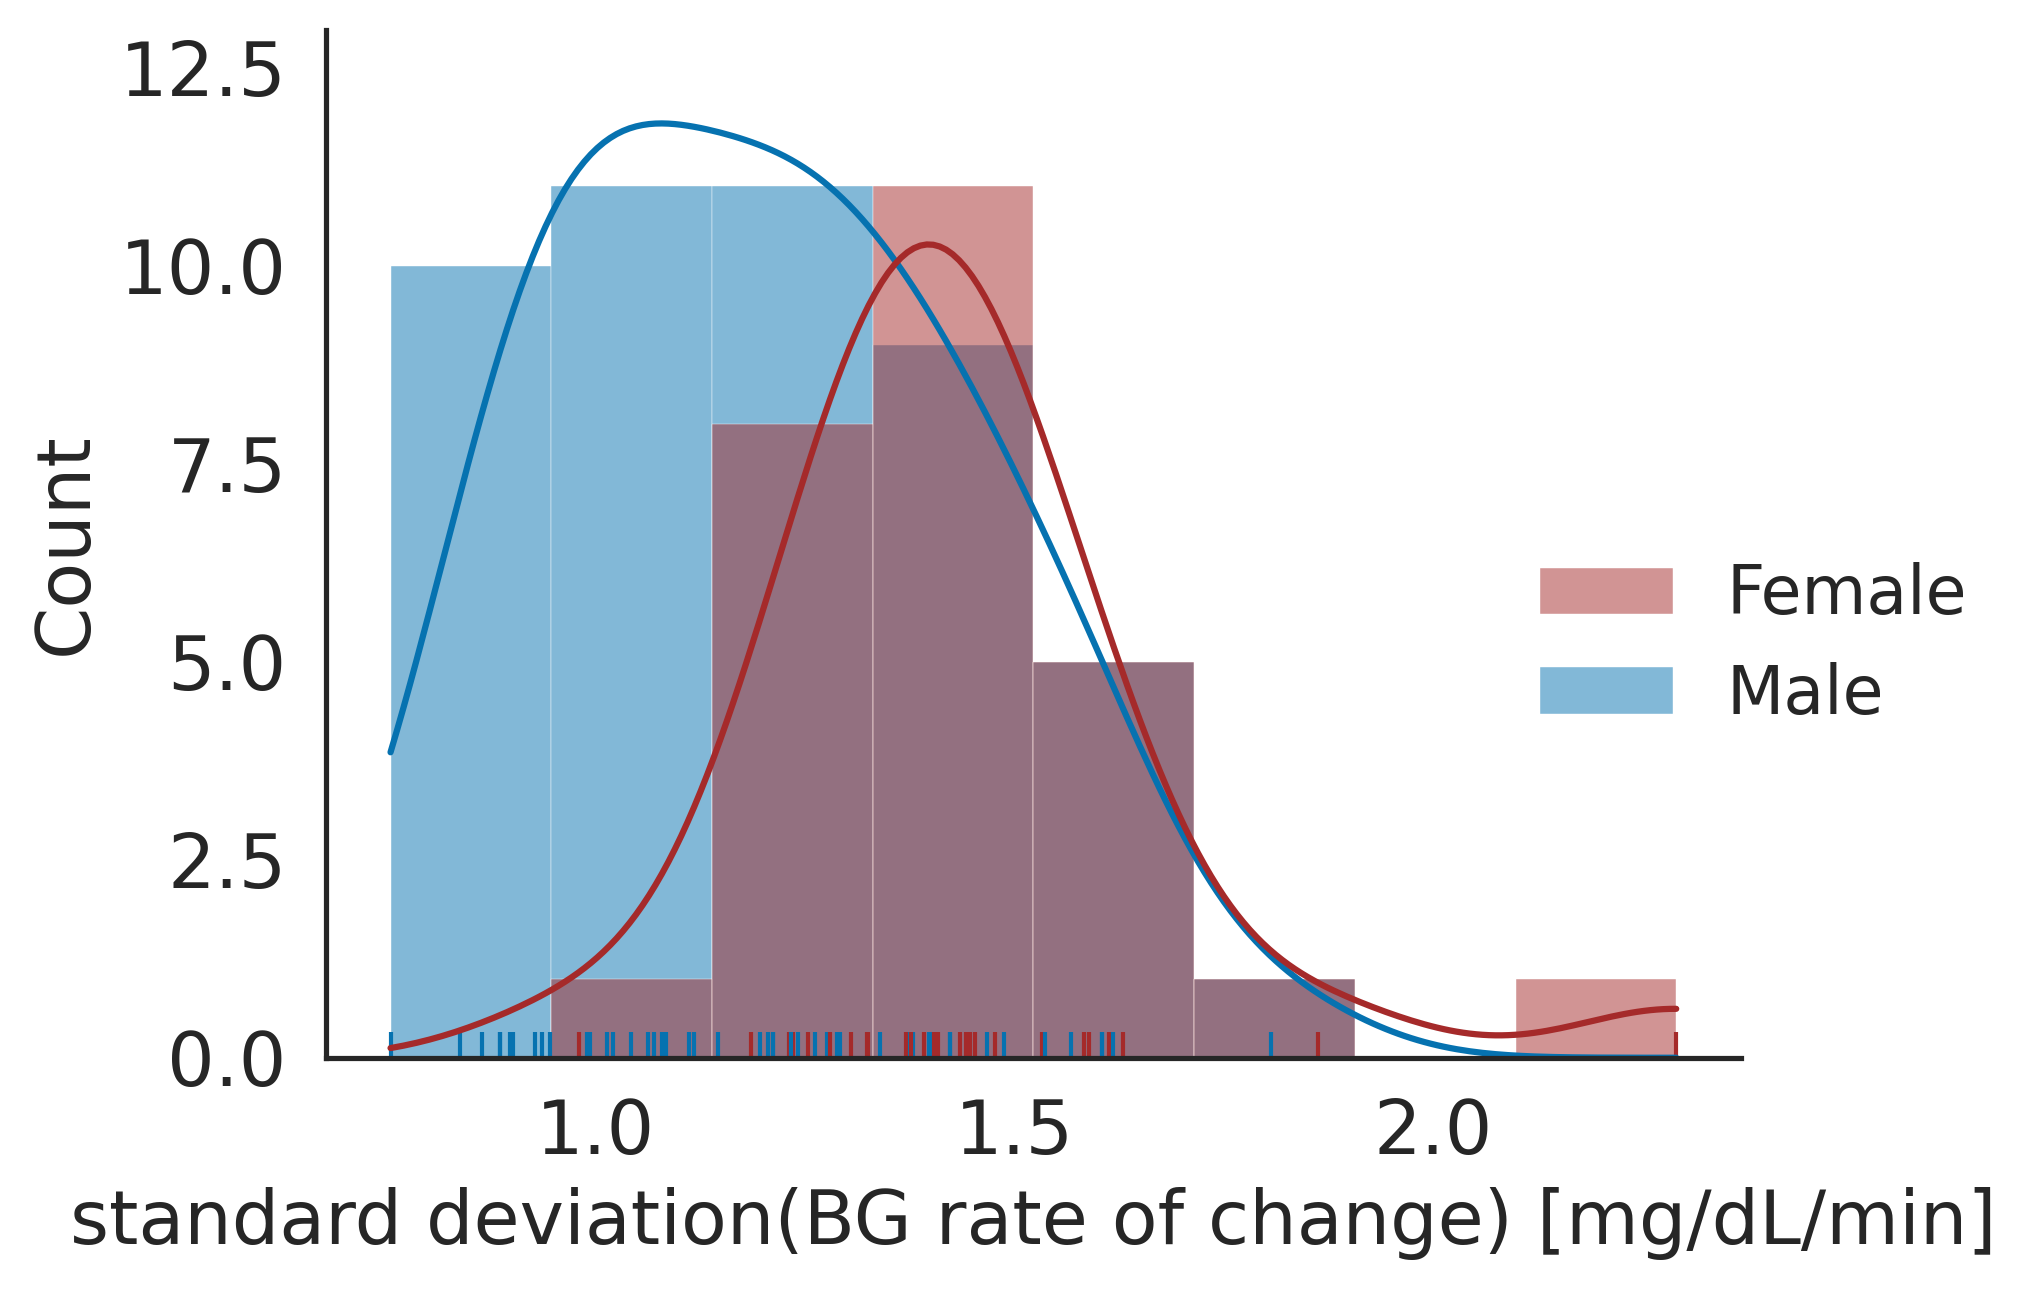

In [12]:
momenta_gender2 = []
df1_reduced = df1.dropna(subset=['age', 'height', 'weight']).copy()
x = plot_kde(df1_reduced, 'age', 'age [years]', "x")
print("age: ", x)
momenta_gender2.append(x)
x = plot_kde(df1_reduced, 'height', 'height [cm]', "y")
print("height: ", x)
momenta_gender2.append(x)
x = plot_kde(df1_reduced, 'weight', 'weight [kg]', "z")
print("weight: ", x)
momenta_gender2.append(x)
x = plot_kde(df1, 'TOR<70', 'Time outside range: < 70 mg/dL [%]', "g")
momenta_gender2.append(x)
x = plot_kde(df1, 'TIR', 'Percentage of Time in range [%]', "h", True)
momenta_gender2.append(x)
x = plot_kde(df1, 'TOR>180', 'Time outside range: > 180 mg/dL [%]', "i")
momenta_gender2.append(x)
x = plot_kde(df1, 'bg_roc_stds', 'standard deviation(BG rate of change) [mg/dL/min]', "j")
momenta_gender2.append(x)


df_gender_out2 = pd.DataFrame(momenta_gender + momenta_gender2, columns=['mean_x', 'std_x', 'min_x', 'max_x', 'median_x', 'q1_x', 'q3_x', 'IQR_x', 'n_x', 'skew_x', 'kurtosis_x', 'mean_y', 
    'std_y', 'min_y', 'max_y', 'median_y', 'q1_y', 'q3_y', 'IQR_y', 'n_y', 'skew_y', 'kurtosis_y', 'z_statistic', 'p_value', 
    'ks_statistic', 'p_value_ks', 'mw_statistic', 'p_value_mw'])
df_gender_out2.index = list(df_gender_out.index) + ["age", "height", "weight", "TOR<70", "TIR", "TOR>180", "bg_roc_stds"]

In [30]:
df_gender_out2 = df_gender_out2.reindex(['interdaysd', 'interdaycv', 'bg_roc_stds', 'TOR<70', 'TIR', 'TOR>180', 'J_index', 'LBGI', 'HBGI', 'GMI', 'age', 'height', 'weight'], axis=0)
df_gender_out2.to_csv("moment_gender.csv")

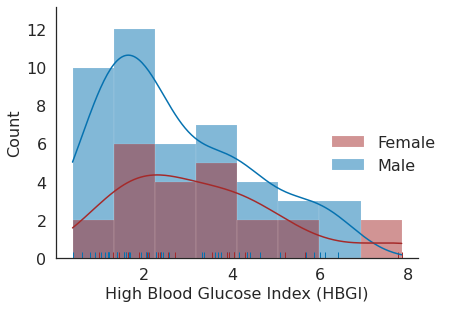

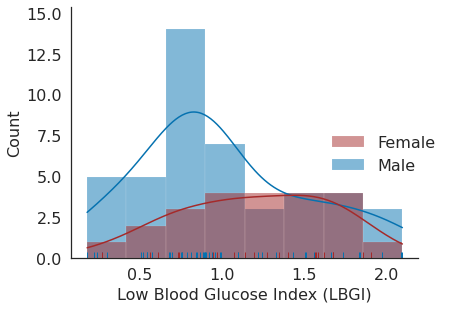

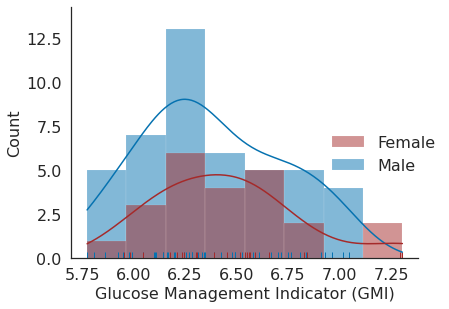

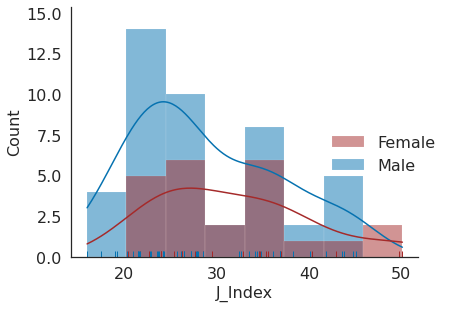

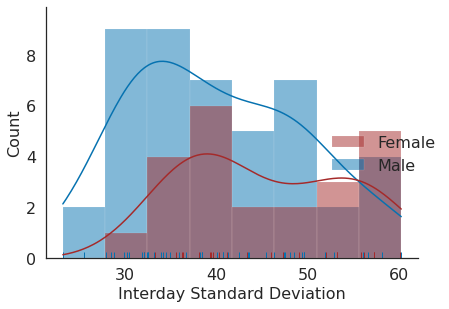

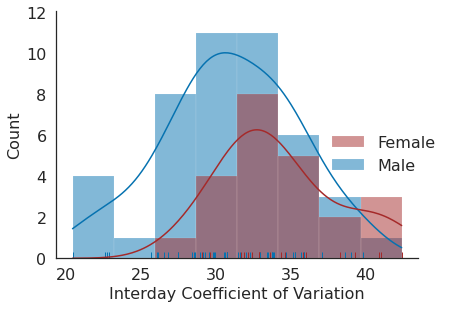

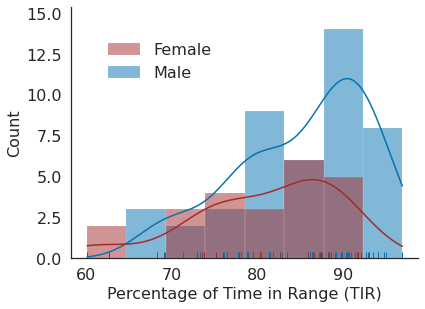

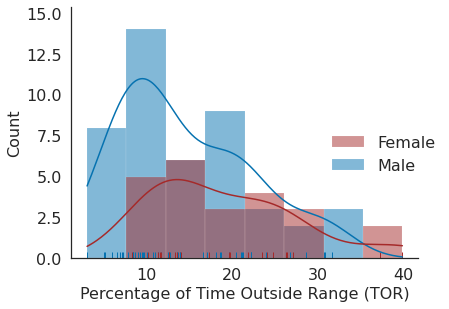

In [17]:
momenta_gender = []
x = plot_kde(df1_inlier, 'HBGI', 'High Blood Glucose Index (HBGI)')
momenta_gender.append(x)
x = plot_kde(df1_inlier, 'LGBI', 'Low Blood Glucose Index (LBGI)')
momenta_gender.append(x)
x = plot_kde(df1_inlier, 'GMI', 'Glucose Management Indicator (GMI)')
momenta_gender.append(x)
x = plot_kde(df1_inlier, 'J_index', 'J_Index')
momenta_gender.append(x)
x = plot_kde(df1_inlier, 'interdaysd', 'Interday Standard Deviation')
momenta_gender.append(x)
x = plot_kde(df1_inlier, 'interdaycv', 'Interday Coefficient of Variation')
momenta_gender.append(x)
x = plot_kde(df1_inlier, 'TIR', 'Percentage of Time in Range (TIR)', True)
momenta_gender.append(x)
x= plot_kde(df1_inlier, 'TOR', 'Percentage of Time Outside Range (TOR)')
momenta_gender.append(x)

df_gender_inlier_out = pd.DataFrame(momenta_gender, columns=['mean_x', 'std_x', 'min_x', 'max_x', 'median_x', 'q1_x', 'q3_x', 'IQR_x', 'n_x', 'skew_x', 'kurtosis_x', 'mean_y', 
    'std_y', 'min_y', 'max_y', 'median_y', 'q1_y', 'q3_y', 'IQR_y', 'n_y', 'skew_y', 'kurtosis_y', 'z_statistic', 'p_value', 
    'ks_statistic', 'p_value_ks', 'mw_statistic', 'p_value_mw'])

In [18]:
df_gender_inlier_out.index = ['HBGI', 'LBGI', 'GMI', 'J_index', 'interdaysd', 'interdaycv', 'TIR', 'TOR']
df_gender_inlier_out.to_csv("moment_gender_no_outlier.csv")

age:  [39.142857142857146, 14.756066433797304, 7.0, 69.0, 39.0, 34.0, 46.0, 12.0, 21, -0.3328543098693865, 0.2587354715620007, 47.23255813953488, 13.906393392136307, 15.0, 80.0, 48.0, 37.5, 55.0, 12.0, 43, 0.1365935993055522, 0.00827054425127205, -2.107585960892936, 0.035066819000669526, 0.2967884828349945, 0.12772568418074204, 314.0, 0.024958970219758892]
height:  [162.6942857142857, 13.987818023595548, 114.3, 178.0, 165.0, 162.56, 170.0, 7.439999999999998, 21, -2.33048619649725, 5.055958241292064, 180.09697674418604, 7.8239146018558765, 150.0, 198.0, 180.34, 176.0, 183.5, 7.439999999999998, 43, -1.088405270626467, 3.7245026384475137, -6.269070033970352, 3.632107547225117e-10, 0.7884828349944629, 3.632611988990675e-09, 56.0, 7.89769072448334e-09]
weight:  [66.09114171428571, 17.866587526317485, 23.586784, 99.336648, 67.0, 58.96696, 78.0, 19.03304, 21, -0.5177598549036633, 0.5670986542970309, 85.13961953488372, 17.533553048328482, 51.0, 137.0, 80.739376, 74.0, 93.5, 19.03304, 43, 0.894

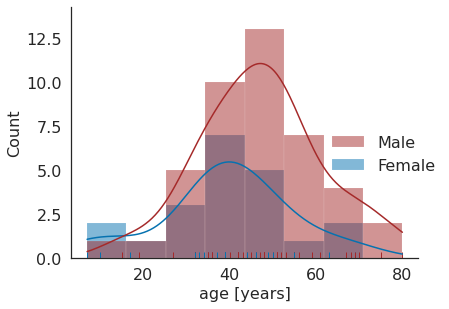

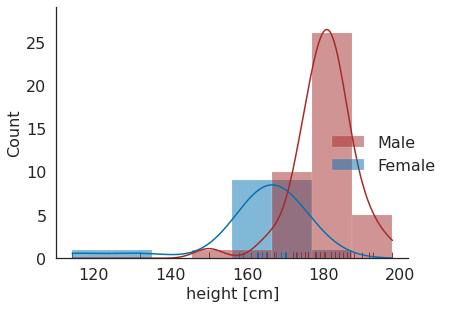

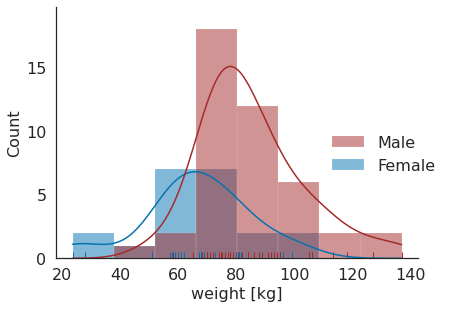

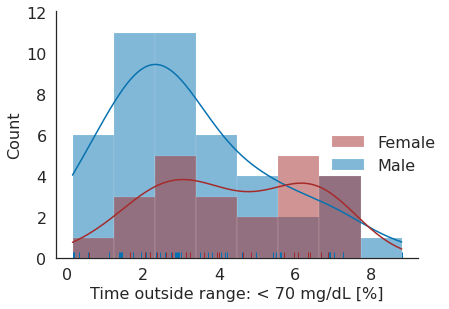

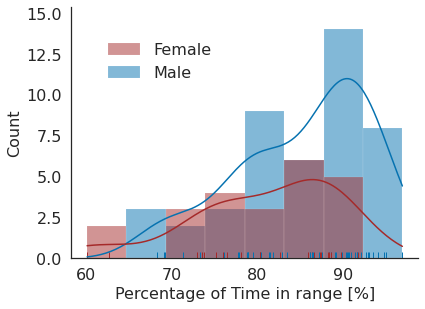

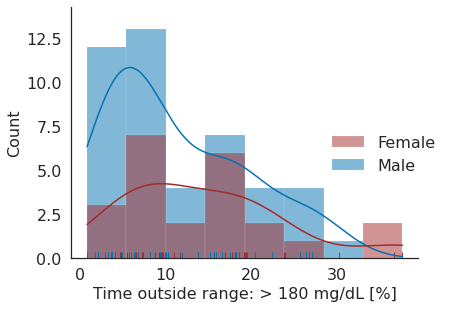

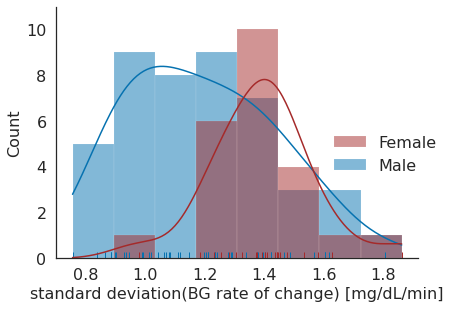

In [19]:
momenta_gender2 = []
df1_inlier_reduced = df1_inlier.dropna(subset=['age', 'height', 'weight']).copy()
x = plot_kde(df1_inlier_reduced, 'age', 'age [years]')
print("age: ", x)
momenta_gender2.append(x)
x = plot_kde(df1_inlier_reduced, 'height', 'height [cm]')
print("height: ", x)
momenta_gender2.append(x)
x = plot_kde(df1_inlier_reduced, 'weight', 'weight [kg]')
print("weight: ", x)
momenta_gender2.append(x)
x = plot_kde(df1_inlier, 'TOR<70', 'Time outside range: < 70 mg/dL [%]')
momenta_gender2.append(x)
x = plot_kde(df1_inlier, 'TIR', 'Percentage of Time in range [%]', True)
momenta_gender2.append(x)
x = plot_kde(df1_inlier, 'TOR>180', 'Time outside range: > 180 mg/dL [%]')
momenta_gender2.append(x)
x = plot_kde(df1_inlier, 'bg_roc_stds', 'SD(BG rate of change) [mg/dL/min]')
momenta_gender2.append(x)

df_gender_out2 = pd.DataFrame(momenta_gender2, columns=['mean_x', 'std_x', 'min_x', 'max_x', 'median_x', 'q1_x', 'q3_x', 'IQR_x', 'n_x', 'skew_x', 'kurtosis_x', 'mean_y', 
    'std_y', 'min_y', 'max_y', 'median_y', 'q1_y', 'q3_y', 'IQR_y', 'n_y', 'skew_y', 'kurtosis_y', 'z_statistic', 'p_value', 
    'ks_statistic', 'p_value_ks', 'mw_statistic', 'p_value_mw'])

In [20]:
df_gender_out2.index = ['age', 'height', 'weight', 'TOR<70', 'TIR', 'TOR>180', 'bg_roc_stds']
df_gender_out2.to_csv("moment_gender2_no_outlier.csv")

Text(0.5, 15.440000000000012, 'Interday Coefficient of Variation')

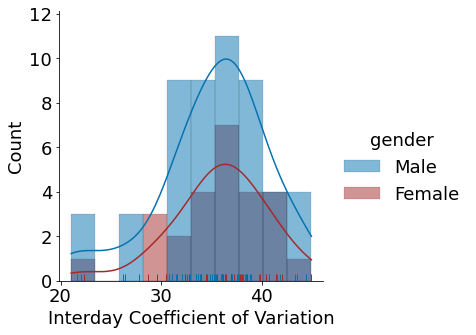

In [17]:
sns.displot(complete_statistics,
            x=complete_statistics['interdaycv'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Interday Coefficient of Variation')

Text(0.5, 15.440000000000012, 'Standard Deviation for Glucose Rate of Change (mg/dL/minute)')

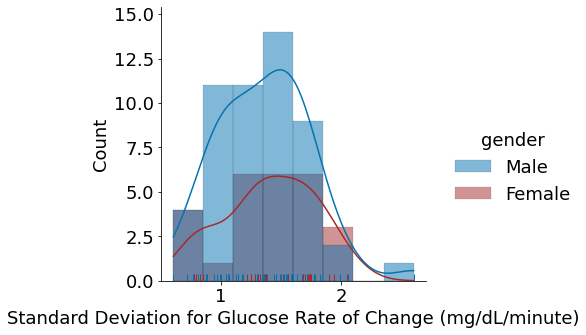

In [18]:
sns.displot(complete_statistics,
            x=complete_statistics['bg_roc_stds'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Standard Deviation for Glucose Rate of Change (mg/dL/minute)')

Text(0.5, 15.440000000000012, 'Mean Glucose (mg/dL)')

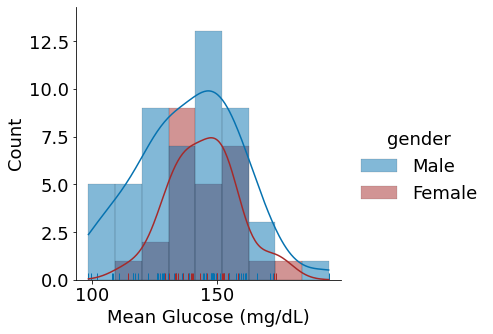

In [19]:
sns.displot(complete_statistics,
            x=complete_statistics['mean'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Mean Glucose (mg/dL)')

Text(0.5, 15.440000000000012, 'J_Index')

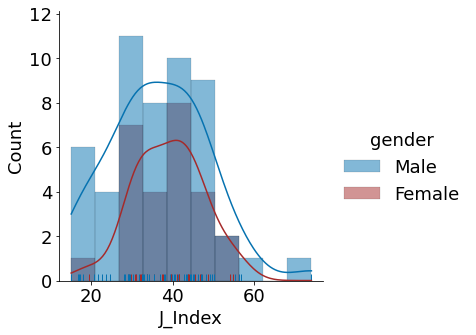

In [20]:
sns.displot(complete_statistics,
            x=complete_statistics['J_index'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('J_Index')

Text(0.5, 15.440000000000012, 'Low Blood Glucose Index (LBGI)')

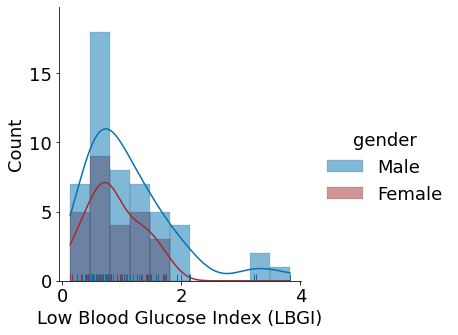

In [21]:
sns.displot(complete_statistics,
            x=complete_statistics['LGBI'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Low Blood Glucose Index (LBGI)')

Text(0.5, 15.440000000000012, 'High Blood Glucose Index (HBGI)')

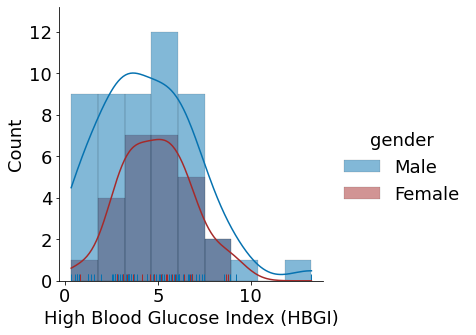

In [22]:
sns.displot(complete_statistics,
            x=complete_statistics['HBGI'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('High Blood Glucose Index (HBGI)')

Text(0.5, 15.440000000000012, 'Glucose Management Indicator (GMI)')

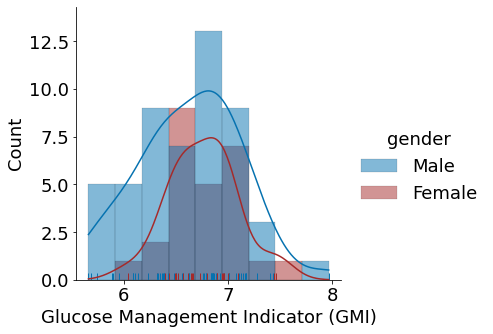

In [23]:
sns.displot(complete_statistics,
            x=complete_statistics['GMI'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Glucose Management Indicator (GMI)')

Text(0.5, 15.440000000000012, 'Percentage of Time in Range (TIR)')

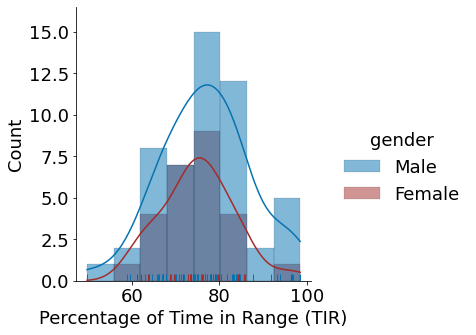

In [24]:
sns.displot(complete_statistics,
            x=complete_statistics['TIR [%]'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Percentage of Time in Range (TIR)')

Text(0.5, 15.440000000000012, 'Percentage of Time Outside Range (POR)')

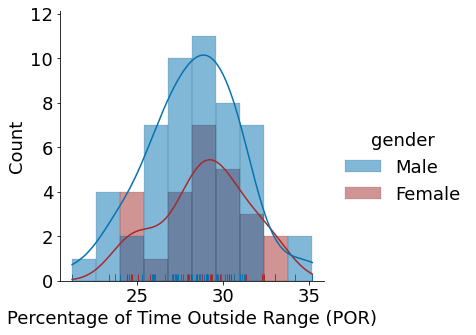

In [25]:
sns.displot(complete_statistics,
            x=complete_statistics['TOR'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Percentage of Time Outside Range (TOR)')

Text(0.5, 15.440000000000012, 'Daily Basal Insulin Units')

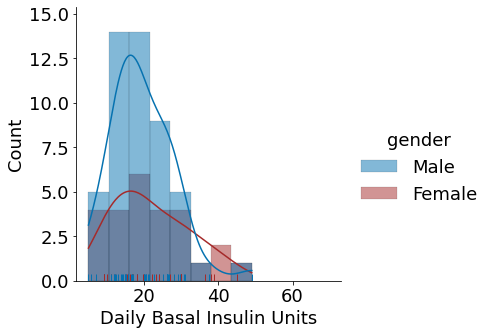

In [26]:
sns.displot(complete_statistics,
            x=complete_statistics['dailyBasalInsulinUnits'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Daily Basal Insulin Units')

Text(0.5, 15.440000000000012, 'Daily Insulin Units')

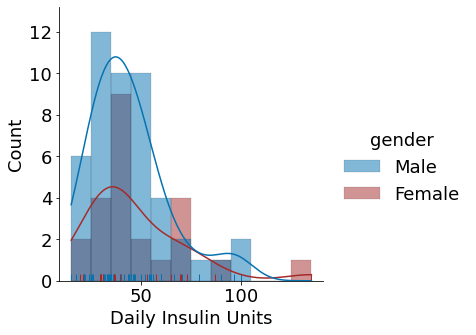

In [27]:
sns.displot(complete_statistics,
            x=complete_statistics['dailyInsulinUnits'],
            hue=complete_statistics['gender'],
            palette=["#0672B0", "brown"],
            alpha=0.5,
            linewidth=0.1,
            kde=True,
            rug=True)
plt.xlabel('Daily Insulin Units')